In [1]:
import pandas as pd
from pandas import read_csv, concat, Series, MultiIndex
import pathlib
from pathlib import Path
import glob
from glob import glob
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
combined_csv = concat([read_csv(f, sep=';', decimal='.', header=[0,1,2], index_col=[0], skiprows=[1]).assign(name=Path(f).stem) for f in glob('./out/metrics/*.csv')])
combined_csv.index.name = 'dataset'
combined_csv.index = combined_csv.index.str.split('_').str[-1]
combined_csv[['model', 'value', 'method']] = combined_csv['name'].apply(lambda x: Series(str(x).split('_',2)))
combined_csv['method'] = combined_csv['method'].fillna('real')
combined_csv = combined_csv.drop(['value', 'name'], axis=1)
combined_csv = combined_csv.set_index([combined_csv.index, 'model', 'method'])
combined_csv = combined_csv.sort_index()
combined_csv = combined_csv.reindex(index=['MLP', 'CNN', 'LSTM', 'CNNLSTM'], level=1)
combined_csv = combined_csv.reindex(index=['real', 'synth', 'real_synth', 'reinf_learn', 'real_synth_shuffled'], level=2)
combined_csv = combined_csv.reorder_levels([0, 1, 2], axis=0)
combined_csv.to_csv('final_metrics.csv', index=True, header=True)
combined_csv

/tmp/ipykernel_47238/593833893.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  combined_csv = combined_csv.drop(['value', 'name'], axis=1)


Benceno                                \
                                          12h                                 
                                           R2      RMSE       MAE       SEM   
dataset model   method                                                        
BILBAO  MLP     real                 0.119775  0.233533  0.200562  2.275201   
                synth                0.009652  0.110274  0.082164  2.075378   
                real_synth           0.136034  0.097900  0.069454  2.053268   
                reinf_learn          0.032840  0.124004  0.094581  2.160645   
                real_synth_shuffled  0.177659  0.230645  0.197252  2.276476   
        CNN     real                 0.027317  0.167782  0.143689  2.280797   
                synth                0.382731  0.086377  0.062588  2.107778   
                real_synth           0.011323  0.111661  0.085780  2.079949   
                reinf_learn          0.196188  0.100066  0.065822  1.927948   
                real_synth_shuffled  0.022203  0.181547  0.156526  2.298785   
        LSTM    real                 0.277903  0.195879  0.173434  2.332913   
                synth                0.015223  0.106205  0.089751  2.294319   
                real_synth           0.094528  0.117314  0.104168  2.363539   
                reinf_learn          0.013569  0.123624  0.104452  2.298097   
                real_synth_shuffled  0.214831  0.178180  0.152302  2.255936   
        CNNLSTM real                 0.005014  0.164727  0.130125  2.169918   
                synth                0.261749  0.088026  0.052217  1.741347   
                real_synth           0.362144  0.087764  0.052000  1.750203   
                reinf_learn          0.181709  0.101141  0.069016  1.993522   
                real_synth_shuffled  0.017876  0.174207  0.145091  2.254495   
MADRID  MLP     real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   
        CNN     real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   
        LSTM    real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   
        CNNLSTM real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   

                                                                     \
                                                                      
                                          AEM    AICBIC        MAPE   
dataset model   method                                                
BILBAO  MLP     real                 6.418331 -0.423954  164.558002   
                synth                5.374785 -1.924672   38.636827   
                real_synth           5.356608 -2.162702   40.718820   
                reinf_learn          5.874071 -1.689973   70.616

Car             Motorcycle  \
                                           RMSE         MAE       RMSE   
dataset model   method                                                   
BILBAO  MLP     real                 467.025522  349.095423   8.788448   
                synth                304.650465  225.137557   3.158204   
                real_synth           355.101914  240.159913   3.995104   
                reinf_learn          287.063190  207.853931   3.567956   
                real_synth_shuffled  494.091584  350.991062   9.715443   
        CNN     real                 707.572300  566.103230   7.676172   
                synth                384.877930  271.789186   3.488672   
                real_synth           392.229513  332.920960   3.864856   
                reinf_learn          228.578318  171.358140   3.312495   
                real_synth_shuffled  457.837250  319.883982   5.677778   
        LSTM    real                 496.588907  400.112364   3.529364   
                synth                395.394199  334.334395   3.297569   
                real_synth           341.367508  258.525604   3.876411   
                reinf_learn          315.944005  224.676837   4.119819   
                real_synth_shuffled  545.176915  428.837464   4.981617   
        CNNLSTM real                 382.208763  271.022000   4.237650   
                synth                267.893186  173.244627   2.536679   
                real_synth           306.510076  213.355645   2.591996   
                reinf_learn          270.741035  186.871305   3.222400   
                real_synth_shuffled  441.229756  305.911787   5.855636   
MADRID  MLP     real                 473.474368  390.559844  22.505617   
                synth                209.471868  161.779553  18.542496   
                real_synth           254.930946  193.483421  16.811352   
                reinf_learn          313.897011  221.716909  17.749507   
                real_synth_shuffled  369.940334  289.113363  17.879826   
        CNN     real                 464.315450  363.009696  17.672442   
                synth                318.219069  246.121609  17.282772   
                real_synth           259.159852  198.089639  20.430314   
                reinf_learn          278.466090  220.430642  19.837447   
                real_synth_shuffled  408.524842  314.787027  20.092022   
        LSTM    real                 300.996090  233.881056  17.599182   
                synth                254.756406  193.607585  19.628574   
                real_synth           359.710152  284.249557  14.291371   
                reinf_learn          279.117973  206.806561  15.520312   
                real_synth_shuffled  507.210770  412.613911  34.361762   
        CNNLSTM real                 336.737410  276.056965  20.837888   
                synth                249.712107  205.694673  13.768852   
                real_synth           223.922579  166.091463  12.715209   
                reinf_learn          325.391123  264.030151  15.871525   
                real_synth_shuffled  395.655562  332.650079  19.888731   

                                                       Bus             \
                                           MAE        RMSE        MAE   
dataset model   method                                                  
BILBAO  MLP     real                  7.014193   63.008736  53.001341   
                synth                 2.271980   33.655668  20.536033   
                real_synth            3.008620   42.975129  23.583715   
                reinf_learn           2.876312   32.822621  19.146958   
                real_synth_shuffled   7.845421   50.565429  27.334665   
        CNN     real                  6.133828   72.173679  55.400328   
                synth                 2.735934   42.198781  28.303200   
                real_synth            2.801480   42.947723  29.737481   
                reinf_learn           2.754843   28.948365

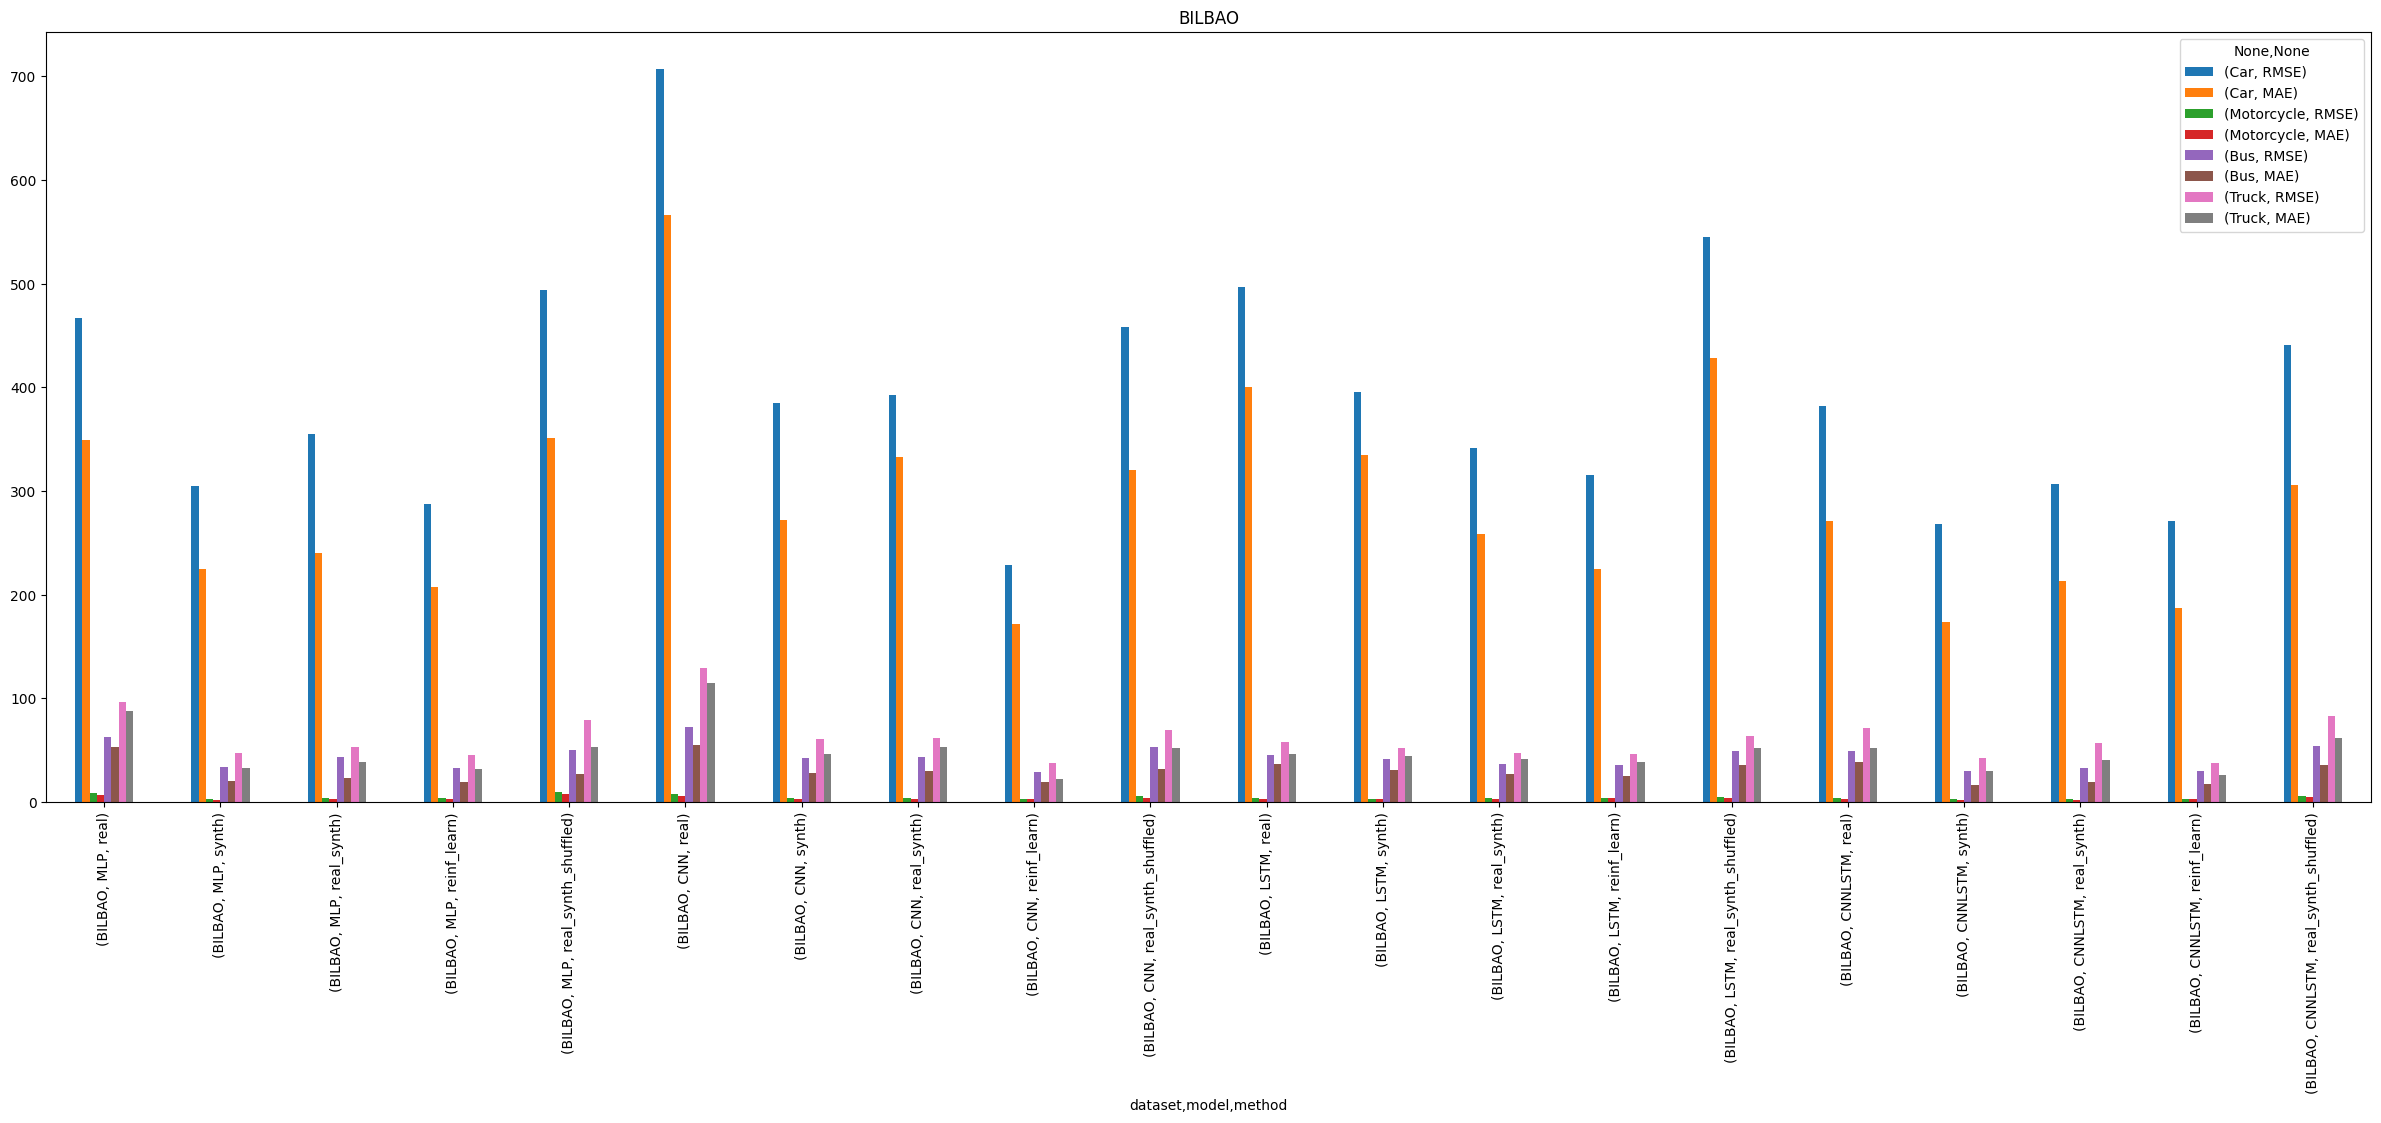

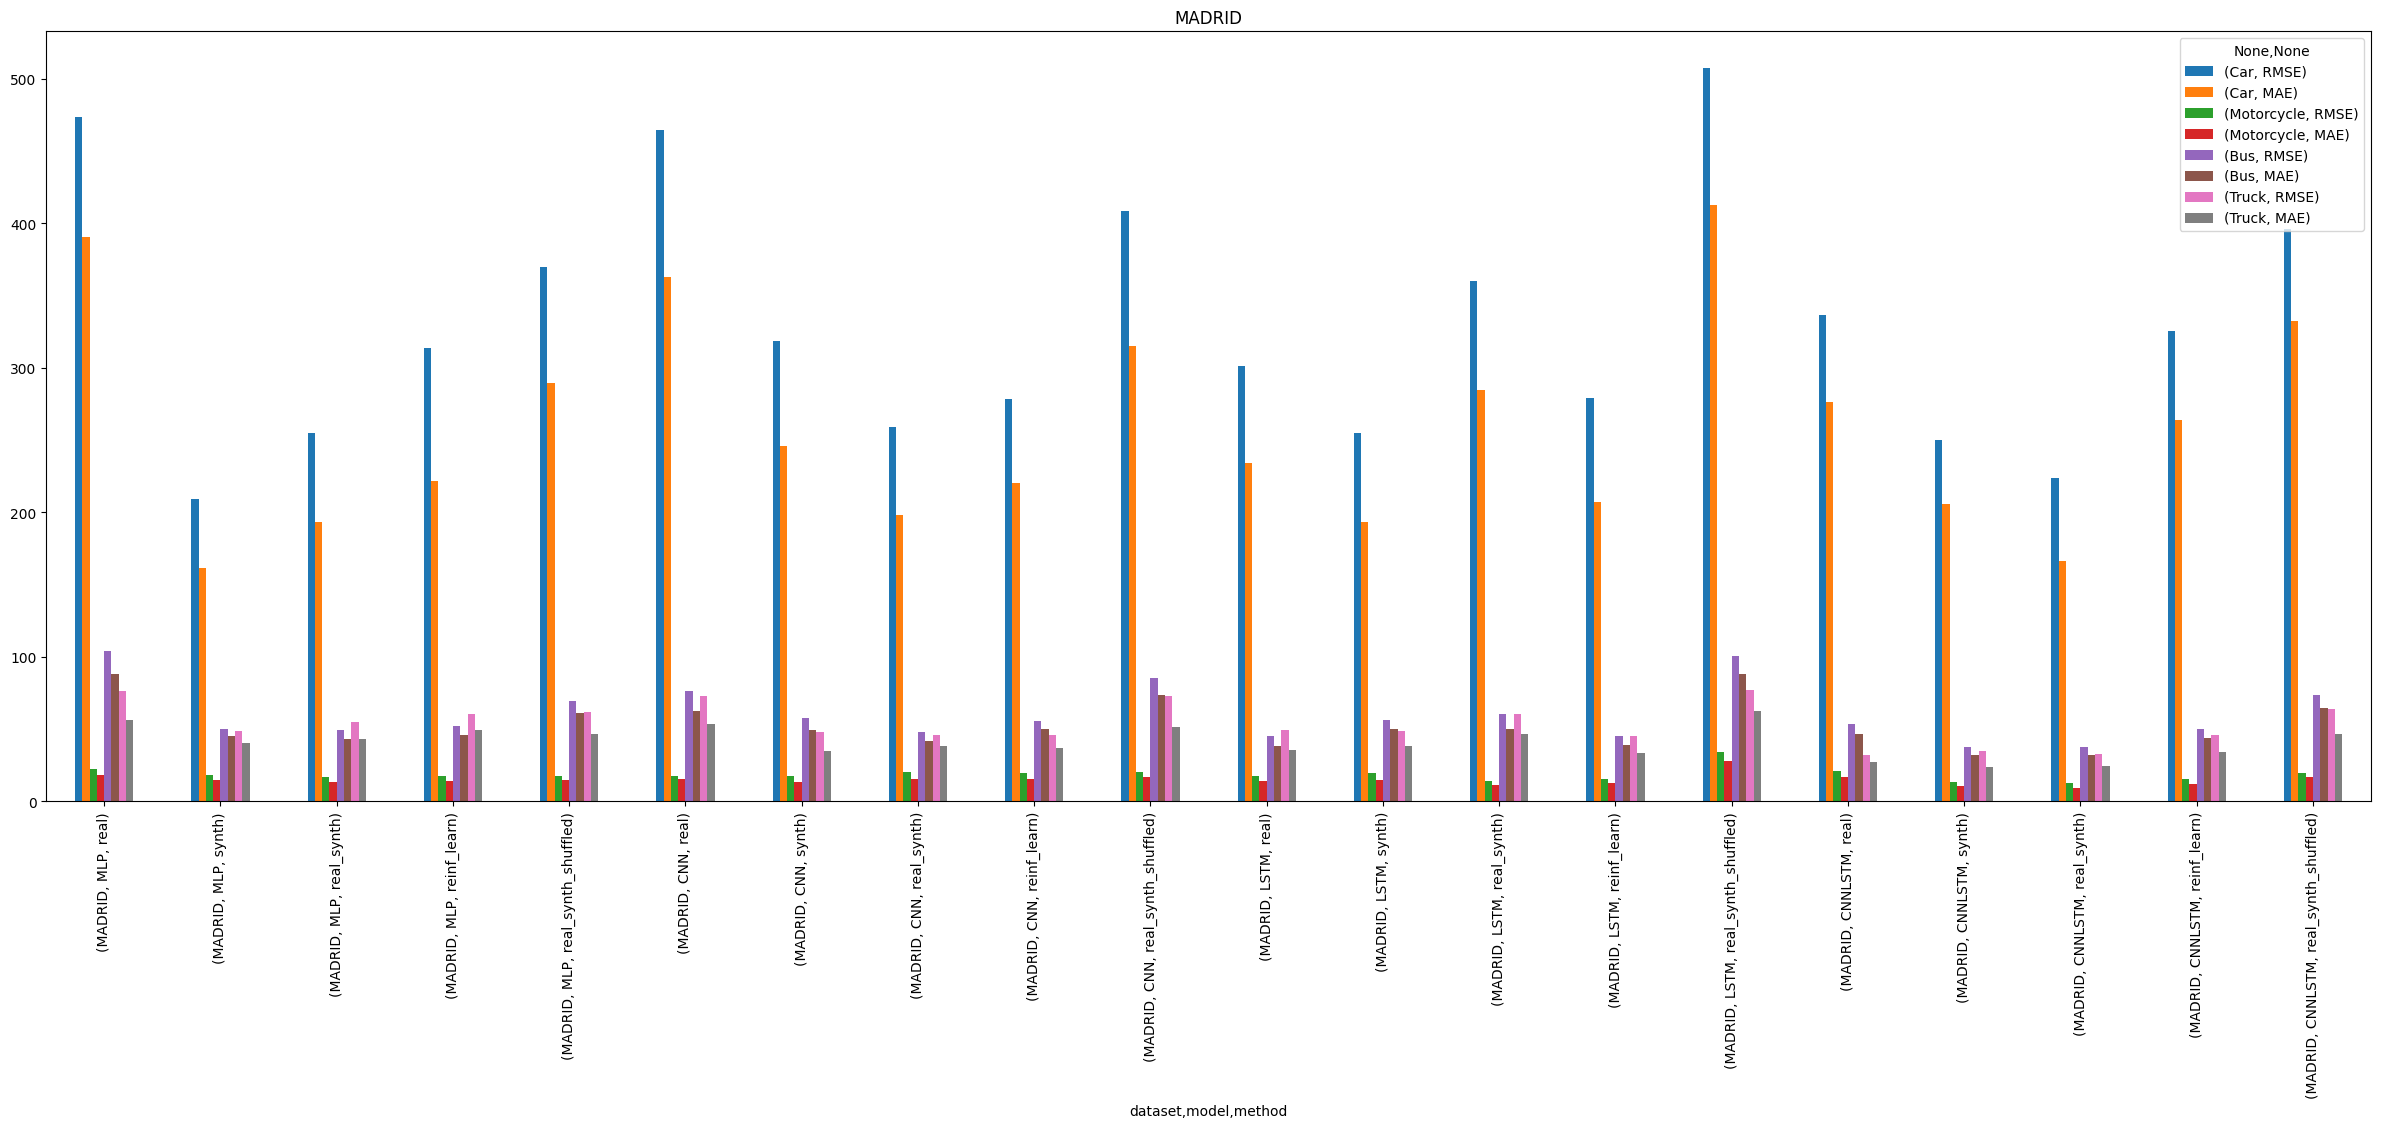

In [3]:
selected_columns = MultiIndex.from_product([
    ['Car', 'Motorcycle', 'Bus', 'Truck'], 
    ['24h'],
    ['RMSE', 'MAE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel(1, axis=1)
selected_combined_csv.loc[['BILBAO']].plot(kind='bar', title='BILBAO', figsize=(30,10))
selected_combined_csv.loc[['MADRID']].plot(kind='bar', title='MADRID', figsize=(30,10))
selected_combined_csv

Car  Motorcycle        Bus  \
dataset model   method                                                   
BILBAO  MLP     real                 349.095423    7.014193  53.001341   
                synth                225.137557    2.271980  20.536033   
                real_synth           240.159913    3.008620  23.583715   
                reinf_learn          207.853931    2.876312  19.146958   
                real_synth_shuffled  350.991062    7.845421  27.334665   
        CNN     real                 566.103230    6.133828  55.400328   
                synth                271.789186    2.735934  28.303200   
                real_synth           332.920960    2.801480  29.737481   
                reinf_learn          171.358140    2.754843  19.447897   
                real_synth_shuffled  319.883982    4.272253  31.898660   
        LSTM    real                 400.112364    2.723395  36.850122   
                synth                334.334395    2.437226  30.710794   
                real_synth           258.525604    2.968225  26.934877   
                reinf_learn          224.676837    3.359651  24.728103   
                real_synth_shuffled  428.837464    3.846768  35.917613   
        CNNLSTM real                 271.022000    3.220003  38.403879   
                synth                173.244627    1.841004  16.502748   
                real_synth           213.355645    1.881377  19.547612   
                reinf_learn          186.871305    2.490433  17.652916   
                real_synth_shuffled  305.911787    5.196696  35.741042   
MADRID  MLP     real                 390.559844   18.654423  88.356514   
                synth                161.779553   14.785919  45.455291   
                real_synth           193.483421   13.296952  43.499355   
                reinf_learn          221.716909   13.951923  45.657805   
                real_synth_shuffled  289.113363   15.129043  61.261201   
        CNN     real                 363.009696   15.535572  62.335270   
                synth                246.121609   13.197247  49.286673   
                real_synth           198.089639   15.629316  41.555114   
                reinf_learn          220.430642   15.850045  50.182005   
                real_synth_shuffled  314.787027   16.840214  73.353911   
        LSTM    real                 233.881056   14.203012  38.630285   
                synth                193.607585   15.178390  50.156426   
                real_synth           284.249557   11.557800  50.030864   
                reinf_learn          206.806561   12.688248  38.760622   
                real_synth_shuffled  412.613911   27.674243  88.437208   
        CNNLSTM real                 276.056965   17.200016  46.390872   
                synth                205.694673   10.986540  32.081519   
                real_synth           166.091463    9.449105  32.152639   
                reinf_learn          264.030151   12.226431  44.034290   
                real_synth_shuffled  332.650079   16.885290  64.425426   

                                          Truck  
dataset model   method                           
BILBAO  MLP     real                  88.198276  
                synth                 32.960188  
                real_synth            38.222484  
                reinf_learn           31.618814  
                real_synth_shuffled   53.450679  
        CNN     real                 114.394162  
                synth                 46.595785  
                real_synth            53.132635  
                reinf_learn           22.153620  
                real_synth_shuffled   52.089174  
        LSTM    real                  46.762148  
                synth                 44.611324  
                real_synth            41.561657  
                reinf_learn           38.255843  
                real_synth_shuffled   51.705791  
        CNNLSTM real                  52.204535  
                synth              

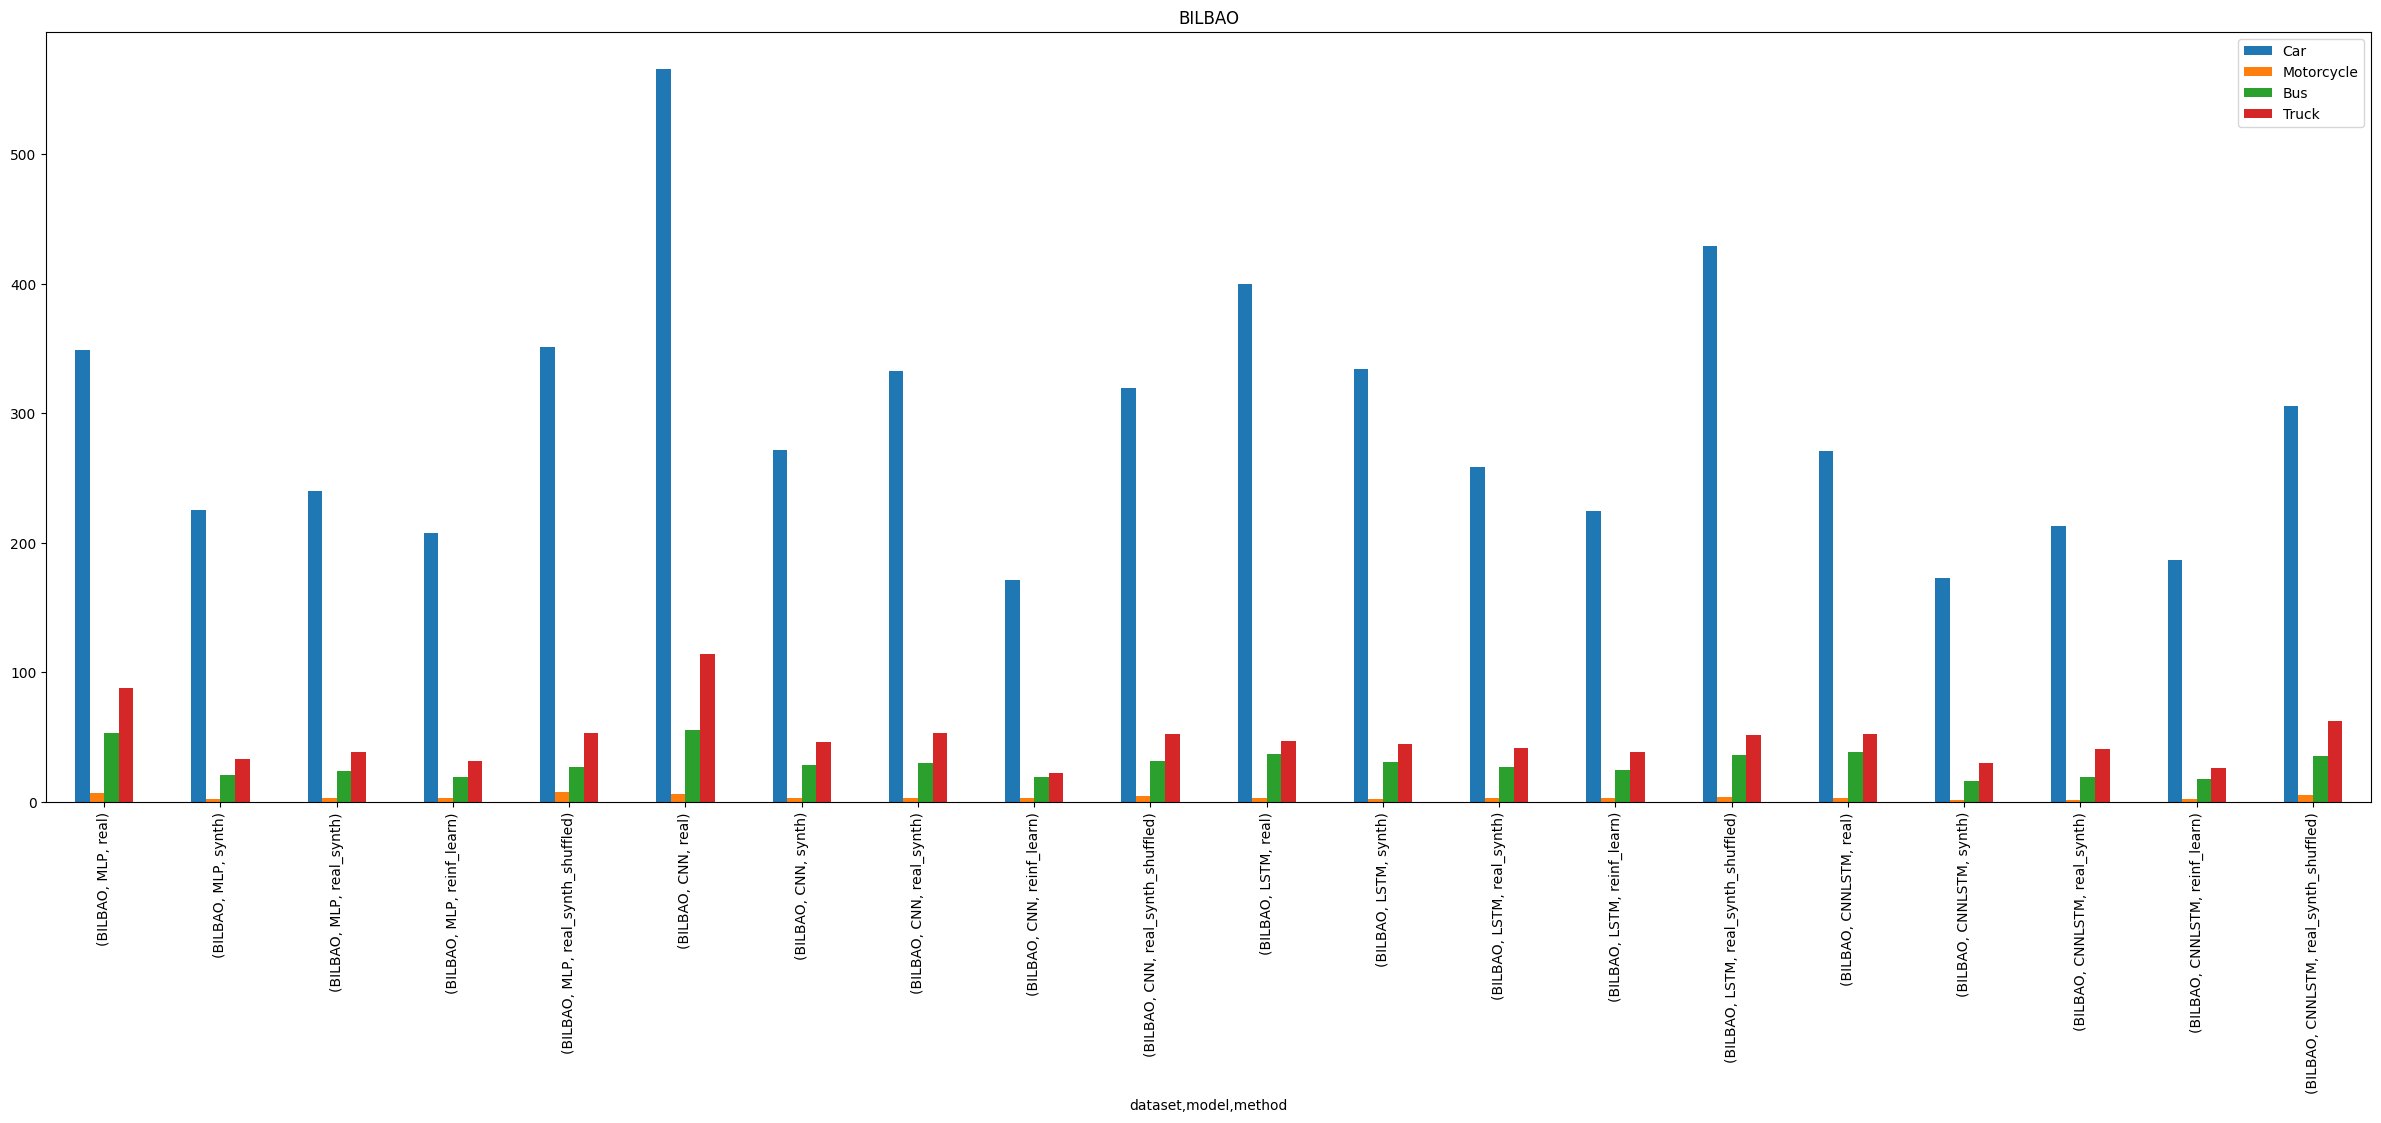

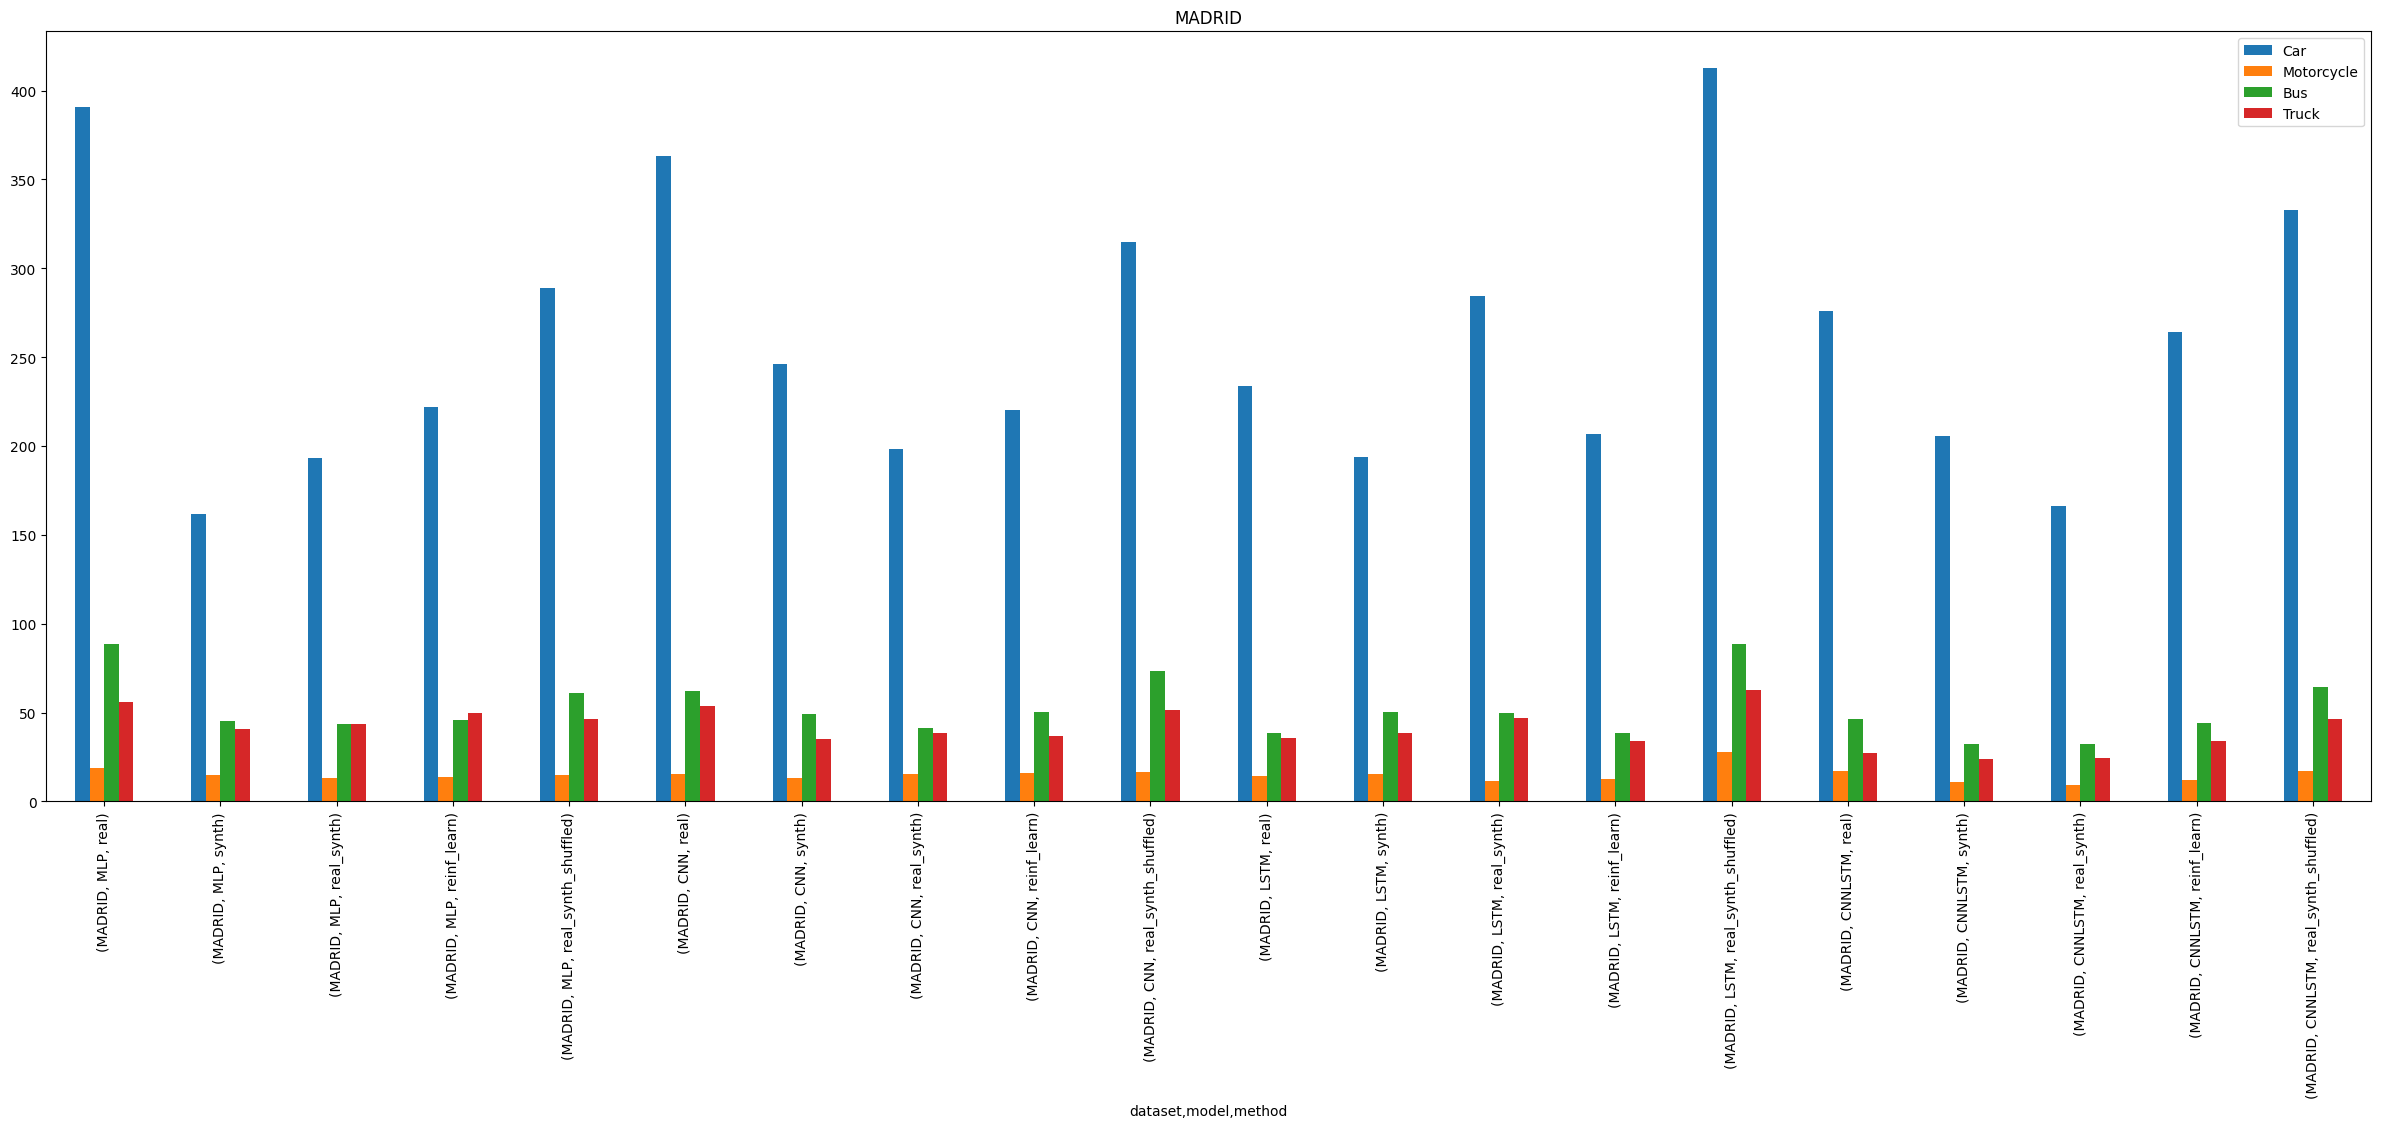

In [4]:
selected_columns = MultiIndex.from_product([
    ['Car', 'Motorcycle', 'Bus', 'Truck'], 
    ['24h'],
    ['MAE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel([1,2], axis=1)
selected_combined_csv.loc[['BILBAO']].plot(kind='bar', title='BILBAO', figsize=(30,10))
selected_combined_csv.loc[['MADRID']].plot(kind='bar', title='MADRID', figsize=(30,10))
selected_combined_csv

Car  Motorcycle        Bus  \
dataset model   method                                                   
BILBAO  MLP     real                 349.095423    7.014193  53.001341   
                synth                225.137557    2.271980  20.536033   
                real_synth           240.159913    3.008620  23.583715   
                reinf_learn          207.853931    2.876312  19.146958   
                real_synth_shuffled  350.991062    7.845421  27.334665   
        CNN     real                 566.103230    6.133828  55.400328   
                synth                271.789186    2.735934  28.303200   
                real_synth           332.920960    2.801480  29.737481   
                reinf_learn          171.358140    2.754843  19.447897   
                real_synth_shuffled  319.883982    4.272253  31.898660   
        LSTM    real                 400.112364    2.723395  36.850122   
                synth                334.334395    2.437226  30.710794   
                real_synth           258.525604    2.968225  26.934877   
                reinf_learn          224.676837    3.359651  24.728103   
                real_synth_shuffled  428.837464    3.846768  35.917613   
        CNNLSTM real                 271.022000    3.220003  38.403879   
                synth                173.244627    1.841004  16.502748   
                real_synth           213.355645    1.881377  19.547612   
                reinf_learn          186.871305    2.490433  17.652916   
                real_synth_shuffled  305.911787    5.196696  35.741042   
MADRID  MLP     real                 390.559844   18.654423  88.356514   
                synth                161.779553   14.785919  45.455291   
                real_synth           193.483421   13.296952  43.499355   
                reinf_learn          221.716909   13.951923  45.657805   
                real_synth_shuffled  289.113363   15.129043  61.261201   
        CNN     real                 363.009696   15.535572  62.335270   
                synth                246.121609   13.197247  49.286673   
                real_synth           198.089639   15.629316  41.555114   
                reinf_learn          220.430642   15.850045  50.182005   
                real_synth_shuffled  314.787027   16.840214  73.353911   
        LSTM    real                 233.881056   14.203012  38.630285   
                synth                193.607585   15.178390  50.156426   
                real_synth           284.249557   11.557800  50.030864   
                reinf_learn          206.806561   12.688248  38.760622   
                real_synth_shuffled  412.613911   27.674243  88.437208   
        CNNLSTM real                 276.056965   17.200016  46.390872   
                synth                205.694673   10.986540  32.081519   
                real_synth           166.091463    9.449105  32.152639   
                reinf_learn          264.030151   12.226431  44.034290   
                real_synth_shuffled  332.650079   16.885290  64.425426   

                                          Truck  
dataset model   method                           
BILBAO  MLP     real                  88.198276  
                synth                 32.960188  
                real_synth            38.222484  
                reinf_learn           31.618814  
                real_synth_shuffled   53.450679  
        CNN     real                 114.394162  
                synth                 46.595785  
                real_synth            53.132635  
                reinf_learn           22.153620  
                real_synth_shuffled   52.089174  
        LSTM    real                  46.762148  
                synth                 44.611324  
                real_synth            41.561657  
                reinf_learn           38.255843  
                real_synth_shuffled   51.705791  
        CNNLSTM real                  52.204535  
                synth              

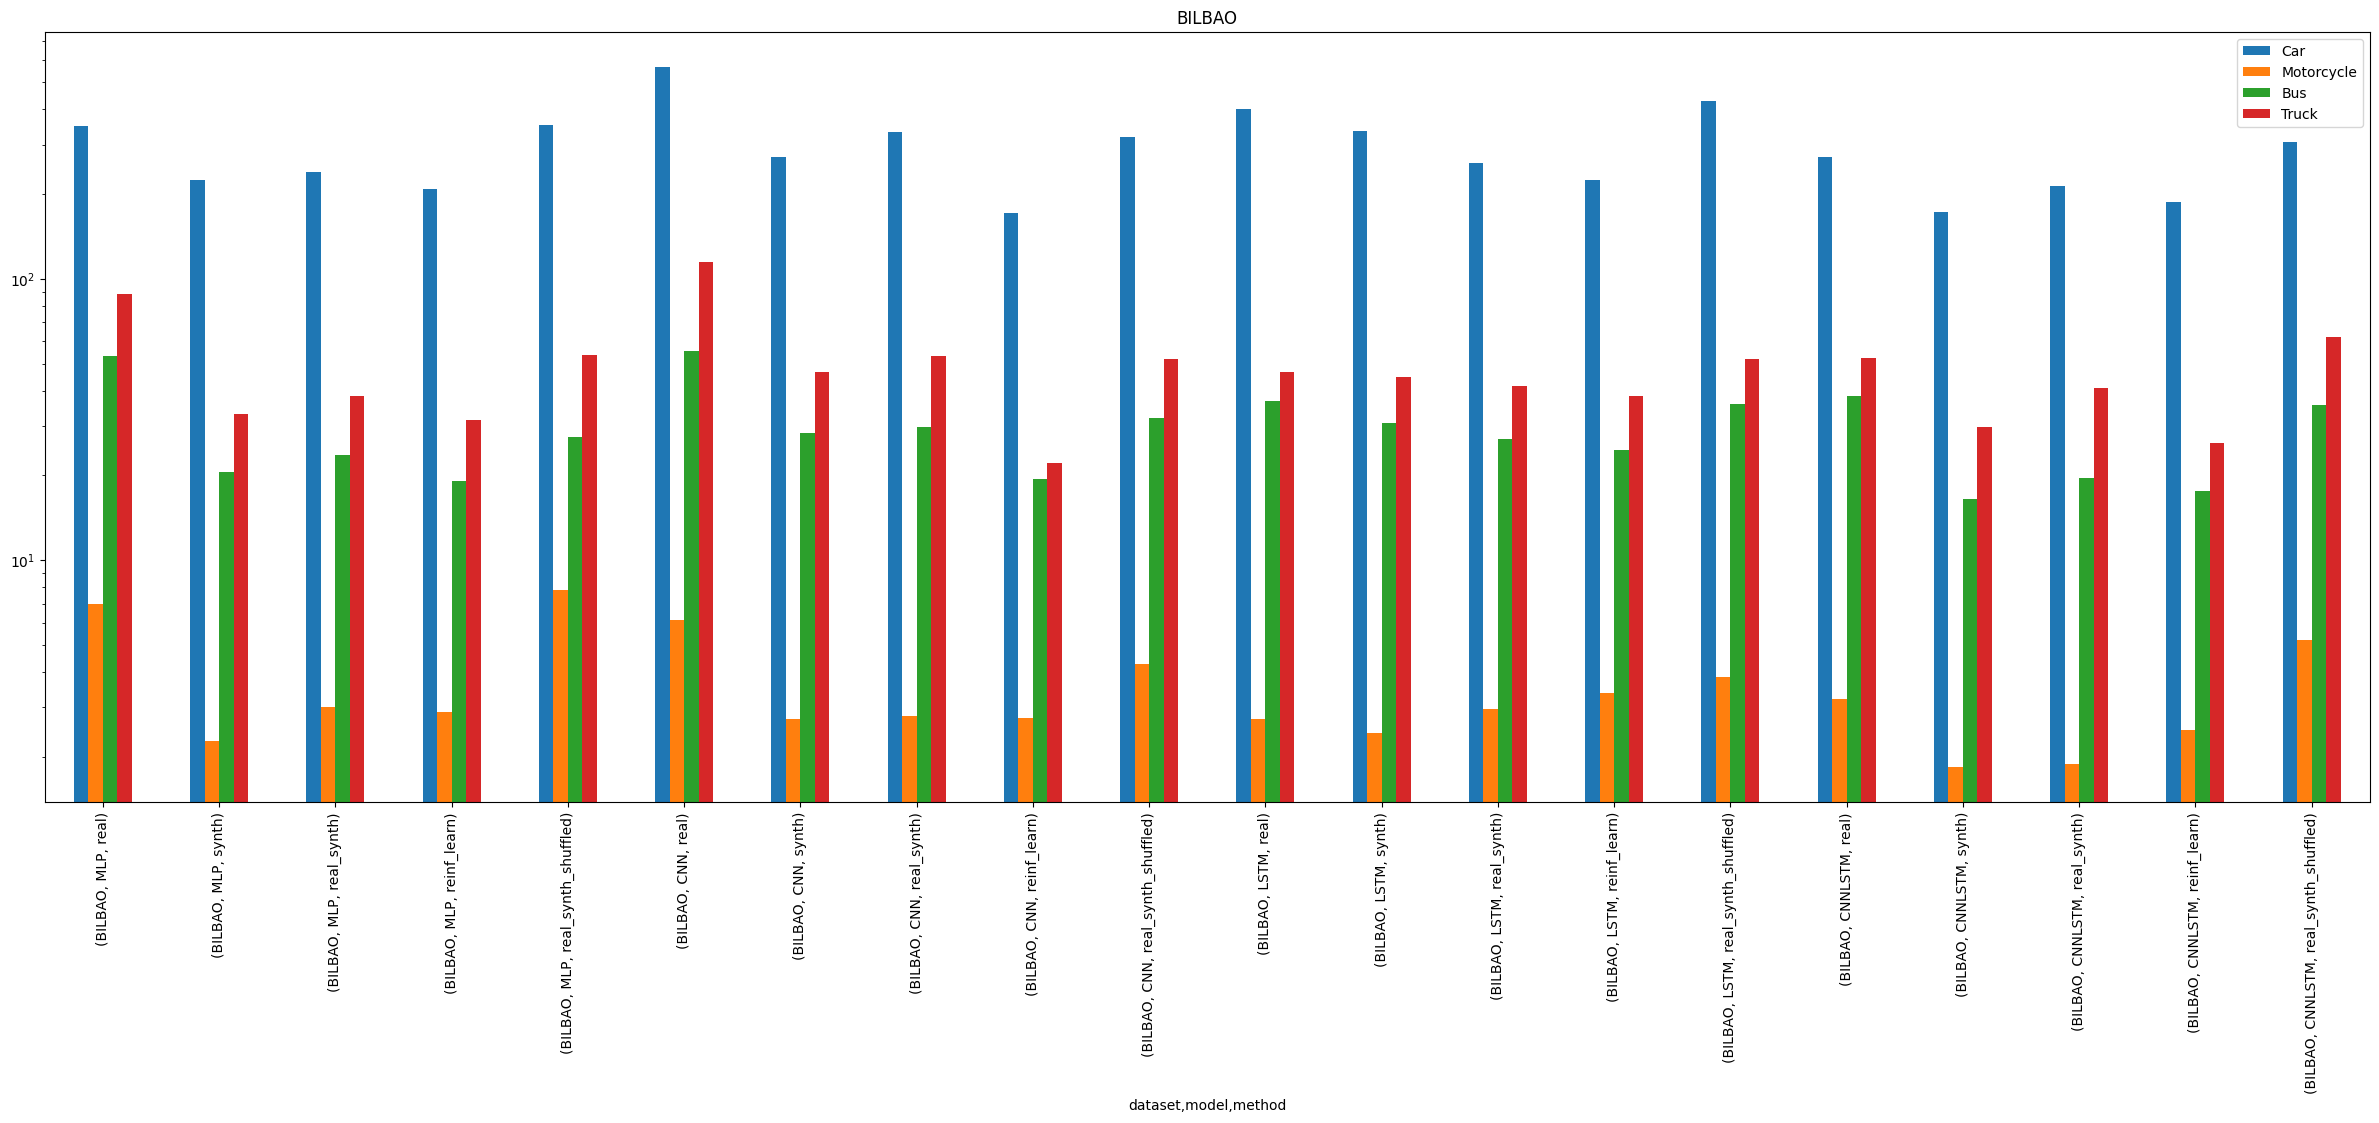

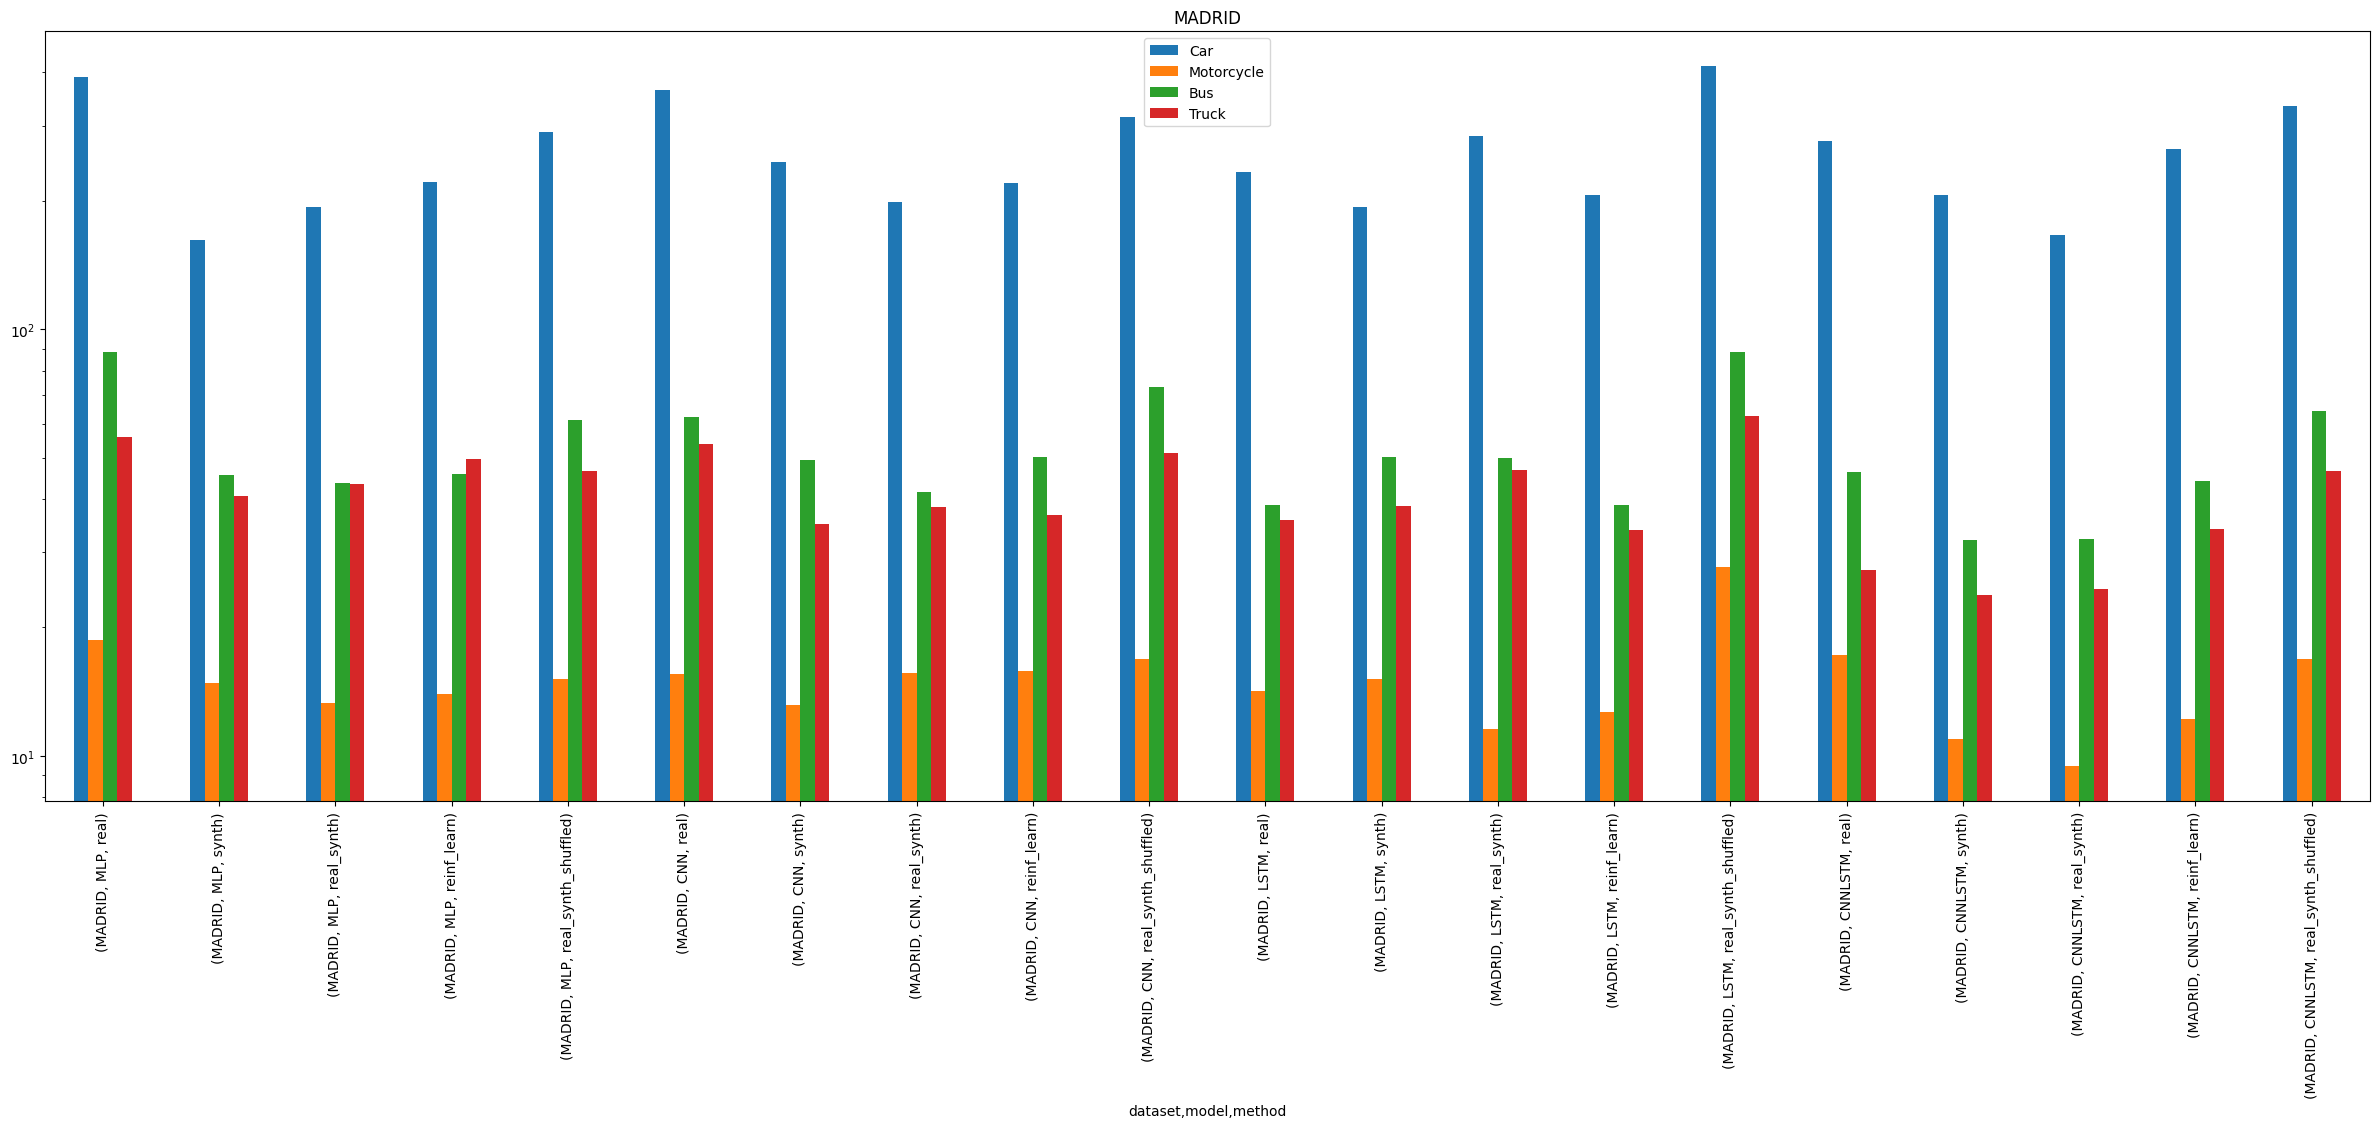

In [5]:
selected_columns = MultiIndex.from_product([
    ['Car', 'Motorcycle', 'Bus', 'Truck'], 
    ['24h'],
    ['MAE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel([1,2], axis=1)
selected_combined_csv.loc[['BILBAO']].plot(kind='bar', title='BILBAO', logy=True, figsize=(30,10))
selected_combined_csv.loc[['MADRID']].plot(kind='bar', title='MADRID', logy=True, figsize=(30,10))
selected_combined_csv

Car  Motorcycle        Bus  \
dataset model   method                                                   
BILBAO  CNNLSTM real                 271.022000    3.220003  38.403879   
                synth                173.244627    1.841004  16.502748   
                real_synth           213.355645    1.881377  19.547612   
                reinf_learn          186.871305    2.490433  17.652916   
                real_synth_shuffled  305.911787    5.196696  35.741042   
MADRID  CNNLSTM real                 276.056965   17.200016  46.390872   
                synth                205.694673   10.986540  32.081519   
                real_synth           166.091463    9.449105  32.152639   
                reinf_learn          264.030151   12.226431  44.034290   
                real_synth_shuffled  332.650079   16.885290  64.425426   

                                         Truck  
dataset model   method                          
BILBAO  CNNLSTM real                 52.204535  
                synth                29.702572  
                real_synth           40.830448  
                reinf_learn          26.085971  
                real_synth_shuffled  62.132160  
MADRID  CNNLSTM real                 27.334421  
                synth                23.789873  
                real_synth           24.572090  
                reinf_learn          34.038346  
                real_synth_shuffled  46.415346

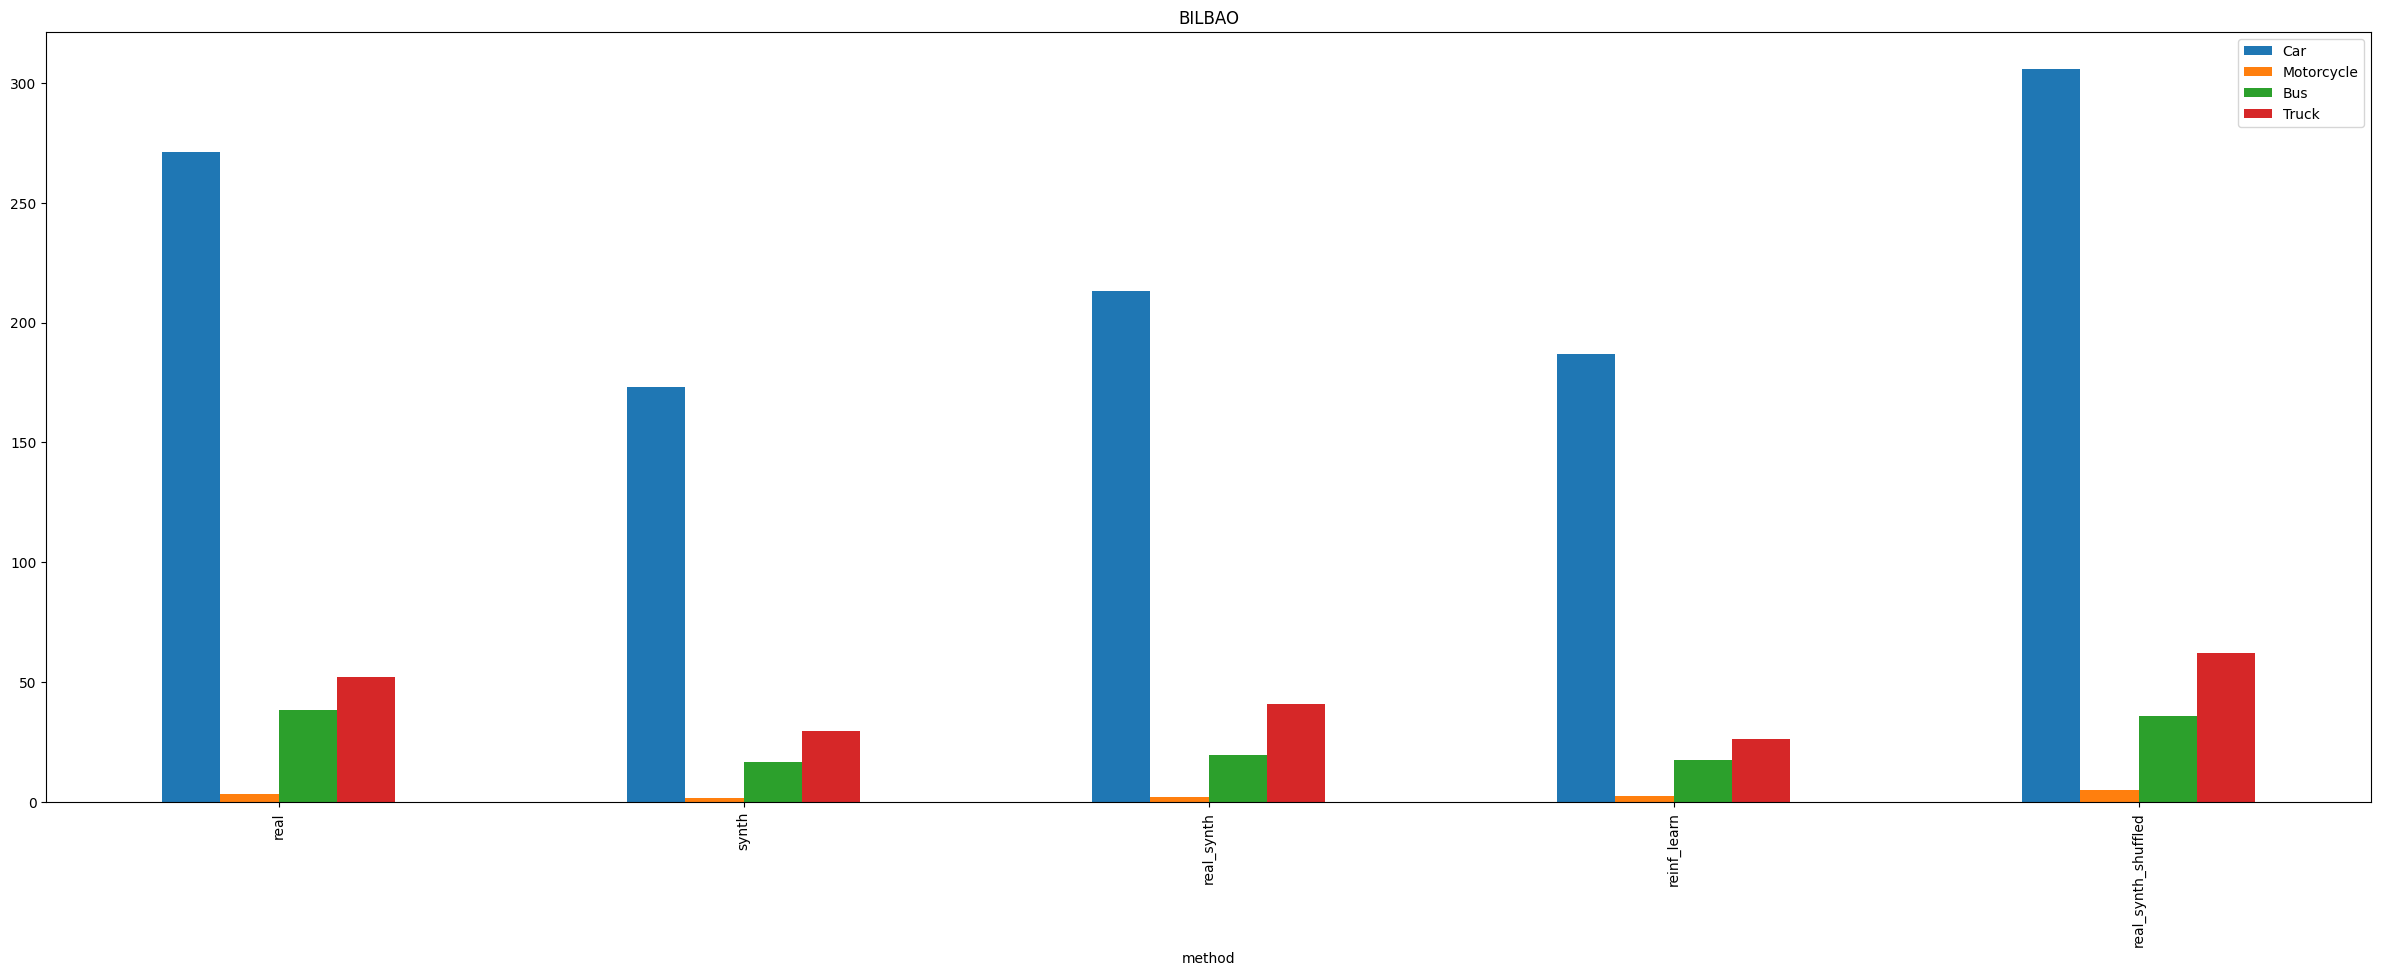

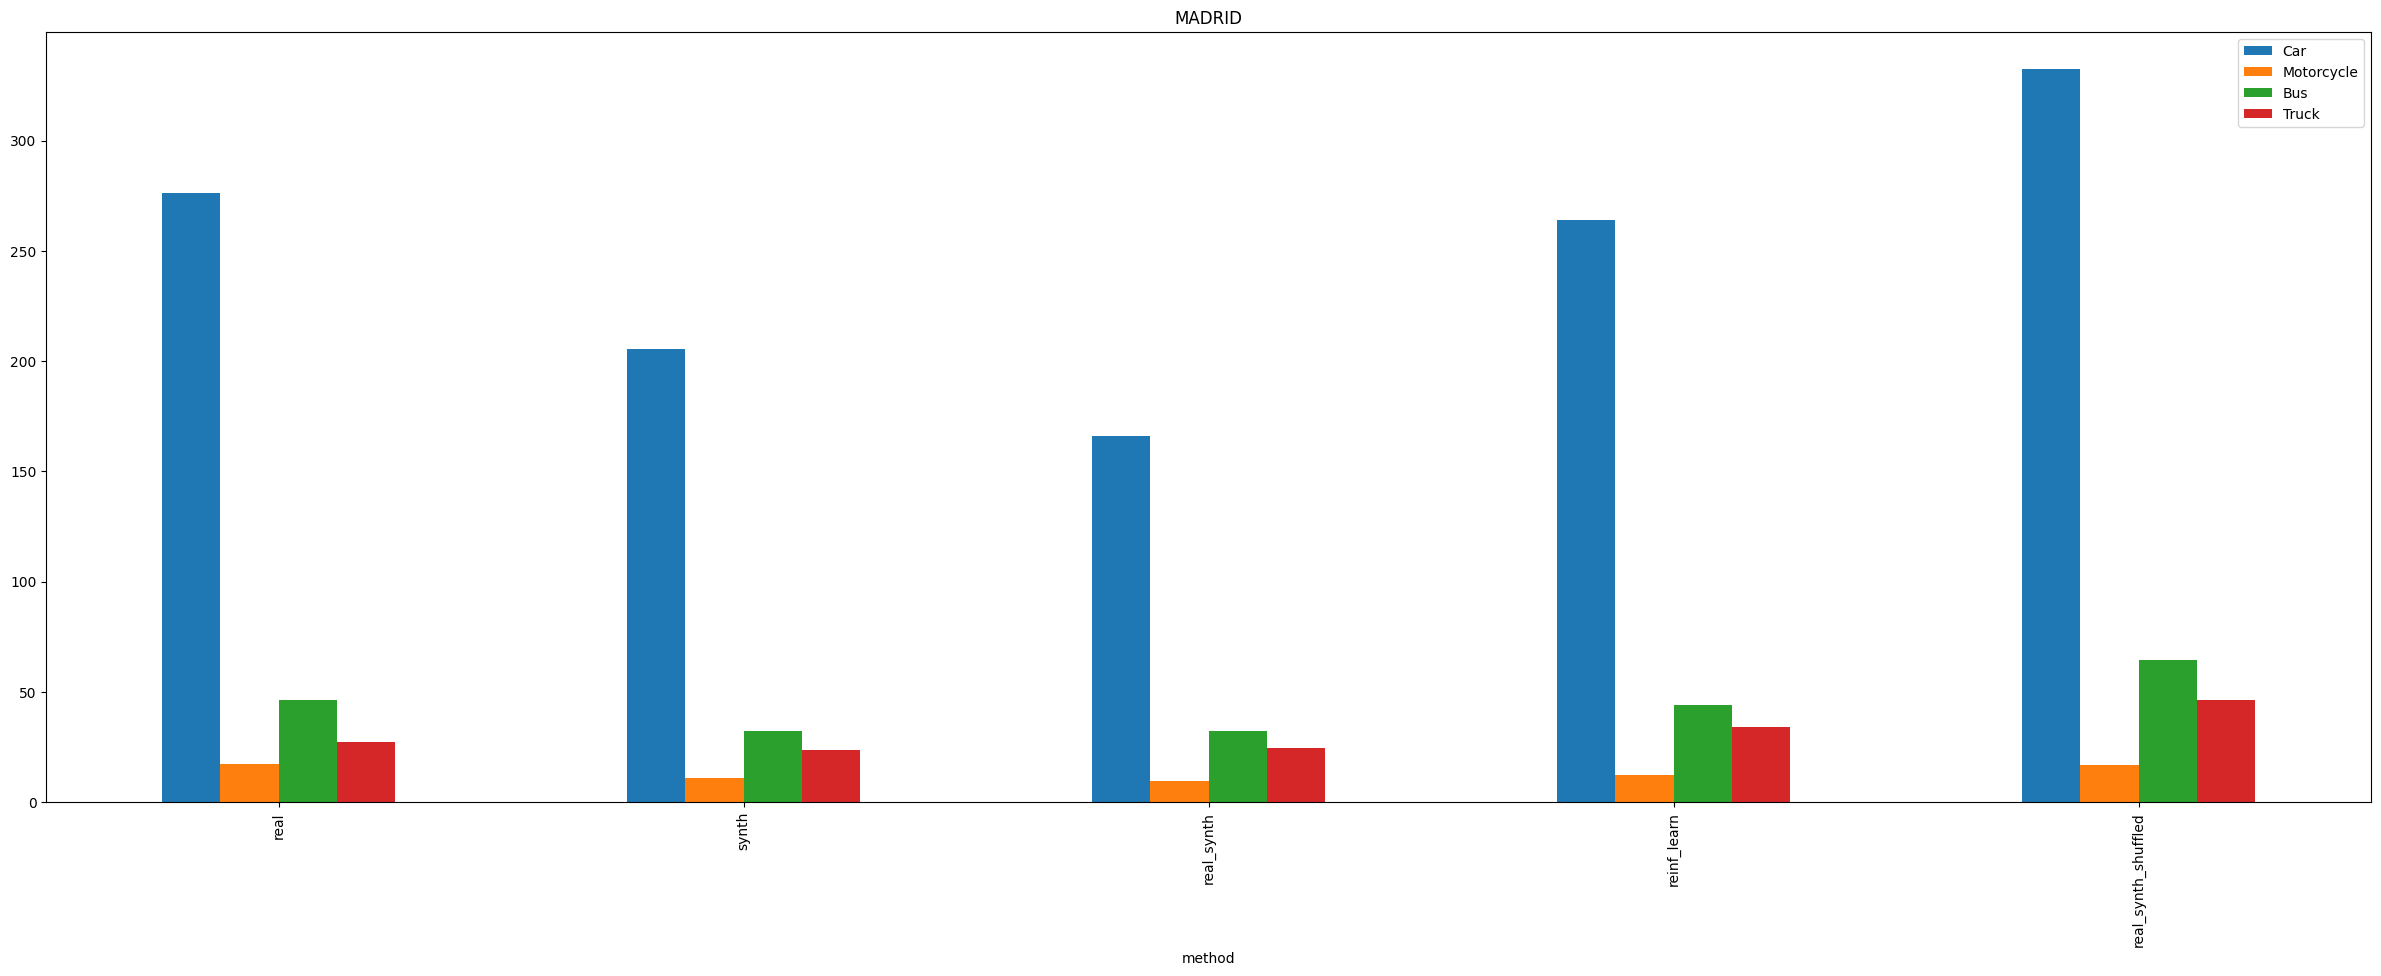

In [6]:
selected_columns = MultiIndex.from_product([
    ['Car', 'Motorcycle', 'Bus', 'Truck'], 
    ['24h'],
    ['MAE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel([1,2], axis=1)
selected_combined_csv.loc[('BILBAO', 'CNNLSTM')].plot(kind='bar', title='BILBAO', figsize=(30,10))
selected_combined_csv.loc[('MADRID', 'CNNLSTM')].plot(kind='bar', title='MADRID', figsize=(30,10))
selected_combined_csv.xs('CNNLSTM', level='model', drop_level=False)

Car  Motorcycle        Bus  \
dataset model   method                                                   
BILBAO  CNNLSTM real                 271.022000    3.220003  38.403879   
                synth                173.244627    1.841004  16.502748   
                real_synth           213.355645    1.881377  19.547612   
                reinf_learn          186.871305    2.490433  17.652916   
                real_synth_shuffled  305.911787    5.196696  35.741042   
MADRID  CNNLSTM real                 276.056965   17.200016  46.390872   
                synth                205.694673   10.986540  32.081519   
                real_synth           166.091463    9.449105  32.152639   
                reinf_learn          264.030151   12.226431  44.034290   
                real_synth_shuffled  332.650079   16.885290  64.425426   

                                         Truck  
dataset model   method                          
BILBAO  CNNLSTM real                 52.204535  
                synth                29.702572  
                real_synth           40.830448  
                reinf_learn          26.085971  
                real_synth_shuffled  62.132160  
MADRID  CNNLSTM real                 27.334421  
                synth                23.789873  
                real_synth           24.572090  
                reinf_learn          34.038346  
                real_synth_shuffled  46.415346

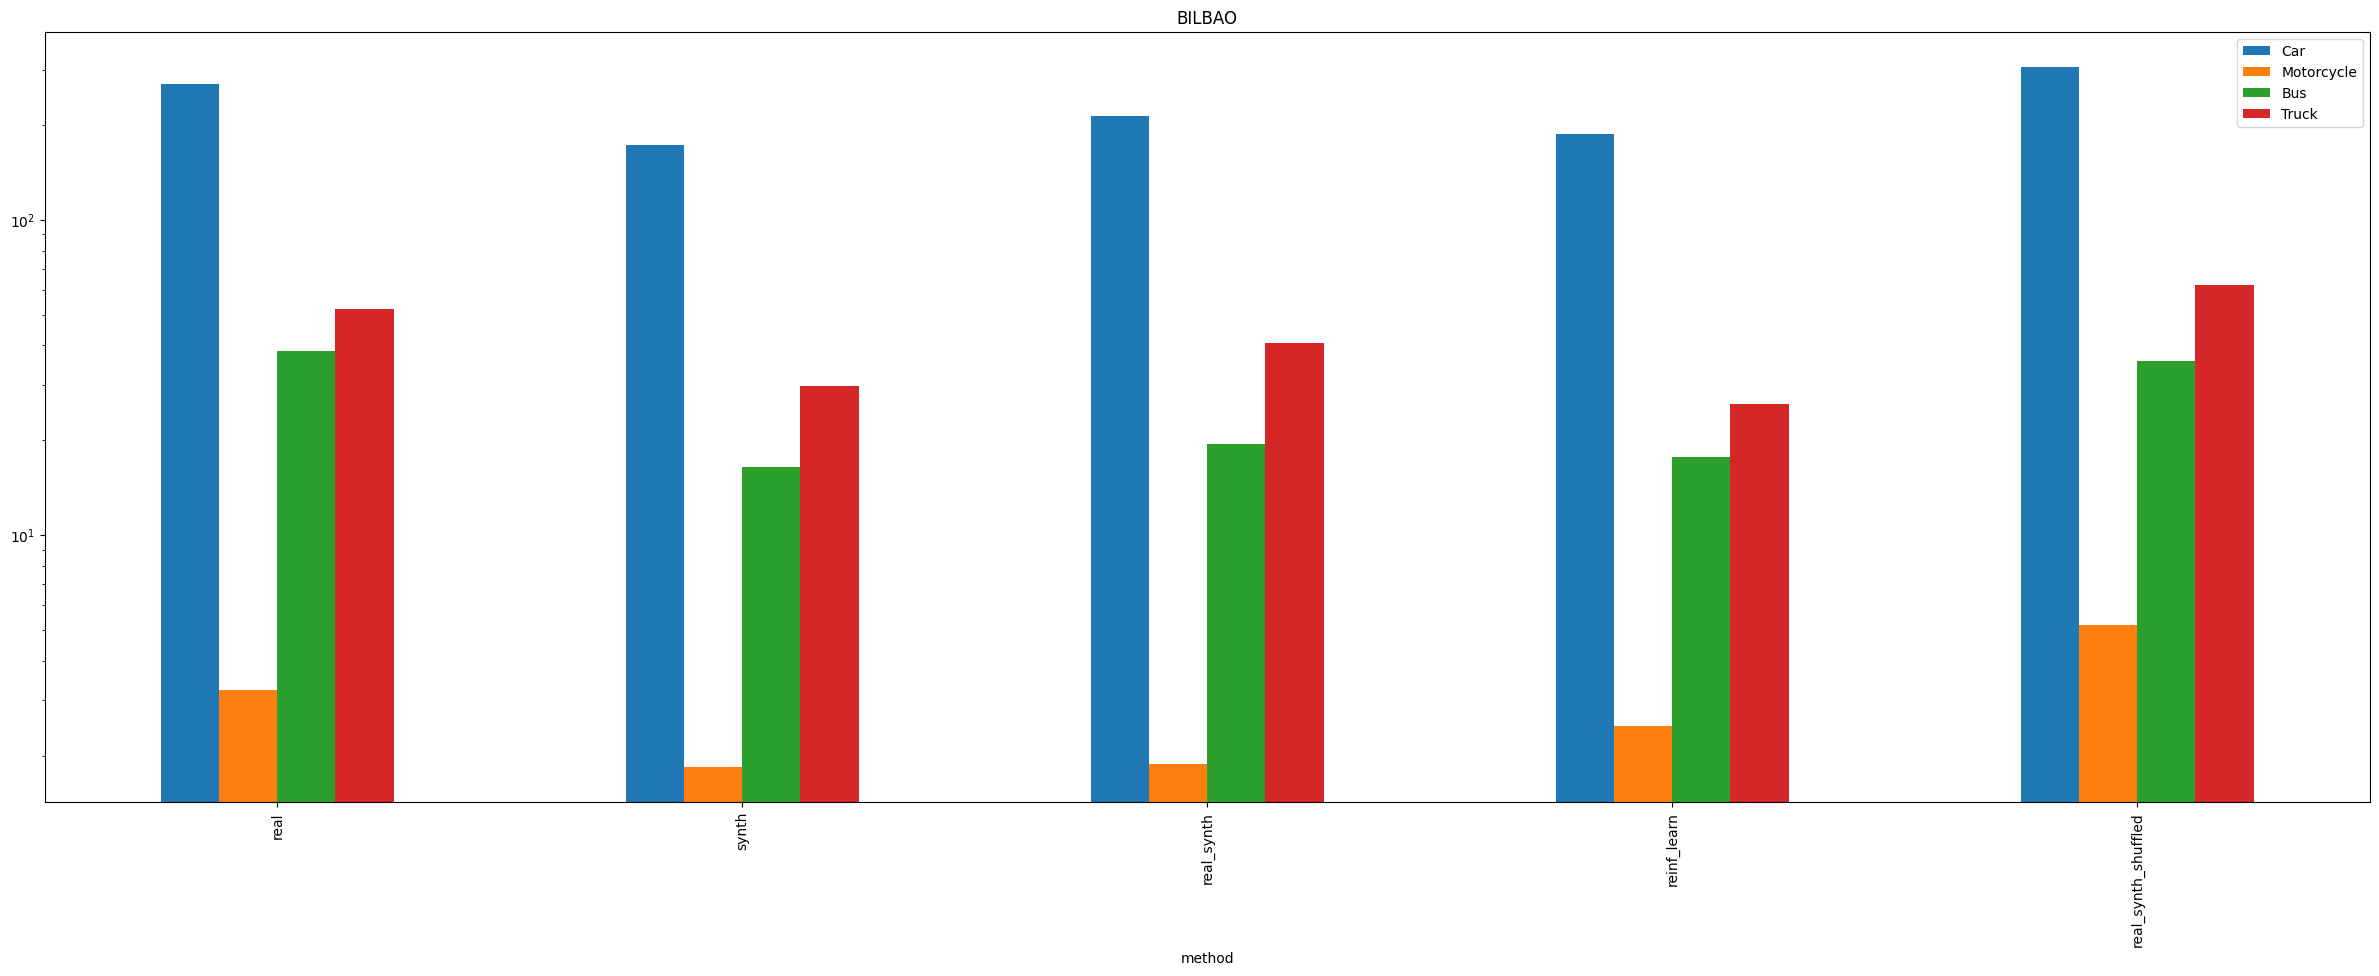

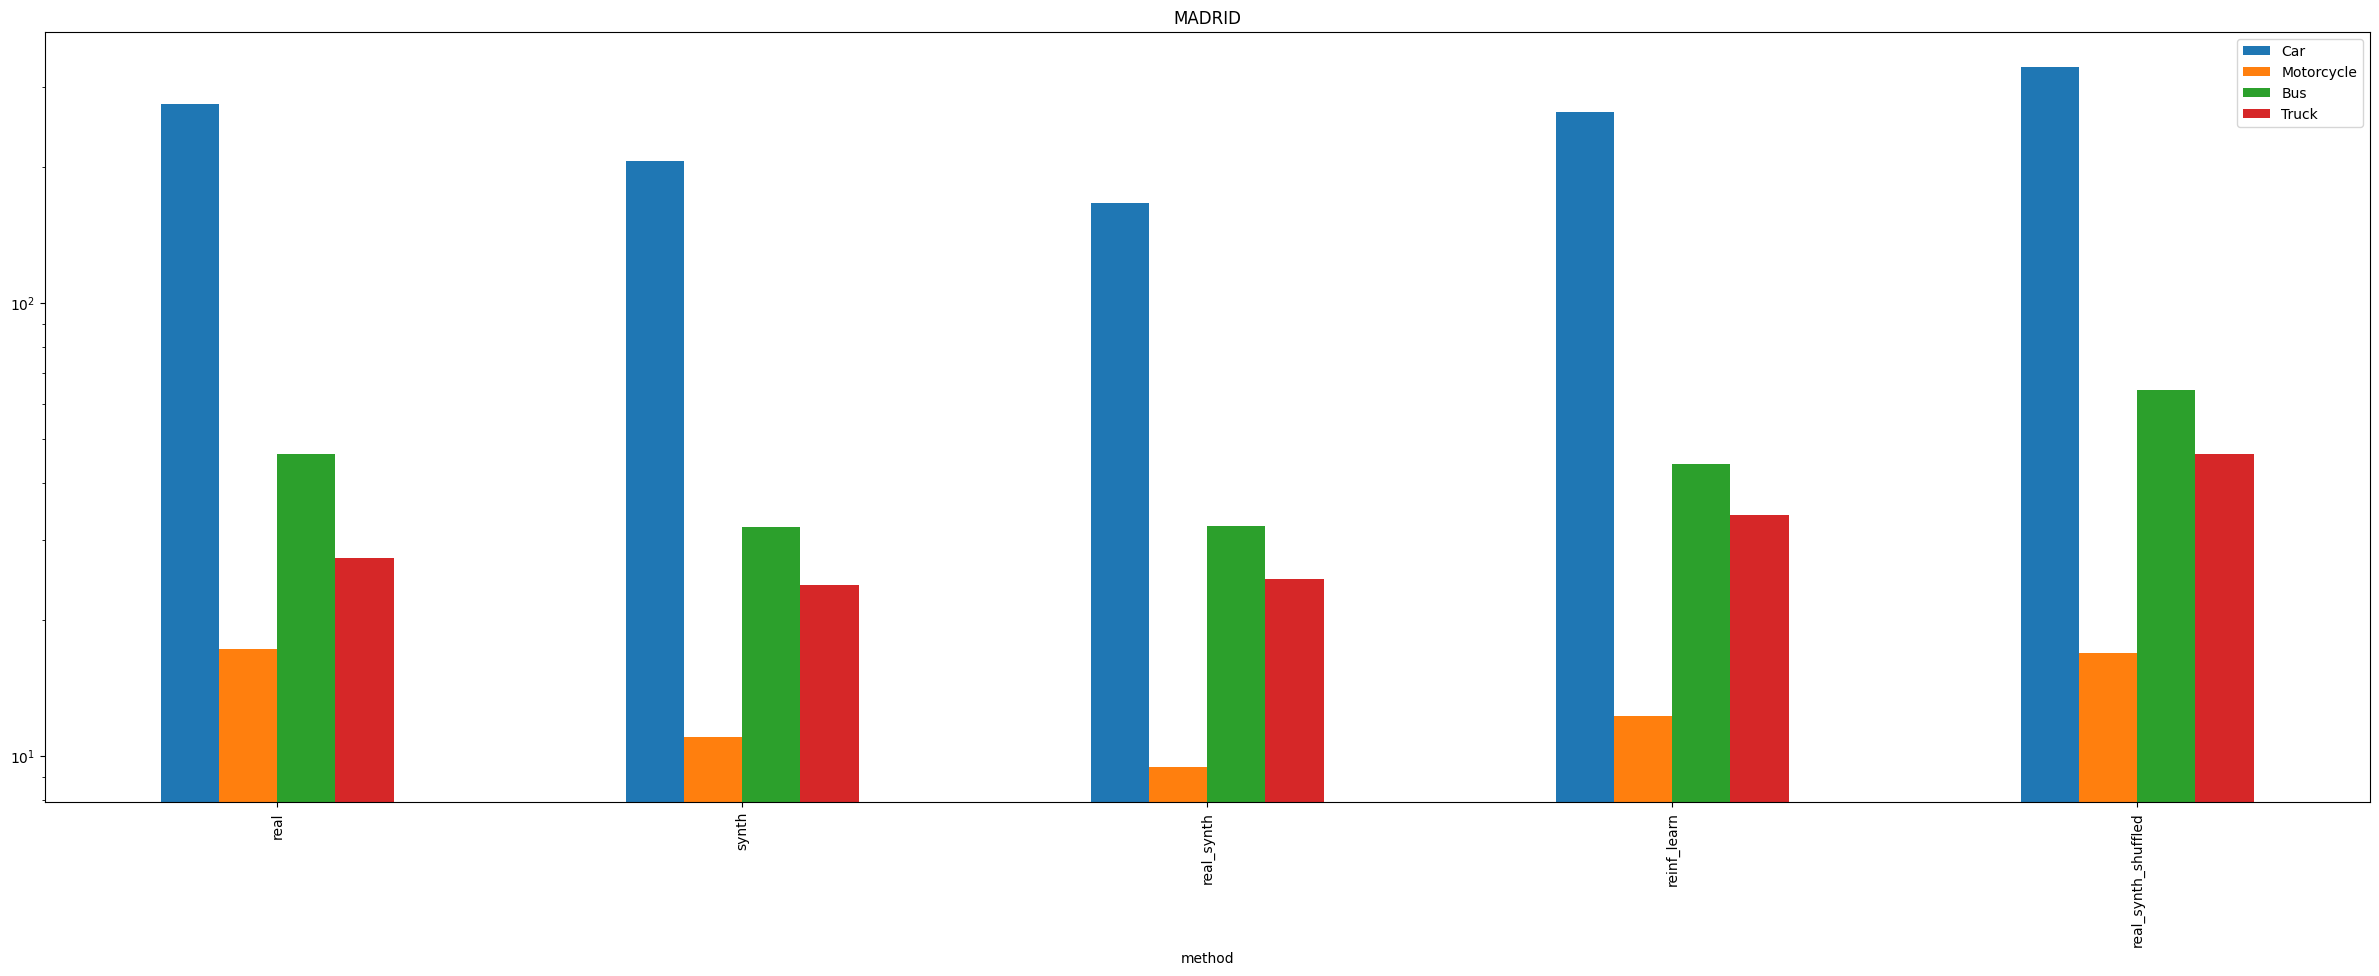

In [7]:
selected_columns = MultiIndex.from_product([
    ['Car', 'Motorcycle', 'Bus', 'Truck'], 
    ['24h'],
    ['MAE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel([1,2], axis=1)
selected_combined_csv.loc[('BILBAO', 'CNNLSTM')].plot(kind='bar', title='BILBAO', logy=True, figsize=(30,10))
selected_combined_csv.loc[('MADRID', 'CNNLSTM')].plot(kind='bar', title='MADRID', logy=True, figsize=(30,10))
selected_combined_csv.xs('CNNLSTM', level='model', drop_level=False)

Car  Motorcycle         Bus  \
dataset model   method                                                   
BILBAO  CNNLSTM real                 14.019425  123.991233   41.473385   
                synth                12.030246   45.396258   13.142793   
                real_synth           15.798246   64.101778   26.245952   
                reinf_learn          12.636294   88.192767   12.774549   
                real_synth_shuffled  15.835359  221.544171   32.259721   
MADRID  CNNLSTM real                 47.103214   84.256486   87.817437   
                synth                27.636849   55.995629   55.518546   
                real_synth           23.154274   46.759836   54.062546   
                reinf_learn          39.423452   62.539031   73.644872   
                real_synth_shuffled  54.353142   82.850423  120.971179   

                                         Truck  
dataset model   method                          
BILBAO  CNNLSTM real                 27.744284  
                synth                24.008378  
                real_synth           38.312934  
                reinf_learn          20.120286  
                real_synth_shuffled  32.291154  
MADRID  CNNLSTM real                 65.033207  
                synth                45.054111  
                real_synth           46.353055  
                reinf_learn          61.209879  
                real_synth_shuffled  87.136928

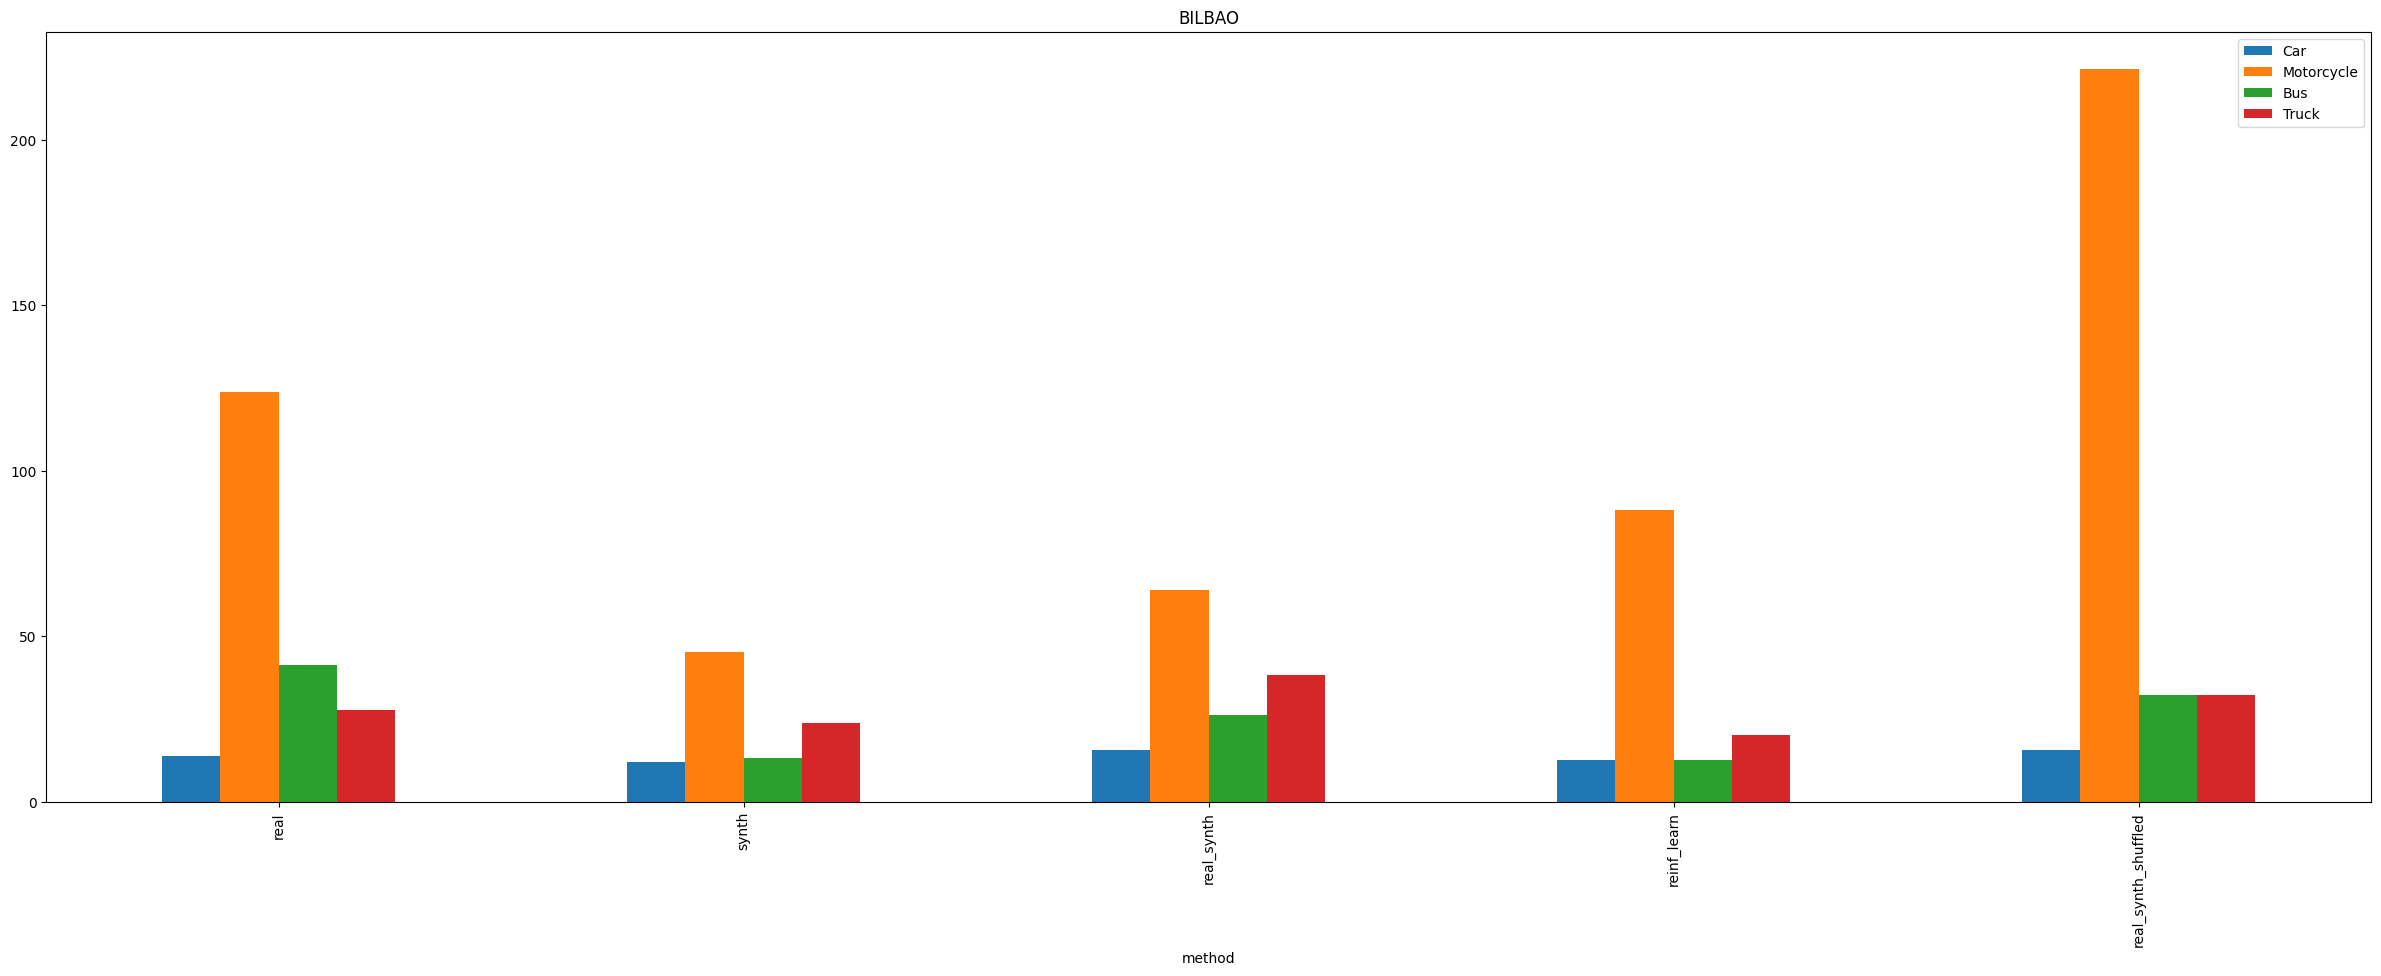

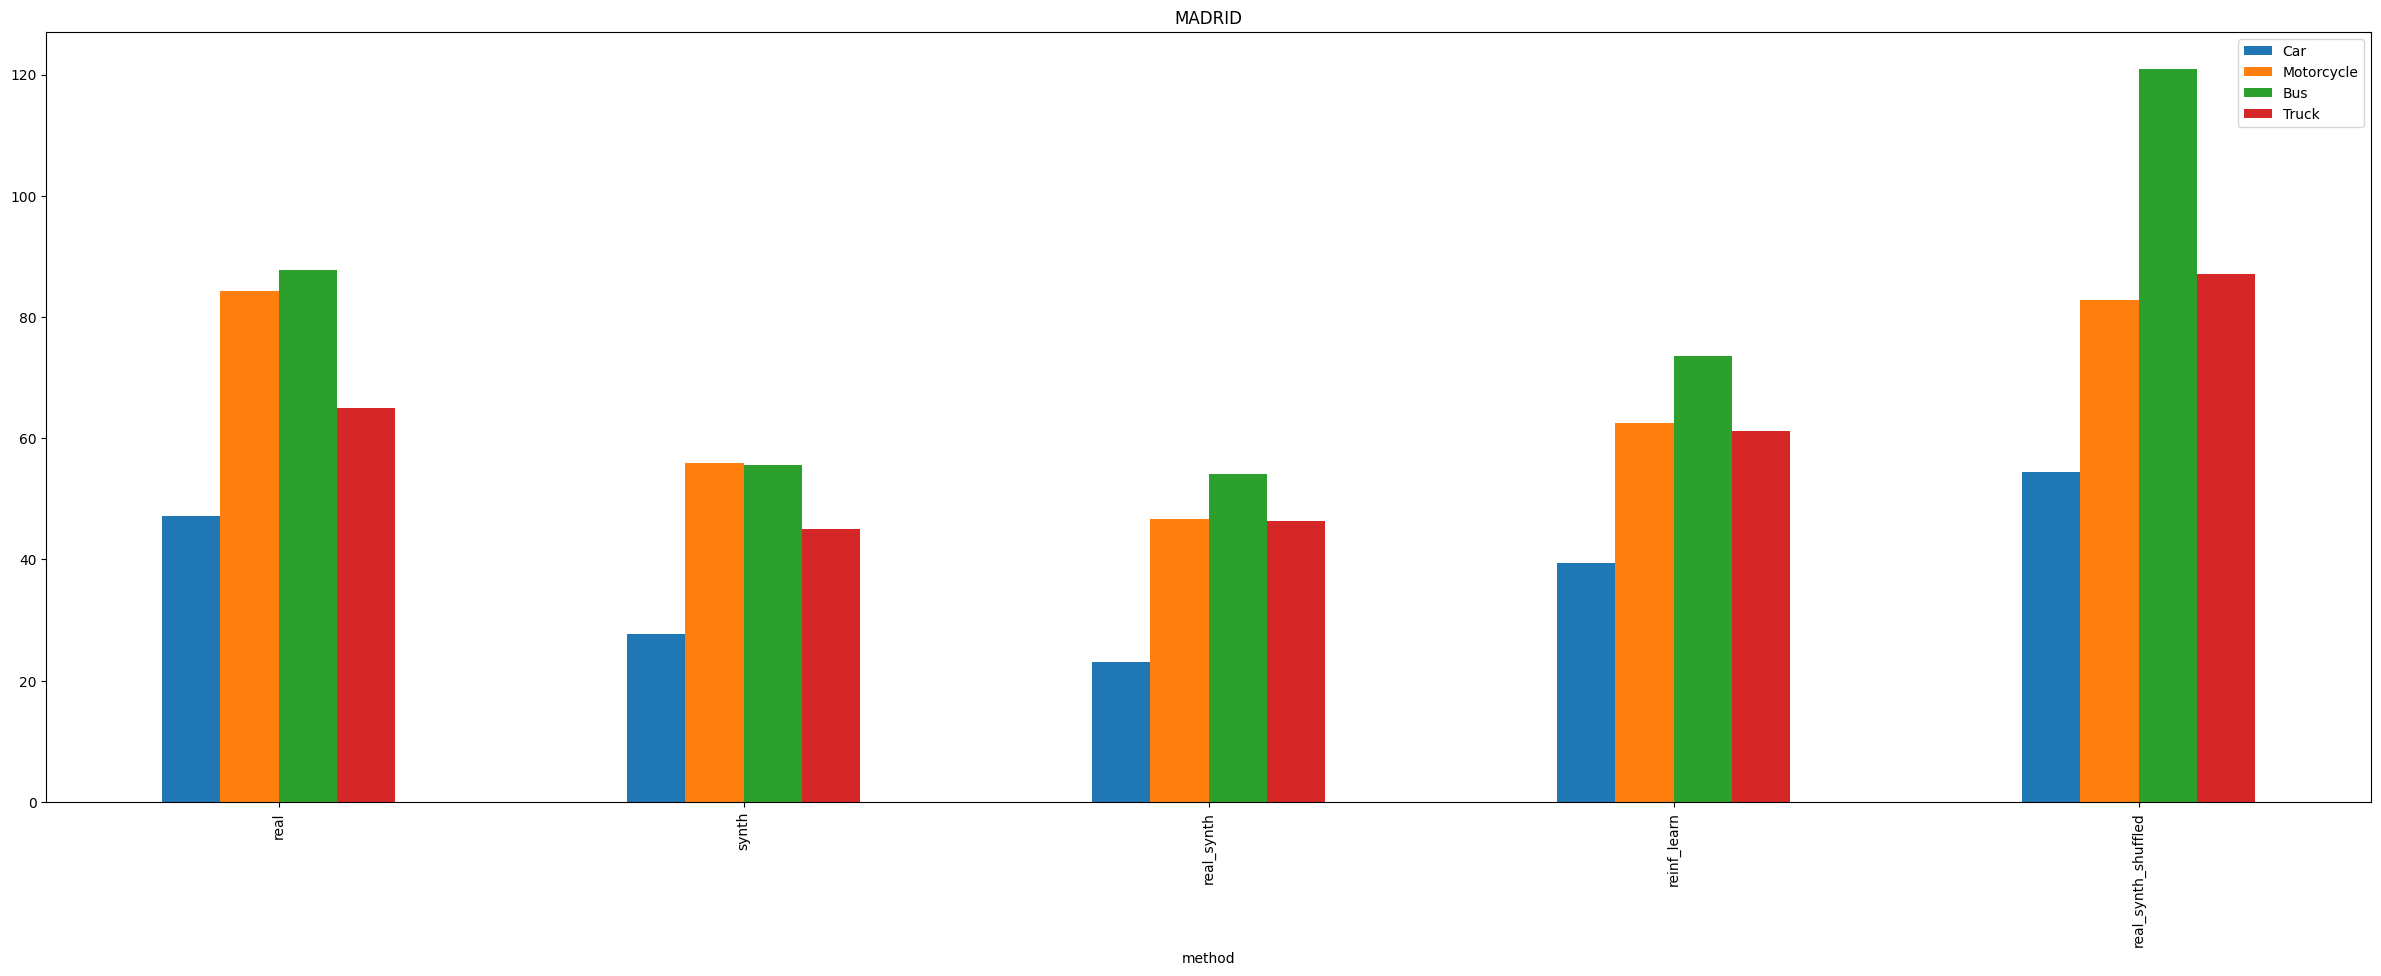

In [8]:
selected_columns = MultiIndex.from_product([
    ['Car', 'Motorcycle', 'Bus', 'Truck'], 
    ['24h'],
    ['MAPE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel([1,2], axis=1)
selected_combined_csv.loc[('BILBAO', 'CNNLSTM')].plot(kind='bar', title='BILBAO', figsize=(30,10))
selected_combined_csv.loc[('MADRID', 'CNNLSTM')].plot(kind='bar', title='MADRID', figsize=(30,10))
selected_combined_csv.xs('CNNLSTM', level='model', drop_level=False)

Benceno
                                          MAE
dataset model   method                       
BILBAO  MLP     real                 0.155215
                synth                0.091591
                real_synth           0.083300
                reinf_learn          0.107216
                real_synth_shuffled  0.165986
        CNN     real                 0.154352
                synth                0.073139
                real_synth           0.106111
                reinf_learn          0.106649
                real_synth_shuffled  0.114809
        LSTM    real                 0.168463
                synth                0.097983
                real_synth           0.100385
                reinf_learn          0.092434
                real_synth_shuffled  0.144214
        CNNLSTM real                 0.141558
                synth                0.068122
                real_synth           0.078154
                reinf_learn          0.089462
                real_synth_shuffled  0.158568
MADRID  MLP     real                      NaN
                synth                     NaN
                real_synth                NaN
                reinf_learn               NaN
                real_synth_shuffled       NaN
        CNN     real                      NaN
                synth                     NaN
                real_synth                NaN
                reinf_learn               NaN
                real_synth_shuffled       NaN
        LSTM    real                      NaN
                synth                     NaN
                real_synth                NaN
                reinf_learn               NaN
                real_synth_shuffled       NaN
        CNNLSTM real                      NaN
                synth                     NaN
                real_synth                NaN
                reinf_learn               NaN
                real_synth_shuffled       NaN

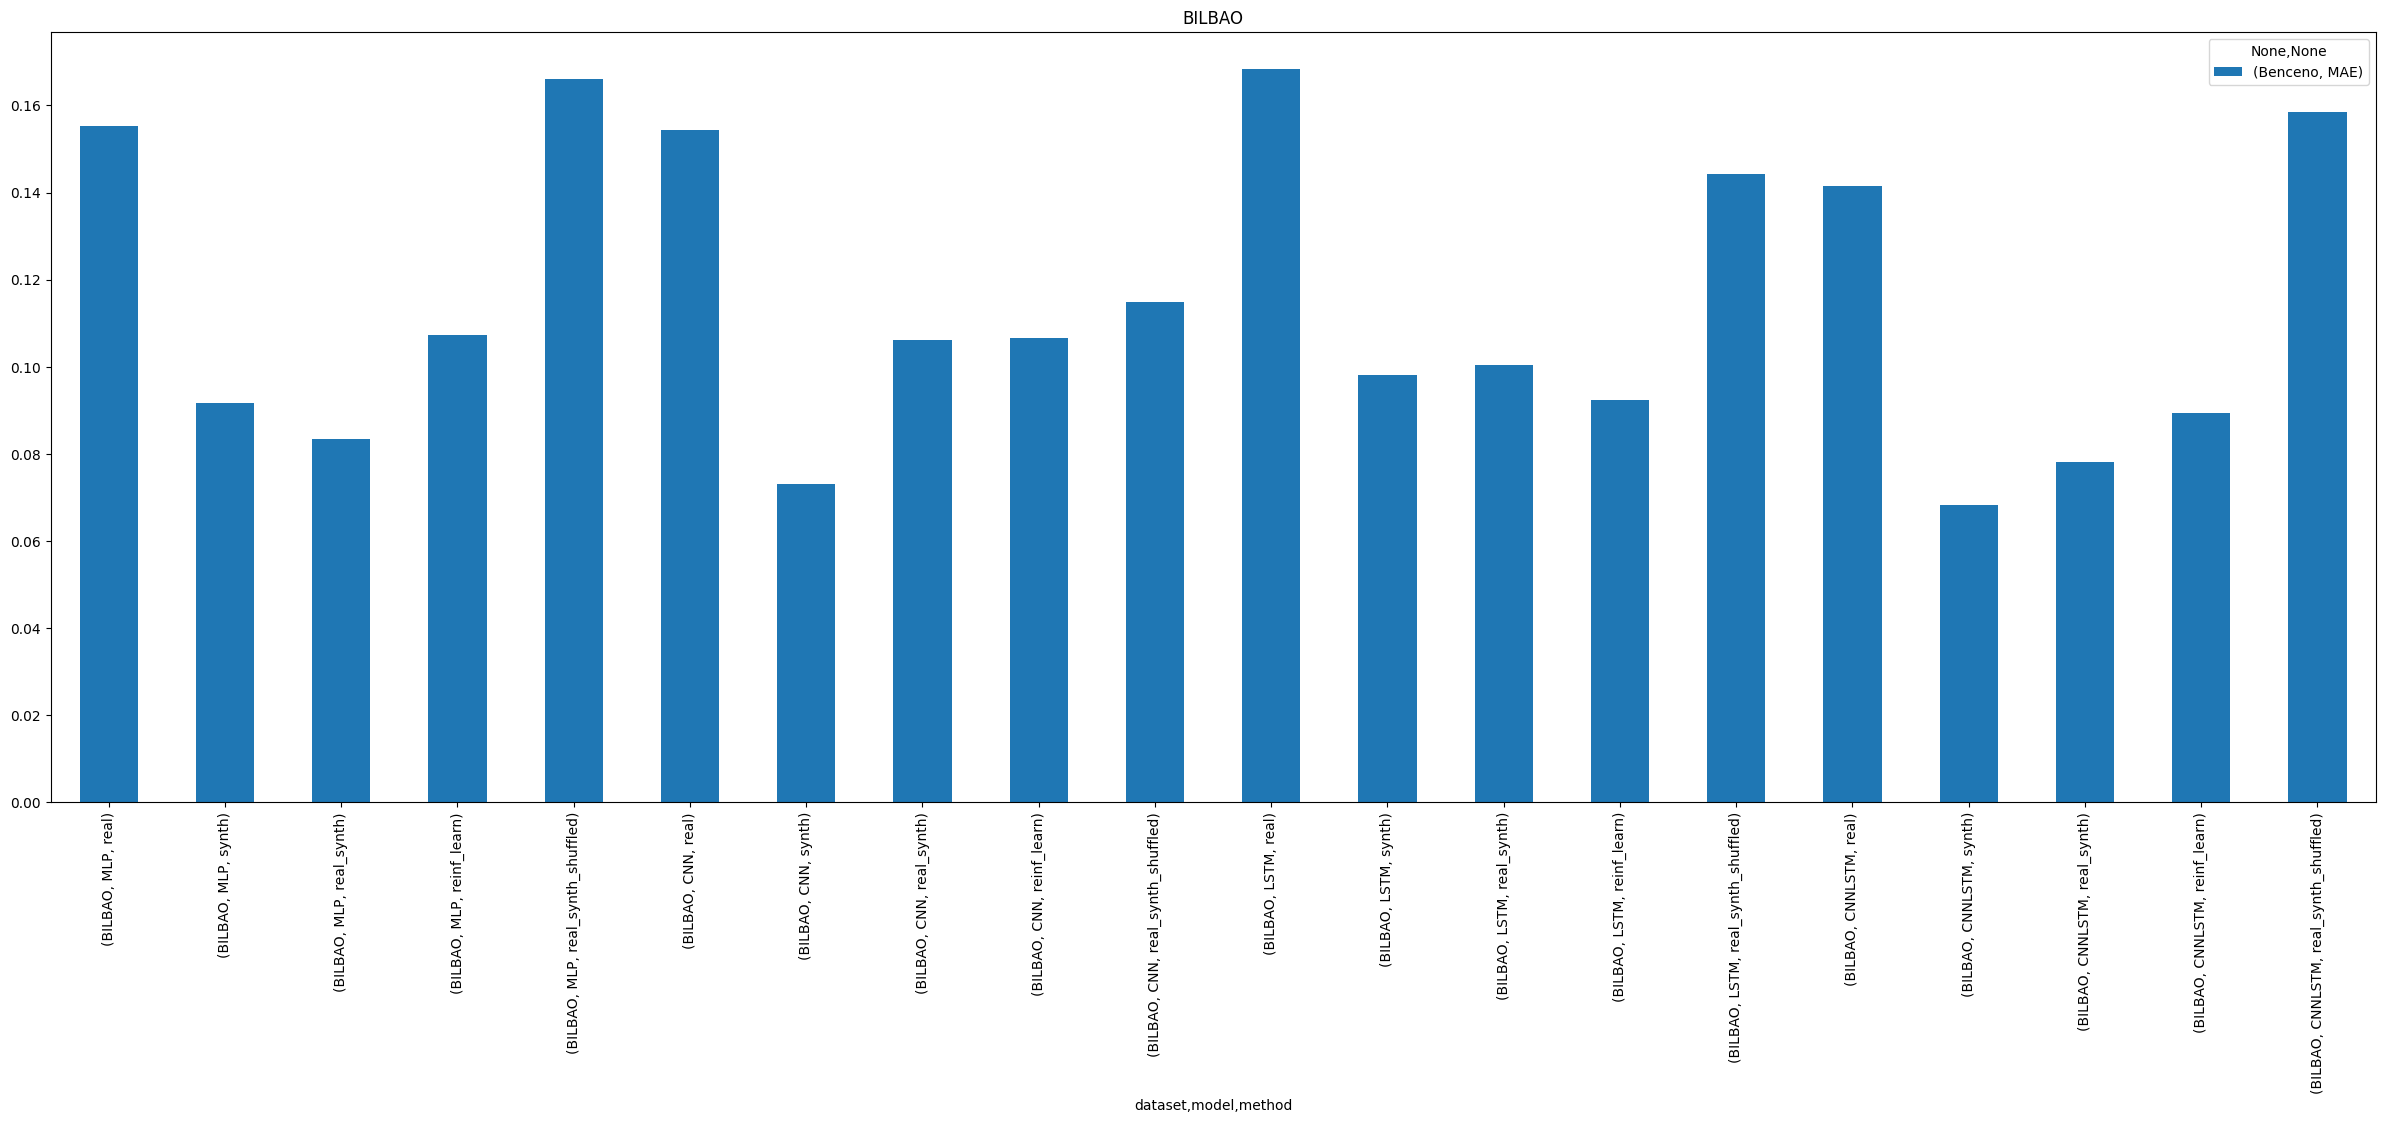

In [9]:
selected_columns = MultiIndex.from_product([
    ['Benceno'], 
    ['24h'],
    ['MAE']
])
selected_combined_csv = combined_csv[selected_columns]
selected_combined_csv = selected_combined_csv.droplevel(1, axis=1)
selected_combined_csv.loc[['BILBAO']].plot(kind='bar', title='BILBAO', figsize=(30,10))
#selected_combined_csv.loc[['MADRID']].plot(kind='bar', title='MADRID', figsize=(30,10))
selected_combined_csv

# Graphs paper #

In [10]:
combined_csv

Benceno                                \
                                          12h                                 
                                           R2      RMSE       MAE       SEM   
dataset model   method                                                        
BILBAO  MLP     real                 0.119775  0.233533  0.200562  2.275201   
                synth                0.009652  0.110274  0.082164  2.075378   
                real_synth           0.136034  0.097900  0.069454  2.053268   
                reinf_learn          0.032840  0.124004  0.094581  2.160645   
                real_synth_shuffled  0.177659  0.230645  0.197252  2.276476   
        CNN     real                 0.027317  0.167782  0.143689  2.280797   
                synth                0.382731  0.086377  0.062588  2.107778   
                real_synth           0.011323  0.111661  0.085780  2.079949   
                reinf_learn          0.196188  0.100066  0.065822  1.927948   
                real_synth_shuffled  0.022203  0.181547  0.156526  2.298785   
        LSTM    real                 0.277903  0.195879  0.173434  2.332913   
                synth                0.015223  0.106205  0.089751  2.294319   
                real_synth           0.094528  0.117314  0.104168  2.363539   
                reinf_learn          0.013569  0.123624  0.104452  2.298097   
                real_synth_shuffled  0.214831  0.178180  0.152302  2.255936   
        CNNLSTM real                 0.005014  0.164727  0.130125  2.169918   
                synth                0.261749  0.088026  0.052217  1.741347   
                real_synth           0.362144  0.087764  0.052000  1.750203   
                reinf_learn          0.181709  0.101141  0.069016  1.993522   
                real_synth_shuffled  0.017876  0.174207  0.145091  2.254495   
MADRID  MLP     real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   
        CNN     real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   
        LSTM    real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   
        CNNLSTM real                      NaN       NaN       NaN       NaN   
                synth                     NaN       NaN       NaN       NaN   
                real_synth                NaN       NaN       NaN       NaN   
                reinf_learn               NaN       NaN       NaN       NaN   
                real_synth_shuffled       NaN       NaN       NaN       NaN   

                                                                     \
                                                                      
                                          AEM    AICBIC        MAPE   
dataset model   method                                                
BILBAO  MLP     real                 6.418331 -0.423954  164.558002   
                synth                5.374785 -1.924672   38.636827   
                real_synth           5.356608 -2.162702   40.718820   
                reinf_learn          5.874071 -1.689973   70.616

In [11]:
# # Identificar las columnas con al menos un valor NaN
# cols_with_nan = combined_csv.columns[combined_csv.isna().any()].tolist()
# # Mostrar las columnas que serán eliminadas
# print("Columnas que serán eliminadas:", cols_with_nan)
# # Eliminar las columnas con al menos un valor NaN
# combined_csv_cleaned = combined_csv.dropna(axis=1)
# # Mostrar el DataFrame resultante
# print("\nDataFrame después de eliminar columnas con NaN:")
# combined_csv_cleaned

combined_csv_cleaned = combined_csv.copy()

In [12]:
selected_rows_cleaned = [('BILBAO')]
exclude_vars = ['Car', 'Motorcycle', 'Bus', 'Truck', 'CO 8h', 'O3 8h']

selected_columns_cleaned = MultiIndex.from_product([
    list(set([col[0] for col in combined_csv_cleaned.columns if col[0] not in exclude_vars])), 
    ['24h'],
    ['RMSE', 'MAE', 'MAPE', 'CVRMSE']
])
selected_combined_csv_cleaned = combined_csv_cleaned.loc[selected_rows_cleaned][selected_columns_cleaned]
selected_combined_csv_cleaned = selected_combined_csv_cleaned.droplevel([0], axis=0)
selected_combined_csv_cleaned = selected_combined_csv_cleaned.droplevel([1], axis=1)
#selected_combined_csv_cleaned.loc[('BILBAO', 'CNNLSTM')].plot(kind='bar', title='BILBAO', logy=True, figsize=(30,10))
#selected_combined_csv_cleaned.loc[('MADRID', 'CNNLSTM')].plot(kind='bar', title='MADRID', logy=True, figsize=(30,10))
#selected_combined_csv_cleaned.xs('CNNLSTM', level='model', drop_level=False)
selected_combined_csv_cleaned.columns = selected_combined_csv_cleaned.columns.set_names(['Variable', 'Metric'])
selected_combined_csv_cleaned.index = selected_combined_csv_cleaned.index.set_names(['Model', 'Method'])
selected_combined_csv_cleaned = selected_combined_csv_cleaned.rename(
    index={
        'real': 'Real',
        'synth': 'Synth',
        'real_synth': 'SynthReal',
        'reinf_learn': 'FineTuning',
        'real_synth_shuffled': 'Shuffled'
    }, 
    columns={
        'SO2': 'SO2',
        'Ortoxileno': 'Orthoxylene',
        'CO': 'CO',
        'O3': 'O3',
        'SpeedWind': 'WindSpeed',
        'Etilbenceno': 'Ethylbenzene',
        'NO': 'NO',
        'NO2': 'NO2',
        'Benceno': 'Benzene',
        'Precip': 'Rainfall',
        'DirecWind': 'WindDirection',
        'Tolueno': 'Toluene',
        'PM10': 'PM10',
        'Temp': 'Temperature',
        'NOX': 'NOX',
        'PM2.5': 'PM2.5',
        'Humid': 'Humidity'
    })
# Orden personalizado para el segundo nivel
custom_order = ['RMSE', 'MAE', 'MAPE', 'CVRMSE']
# Crear un DataFrame temporal con las columnas como DataFrame
cols = pd.DataFrame(selected_combined_csv_cleaned.columns.tolist(), columns=['Variable', 'Metric'])
# Aplicar el orden personalizado al segundo nivel
cols['Metric'] = pd.Categorical(cols['Metric'], categories=custom_order, ordered=True)
# Ordenar por el primer nivel y luego por el segundo nivel
sorted_cols = cols.sort_values(by=['Variable', 'Metric'])
# Reconstruir el MultiIndex ordenado
sorted_multiindex = pd.MultiIndex.from_frame(sorted_cols)
# Reordenar el DataFrame según el nuevo MultiIndex
selected_combined_csv_cleaned = selected_combined_csv_cleaned[sorted_multiindex]

selected_combined_csv_cleaned

Variable             Benzene                                            CO  \
Metric                  RMSE       MAE        MAPE      CVRMSE        RMSE   
Model   Method                                                               
MLP     Real        0.189526  0.155215  178.164959  161.872707  114.797851   
        Synth       0.110113  0.091591   97.635511   94.046739   33.491602   
        SynthReal   0.100803  0.083300   99.790580   86.094692   24.903005   
        FineTuning  0.126045  0.107216  138.731338  107.653667   28.882791   
        Shuffled    0.203240  0.165986  137.644467  173.585504  107.112171   
CNN     Real        0.181970  0.154352  225.596160  155.418987  254.094535   
        Synth       0.091144  0.073139   88.331517   77.845143   46.245631   
        SynthReal   0.122488  0.106111  131.165049  104.616177   56.986178   
        FineTuning  0.133667  0.106649  143.390454  114.164342   47.267673   
        Shuffled    0.141469  0.114809  131.382291  120.827729   60.261404   
LSTM    Real        0.195510  0.168463  193.966657  166.983696   39.110547   
        Synth       0.112197  0.097983  116.446846   95.826963   20.822073   
        SynthReal   0.112647  0.100385  115.087343   96.211077   34.776908   
        FineTuning  0.110680  0.092434  101.203672   94.530812   25.857965   
        Shuffled    0.164234  0.144214  185.352764  140.271183   70.519941   
CNNLSTM Real        0.166832  0.141558  185.476196  142.489865  106.852244   
        Synth       0.092310  0.068122   67.466853   78.841271   28.668565   
        SynthReal   0.100318  0.078154   92.392634   85.680470   20.491529   
        FineTuning  0.109044  0.089462  113.282451   93.134064   22.312969   
        Shuffled    0.177885  0.158568  231.103509  151.929926   89.066154   

Variable                                                   Ethylbenzene  \
Metric                     MAE          MAPE        CVRMSE         RMSE   
Model   Method                                                            
MLP     Real         96.209487  28694.439291  33194.559454     0.221239   
        Synth        25.862878   7833.873873   9684.318682     0.154131   
        SynthReal    21.329952   6381.120211   7200.868969     0.132133   
        FineTuning   23.166053   6925.640552   8351.650282     0.134342   
        Shuffled     88.301677  24603.550895  30972.194079     0.257111   
CNN     Real        212.830987  69985.084485  73473.118555     0.121446   
        Synth        38.206553  12112.223440  13372.230642     0.133887   
        SynthReal    43.962403  13571.883988  16477.931118     0.148475   
        FineTuning   37.131292  11197.492982  13667.760944     0.146192   
        Shuffled     47.207473  13353.035604  17424.984247     0.147784   
LSTM    Real         28.216511   9008.254739  11309.073923     0.222250   
        Synth        13.276040   4325.740538   6020.840499     0.151841   
        SynthReal    22.192139   7509.350691  10055.973334     0.137057   
        FineTuning   20.062540   6158.805470   7477.001893     0.163755   
        Shuffled     61.420937  18901.144091  20391.308139     0.219242   
CNNLSTM Real         88.613677  27417.034484  30897.034462     0.216604   
        Synth        21.928346   6638.088105   8289.705599     0.145890   
        SynthReal    16.097384   4742.678198   5925.261333     0.137823   
        FineTuning   19.068269   5752.121714   6451.942981     0.128104   
        Shuffled     71.588177  23732.634698  25754.068529     0.194266   

Variable                      ...     Toluene            WindDirection  \
Metric                   MAE  ...        MAPE     CVRMSE          RMSE   
Model   Method                ...                                        
MLP     Real        0.178649  ...   59.740796  44.179703     80.932269   
        Synth       0.114951  ...   44.343516  47.214827     63.068974   
        SynthReal   0.096058  ...   38.619928  43.005761     60.524095   
        FineTuning  0.105278  ...  

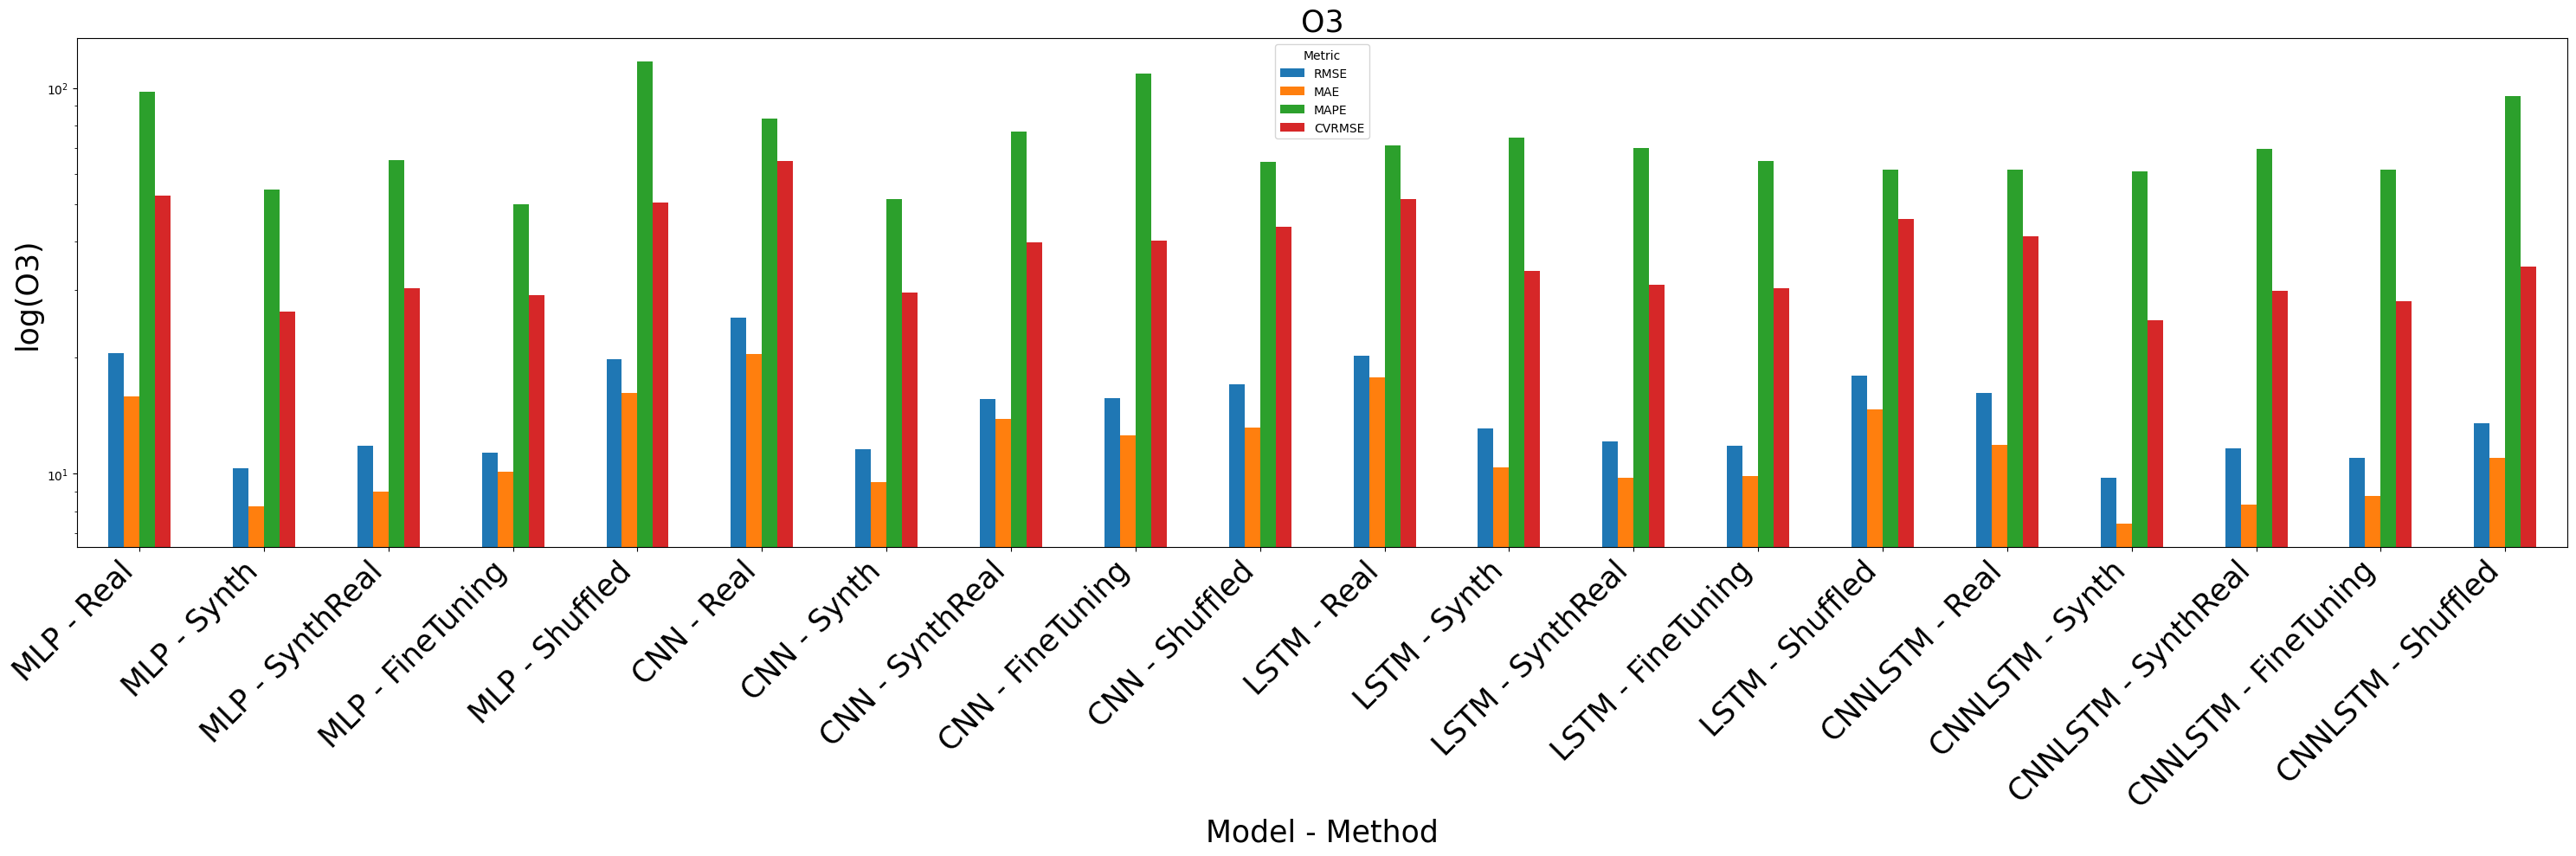

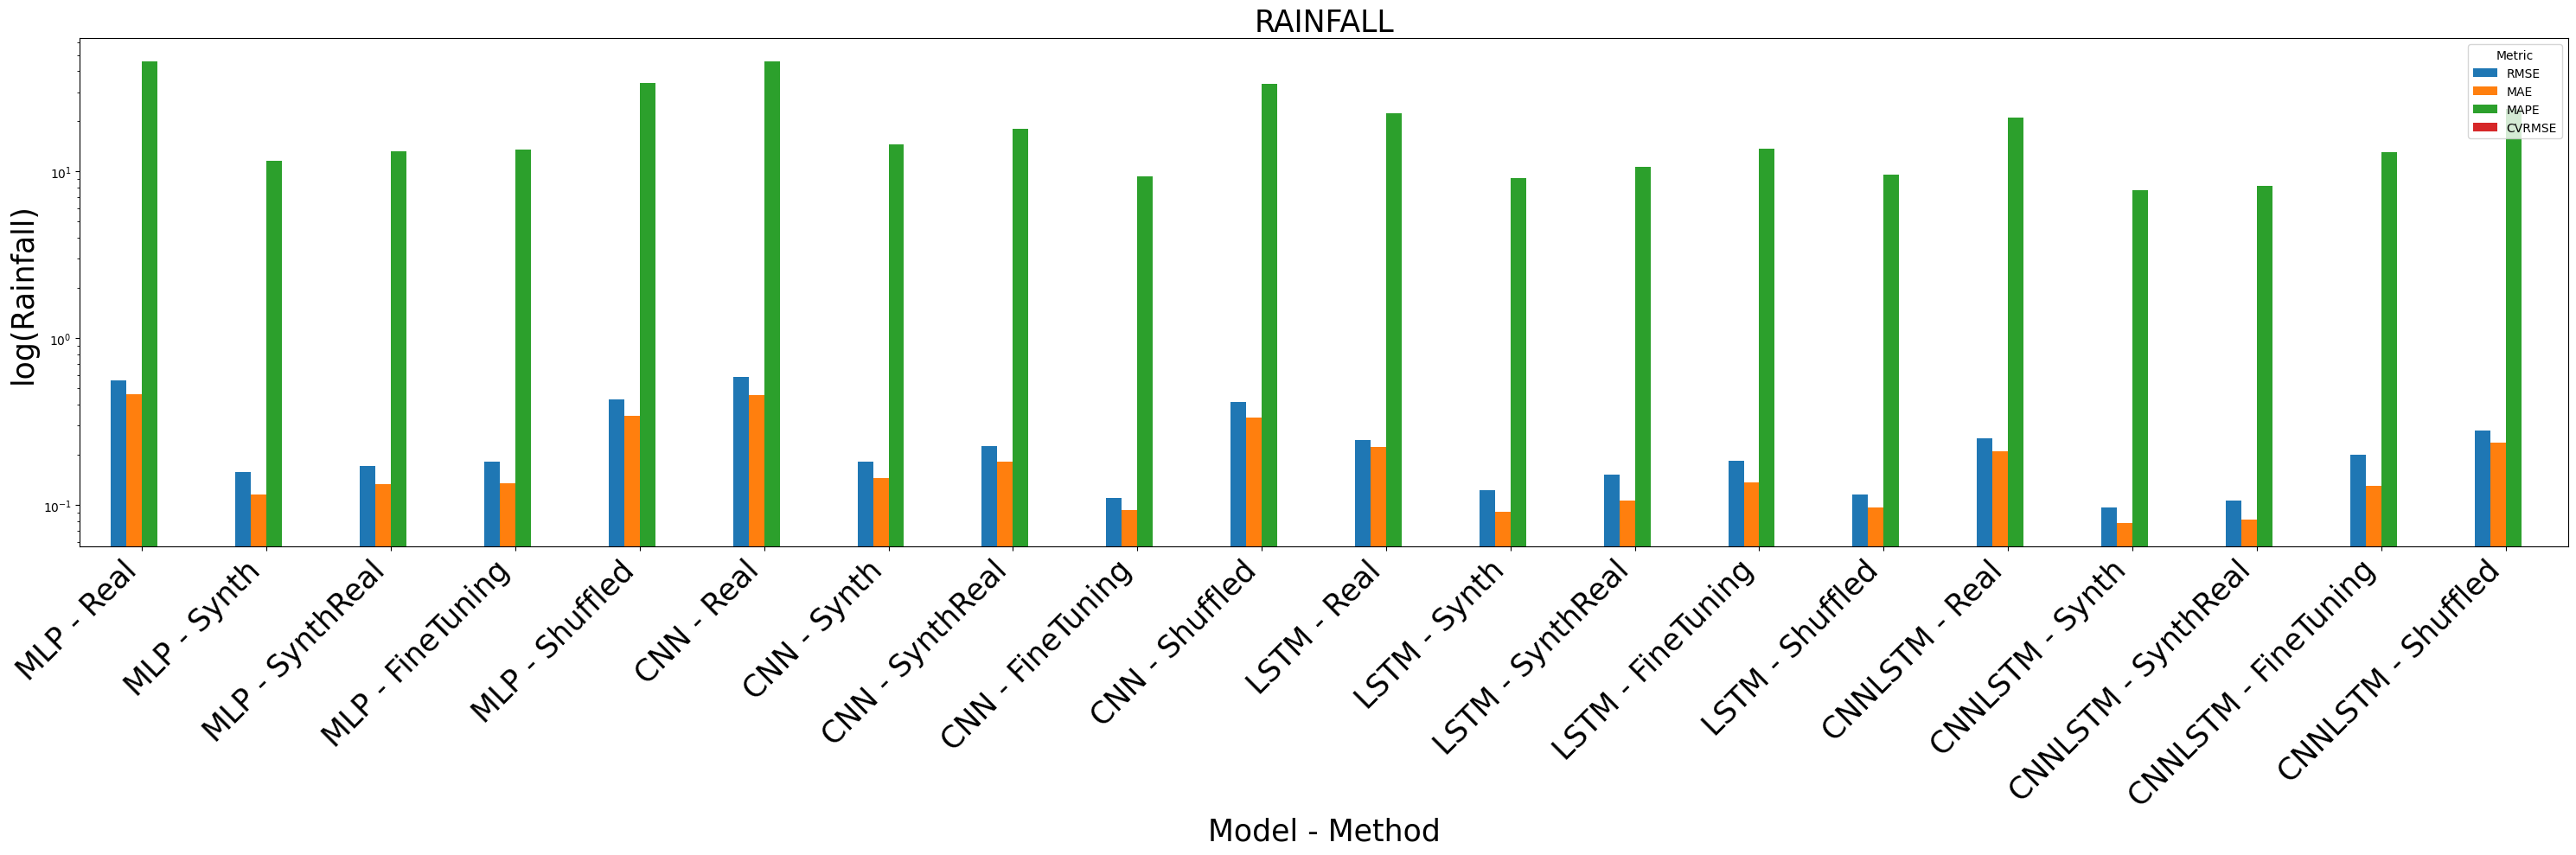

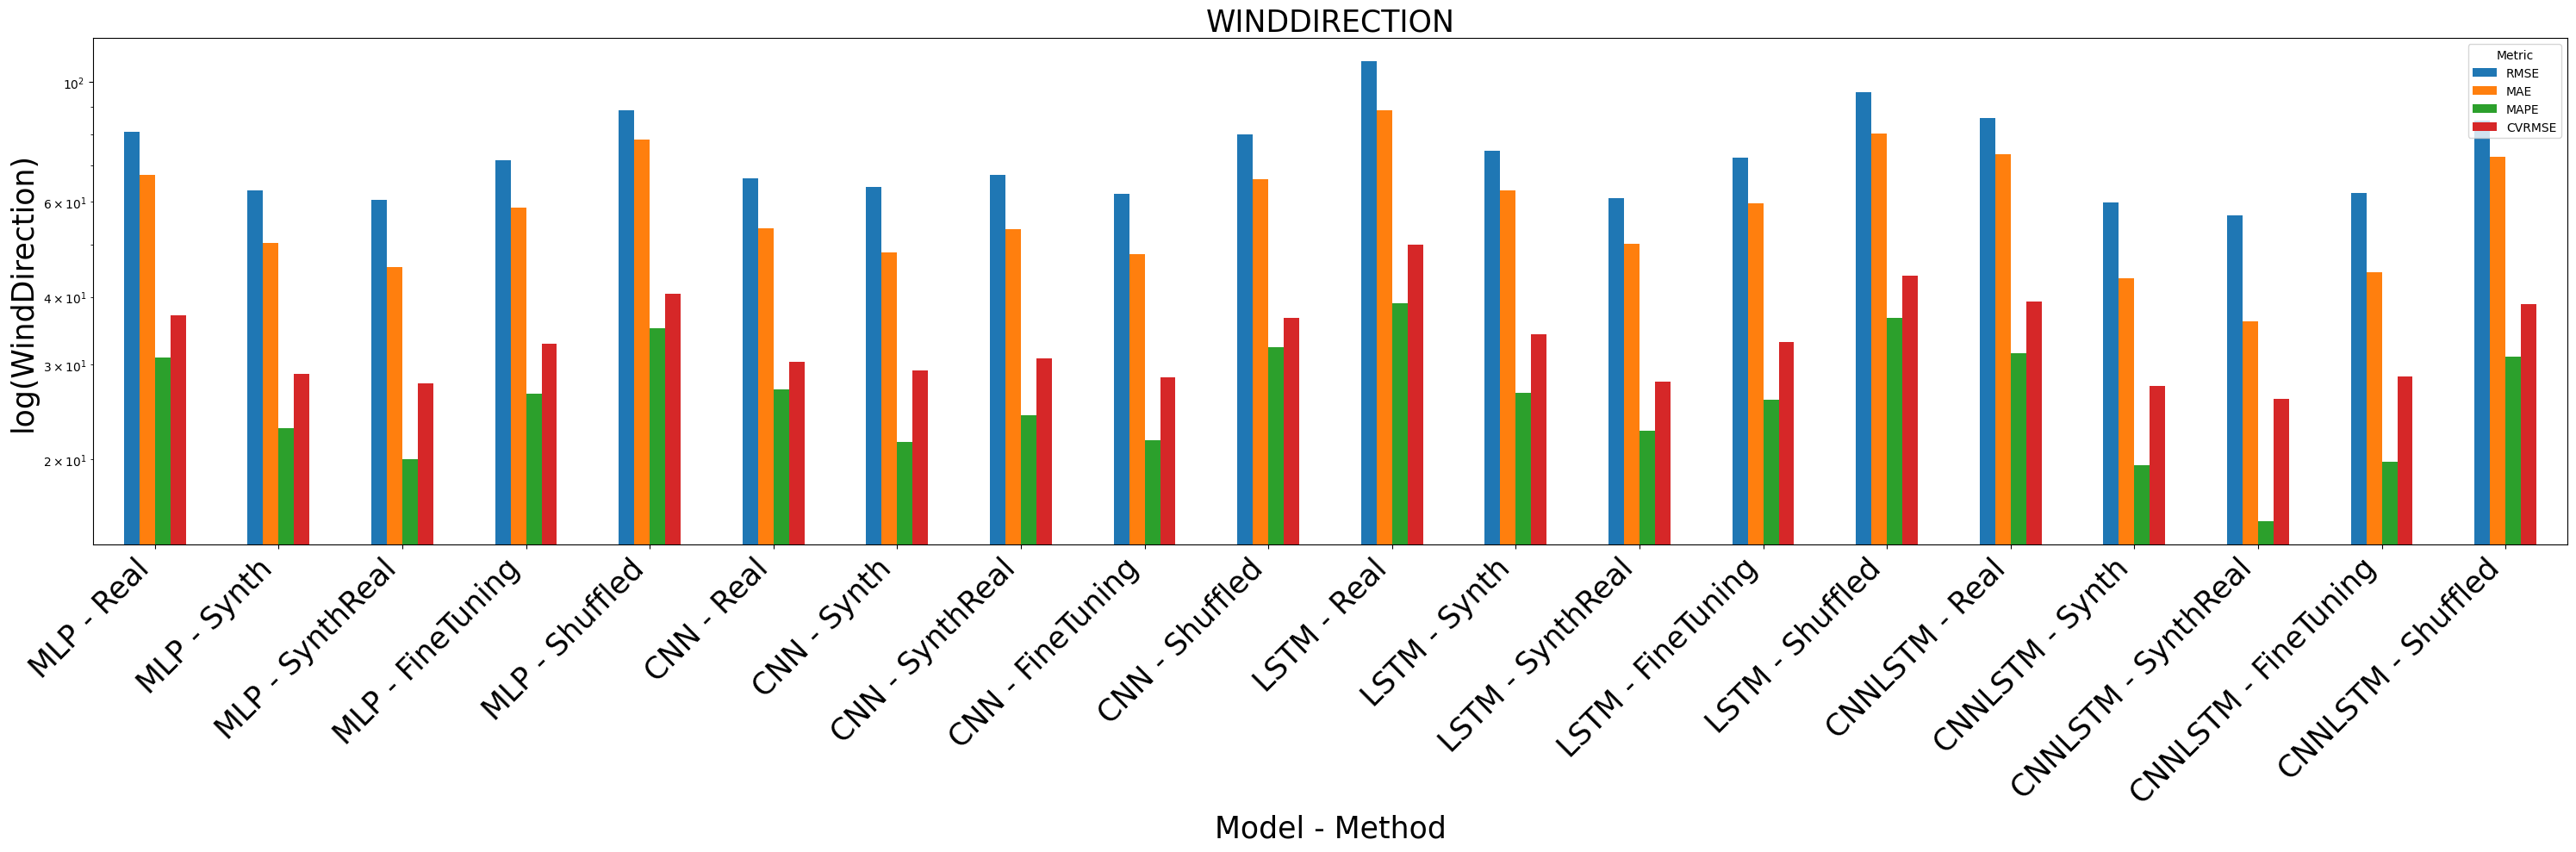

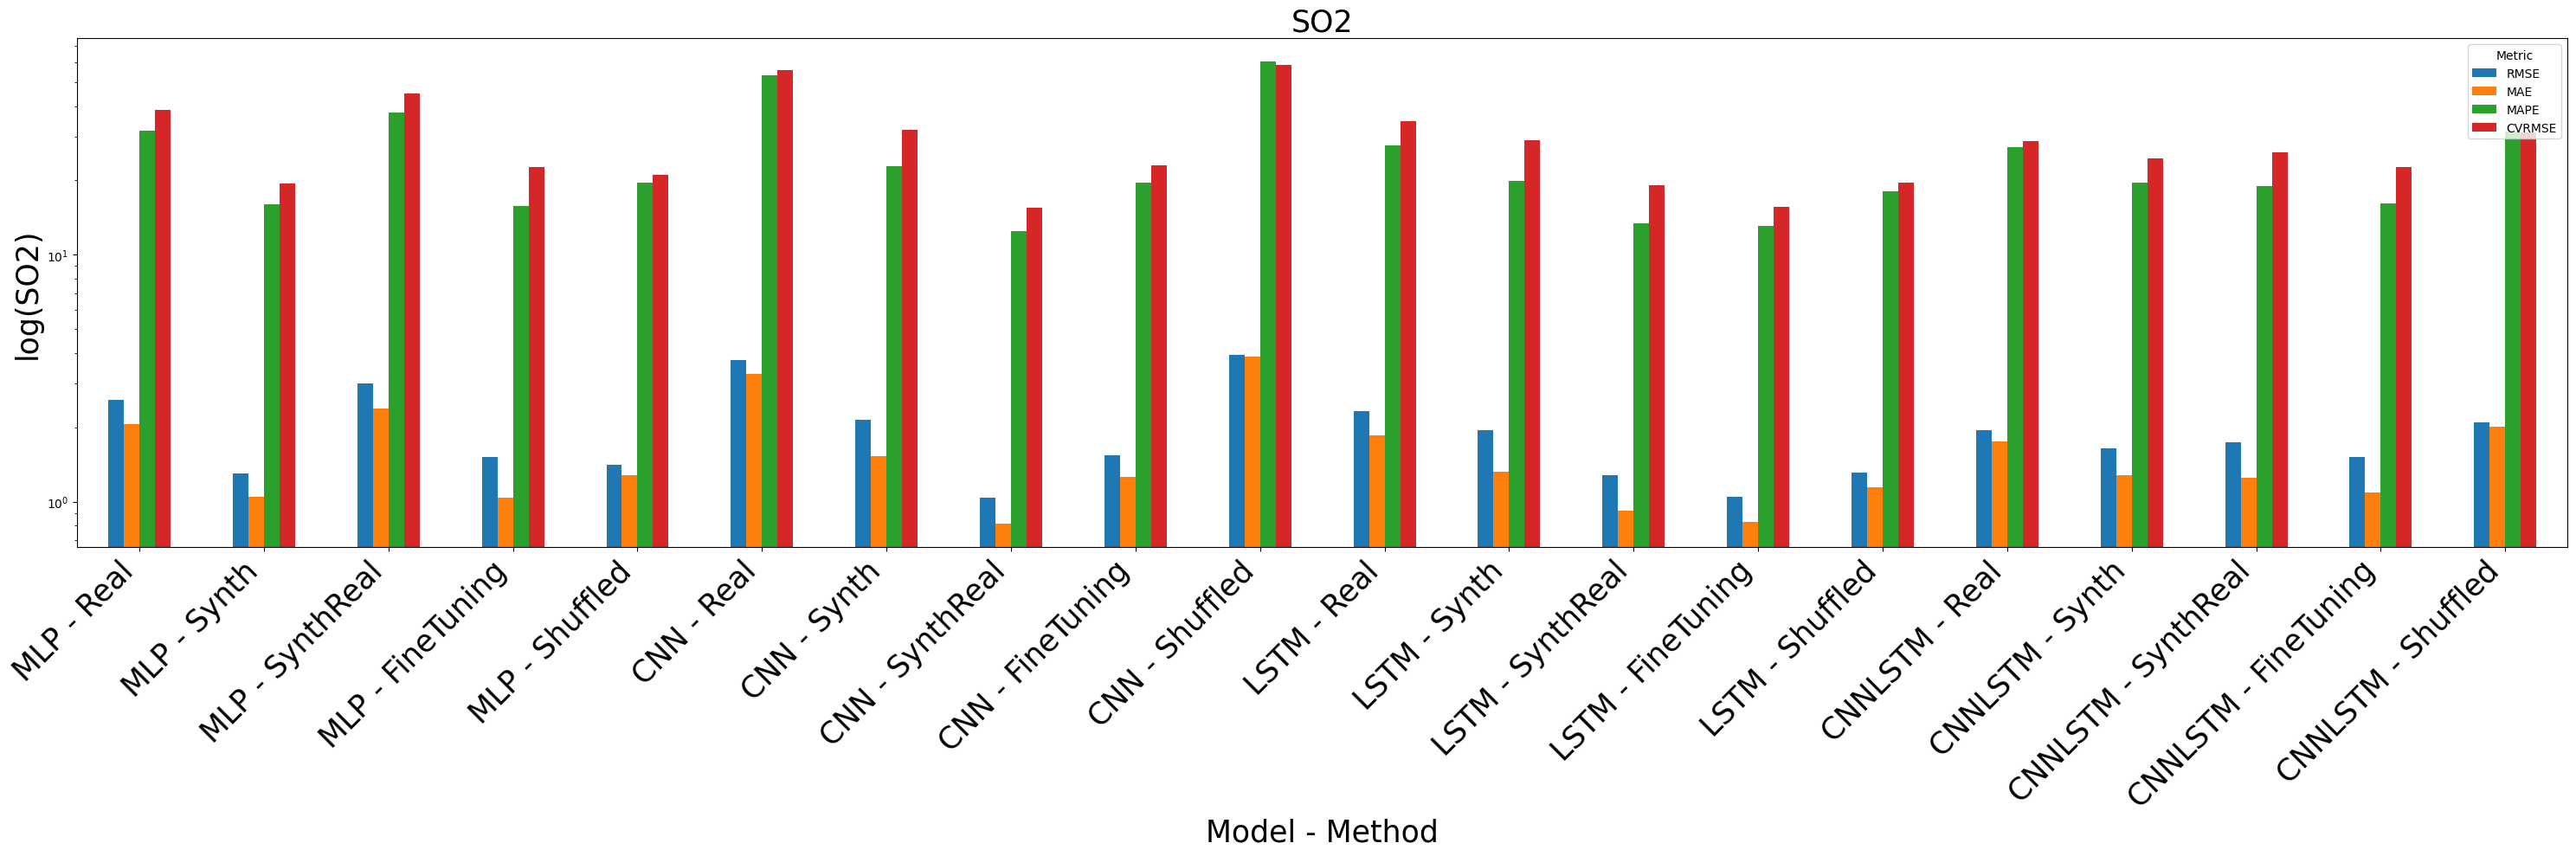

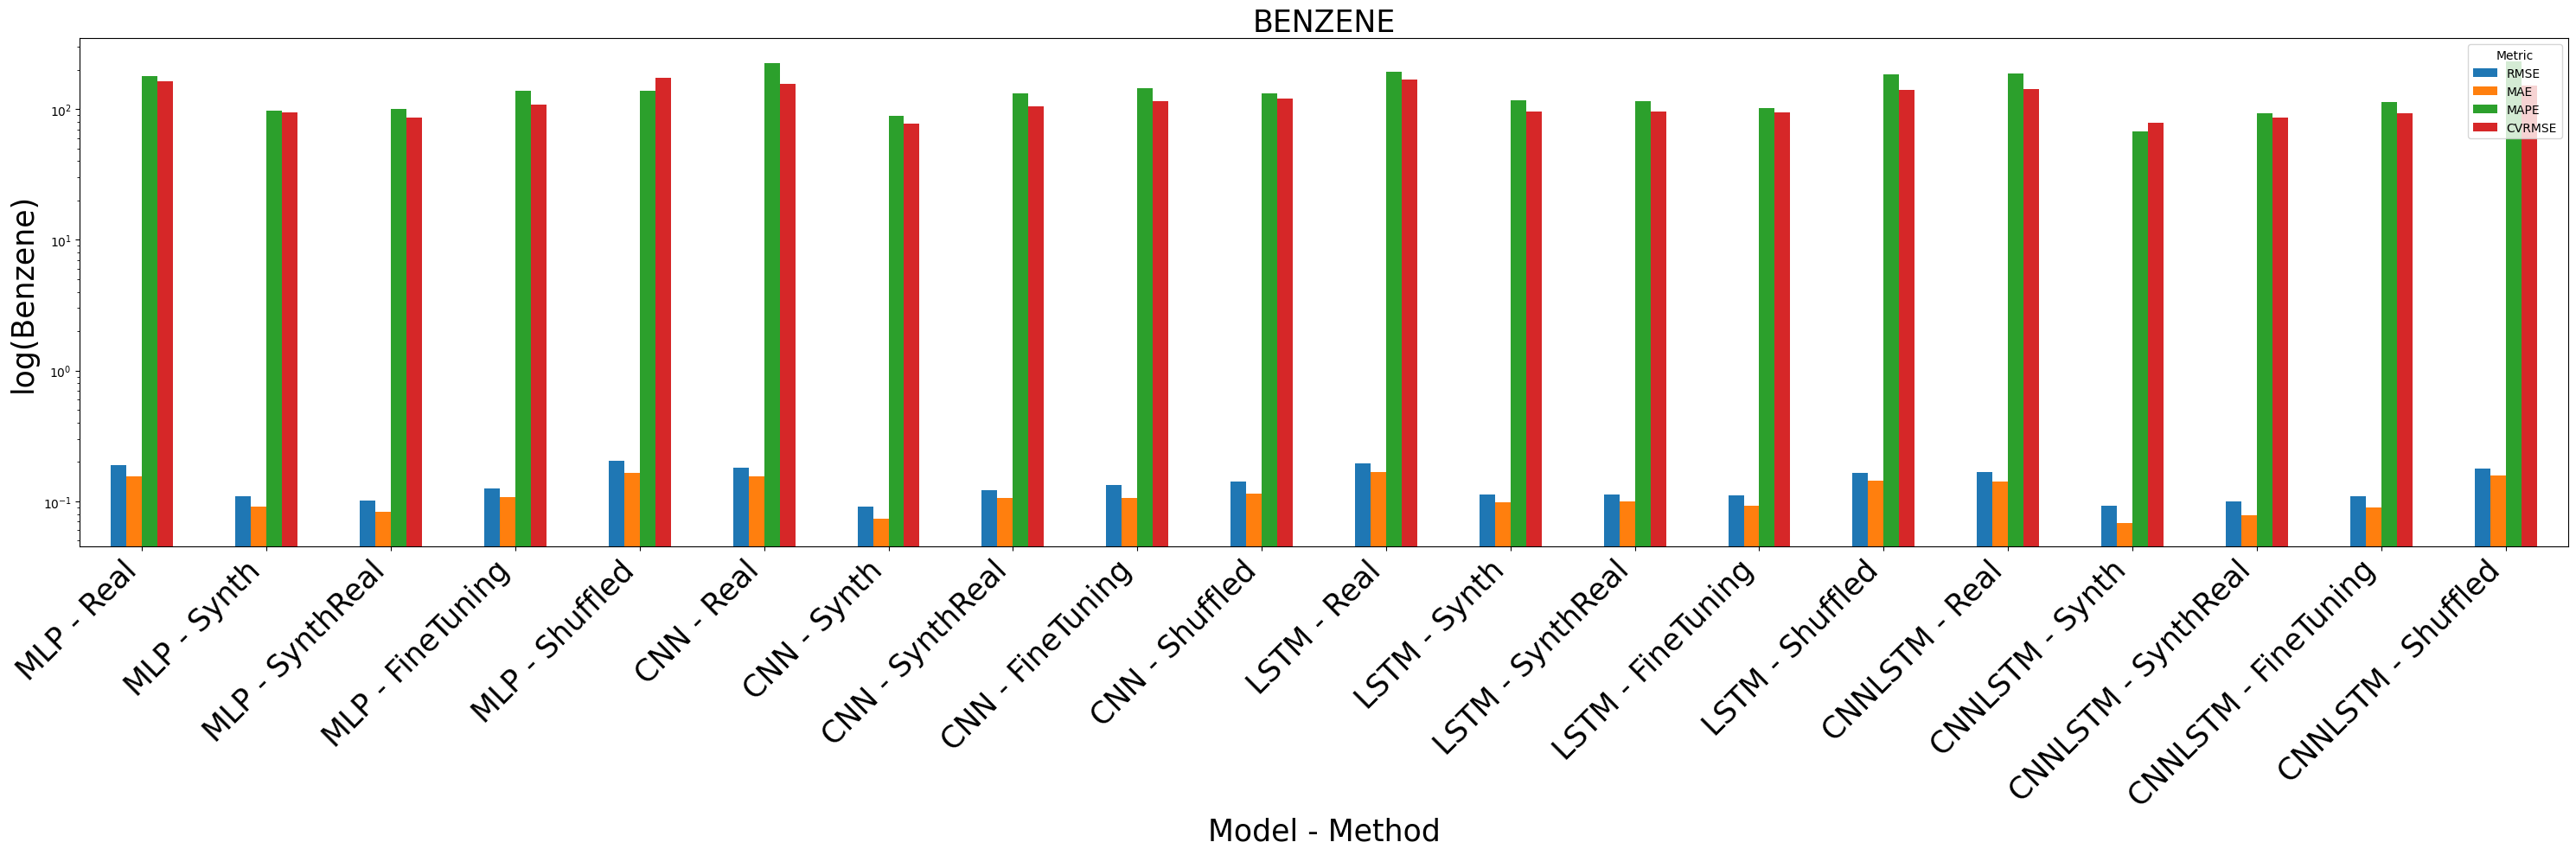

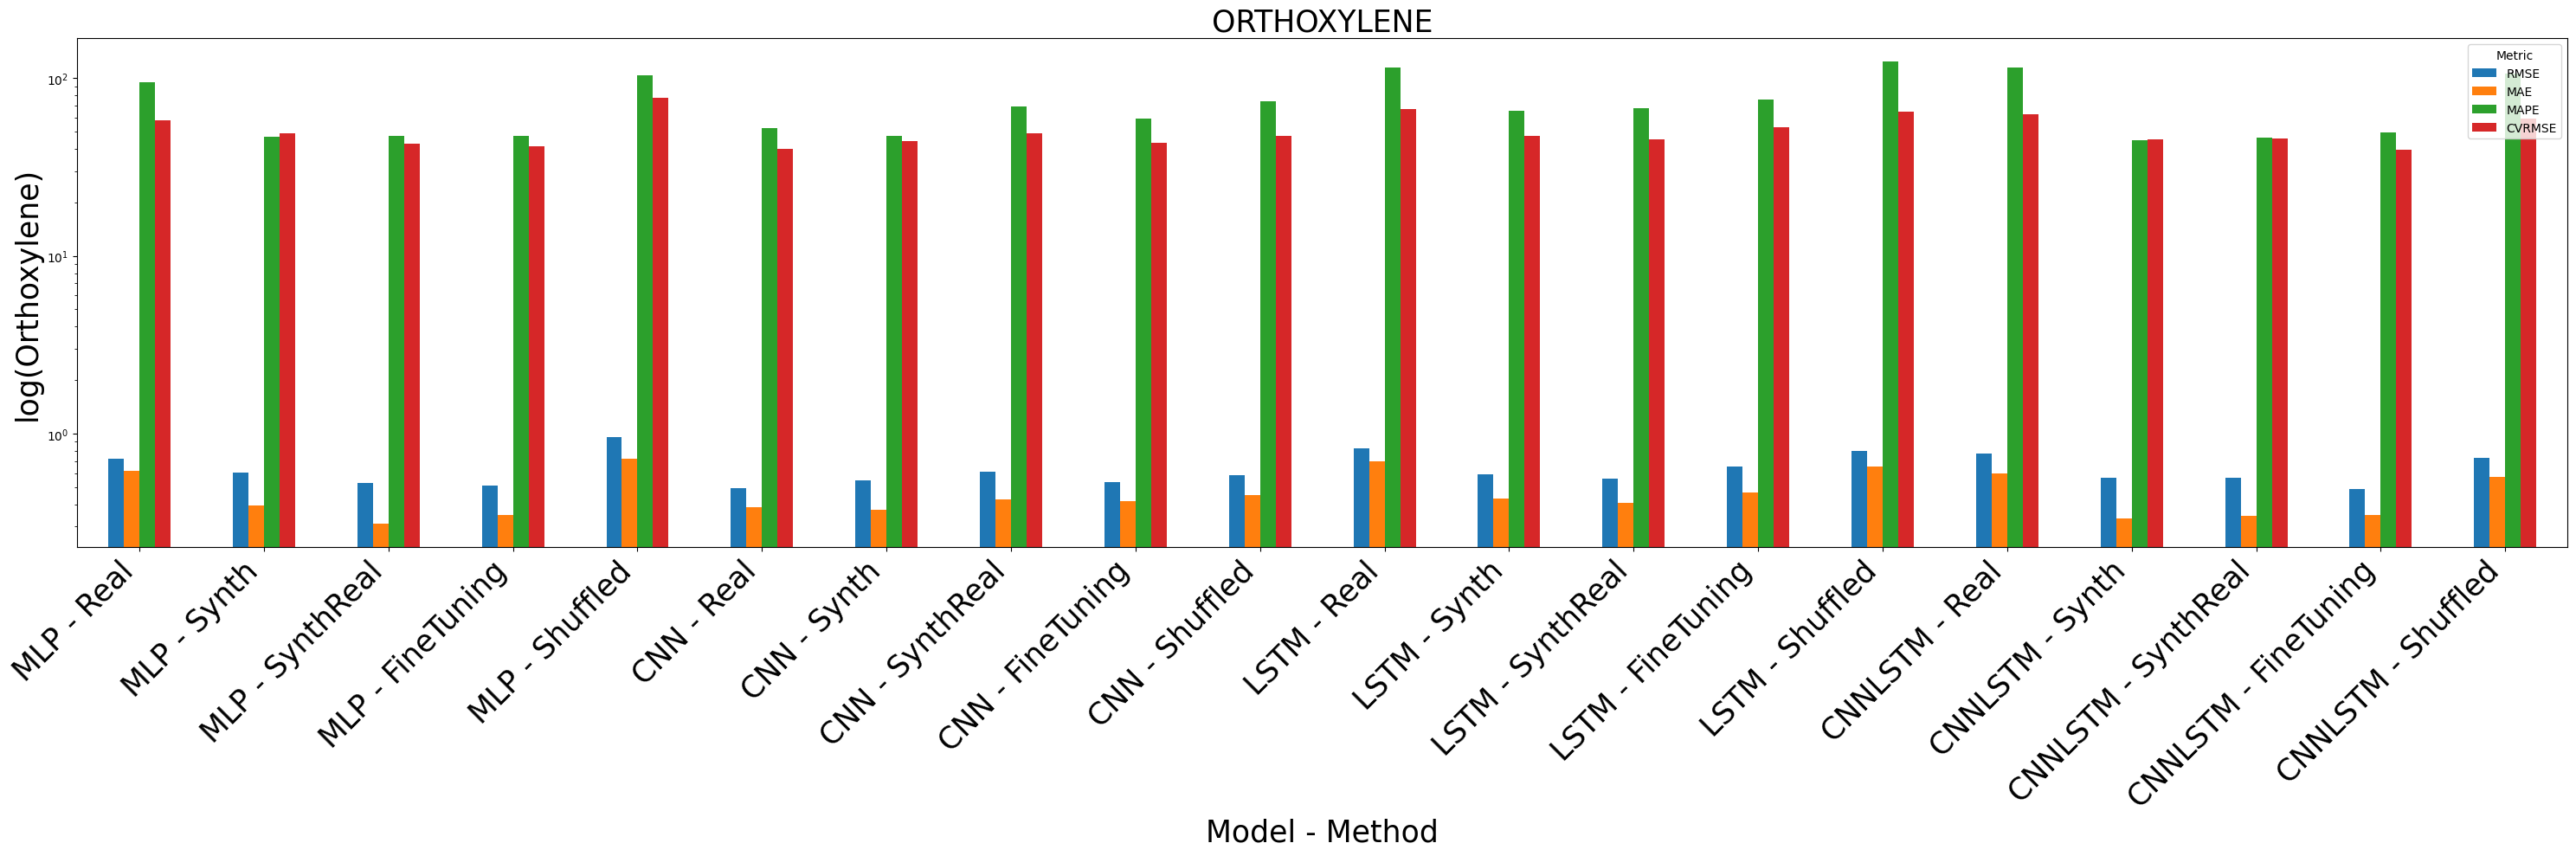

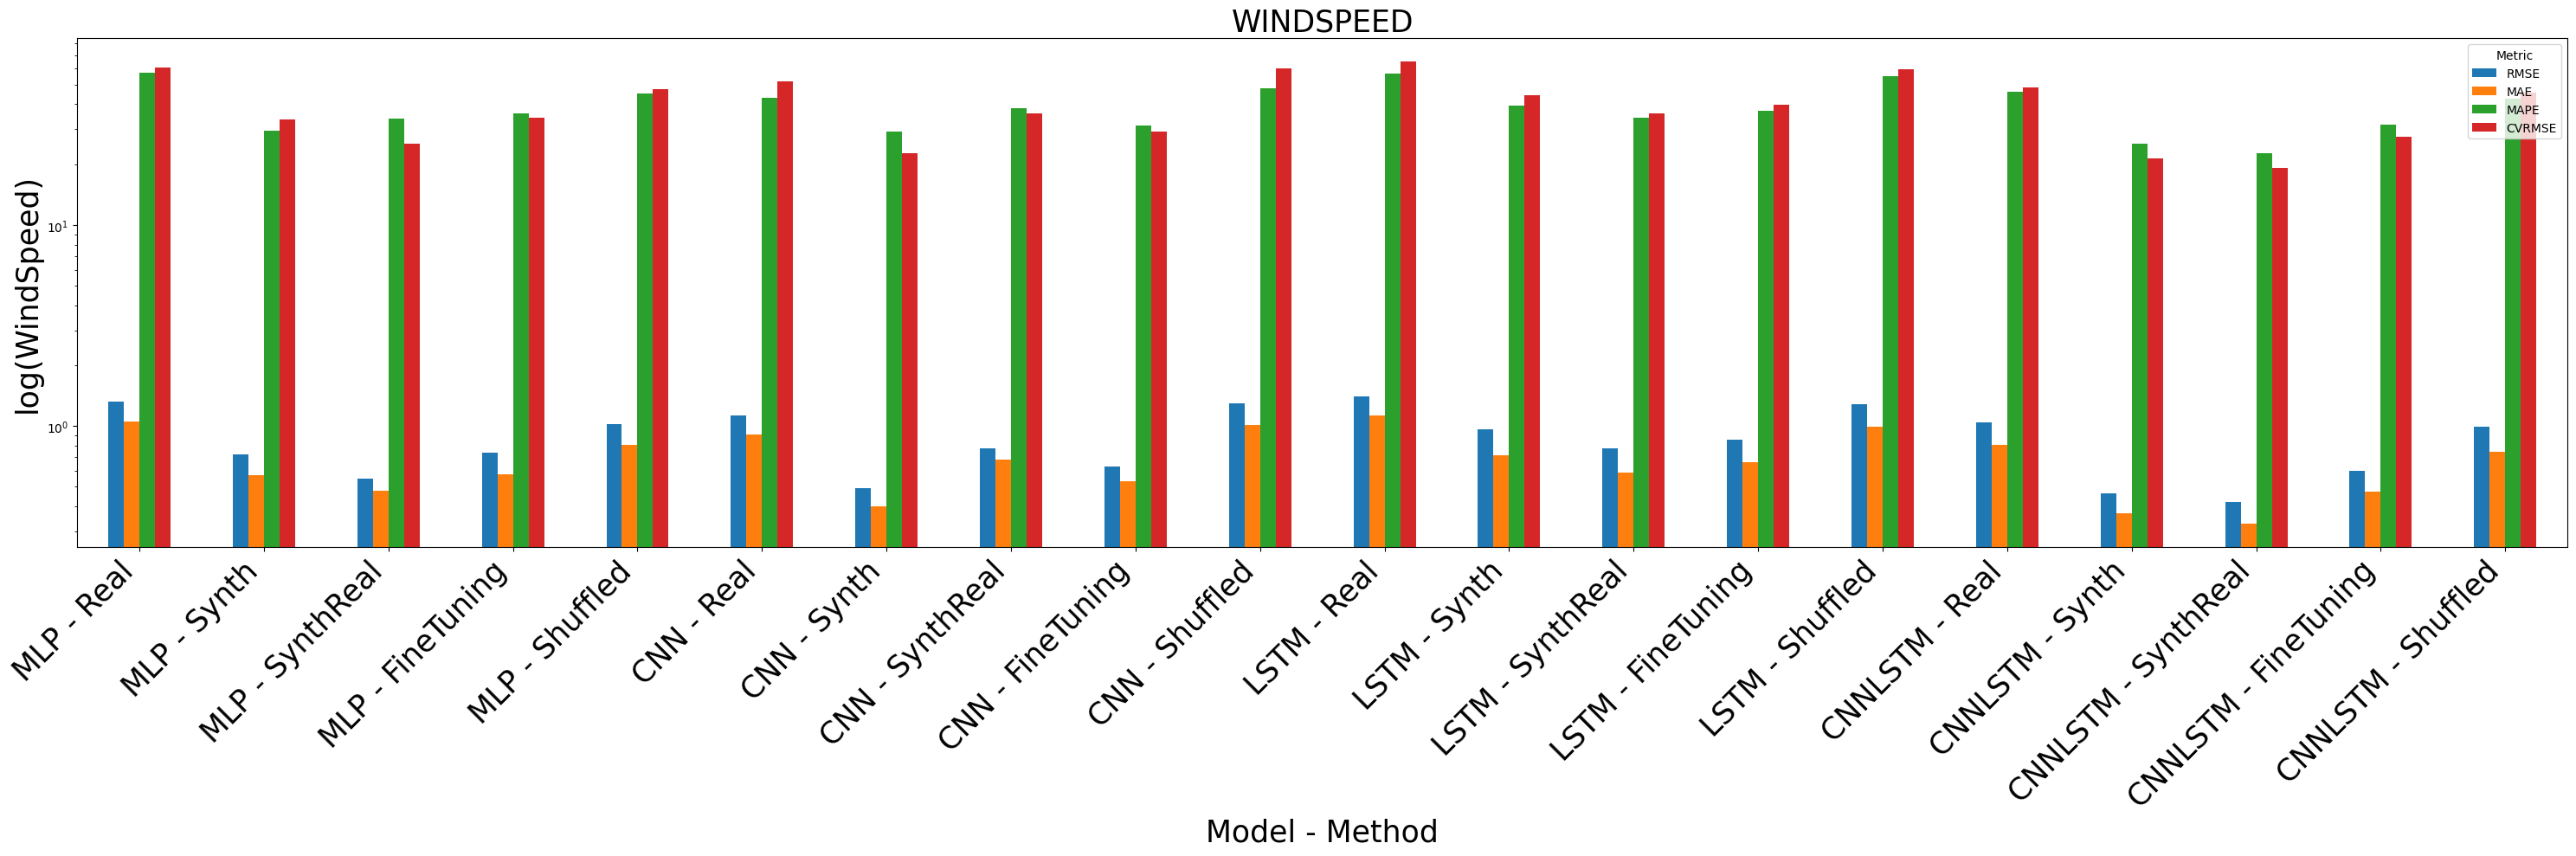

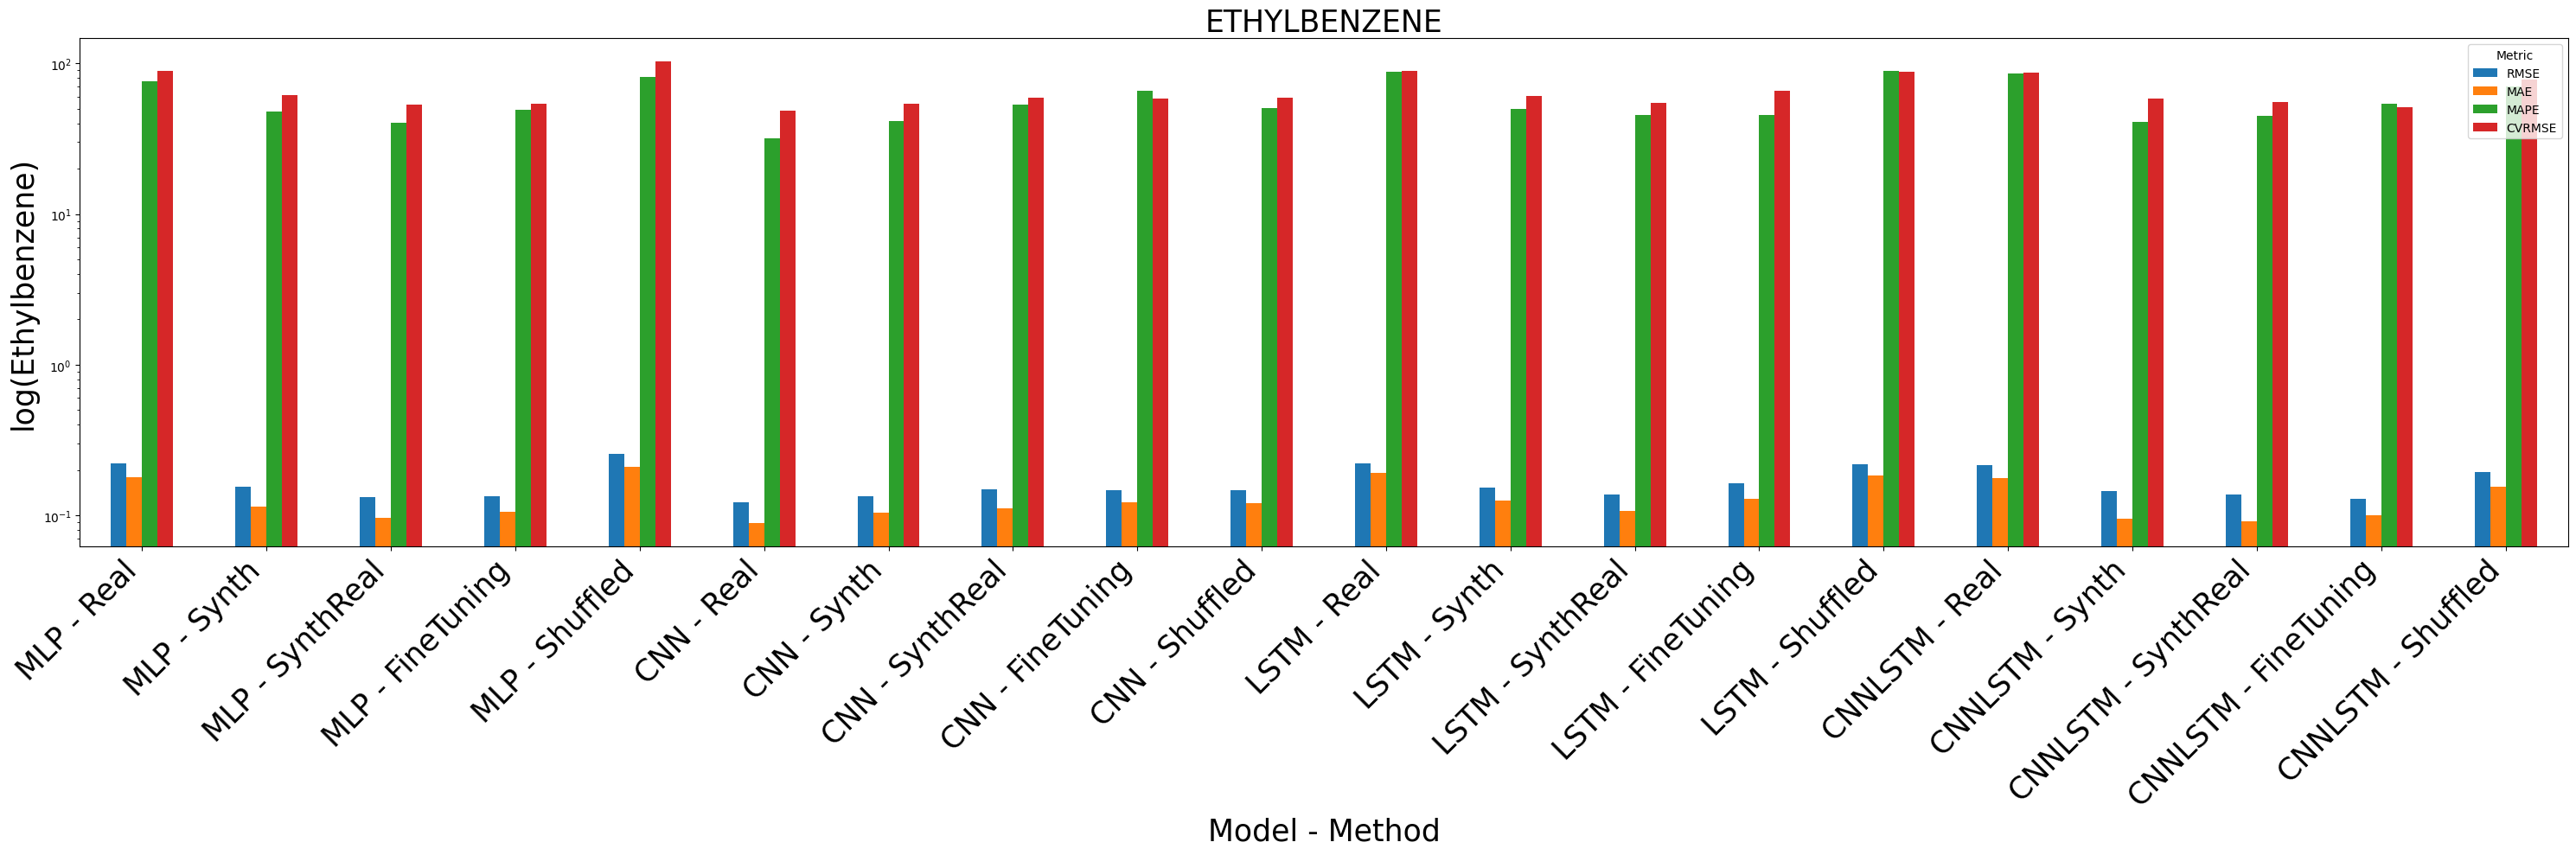

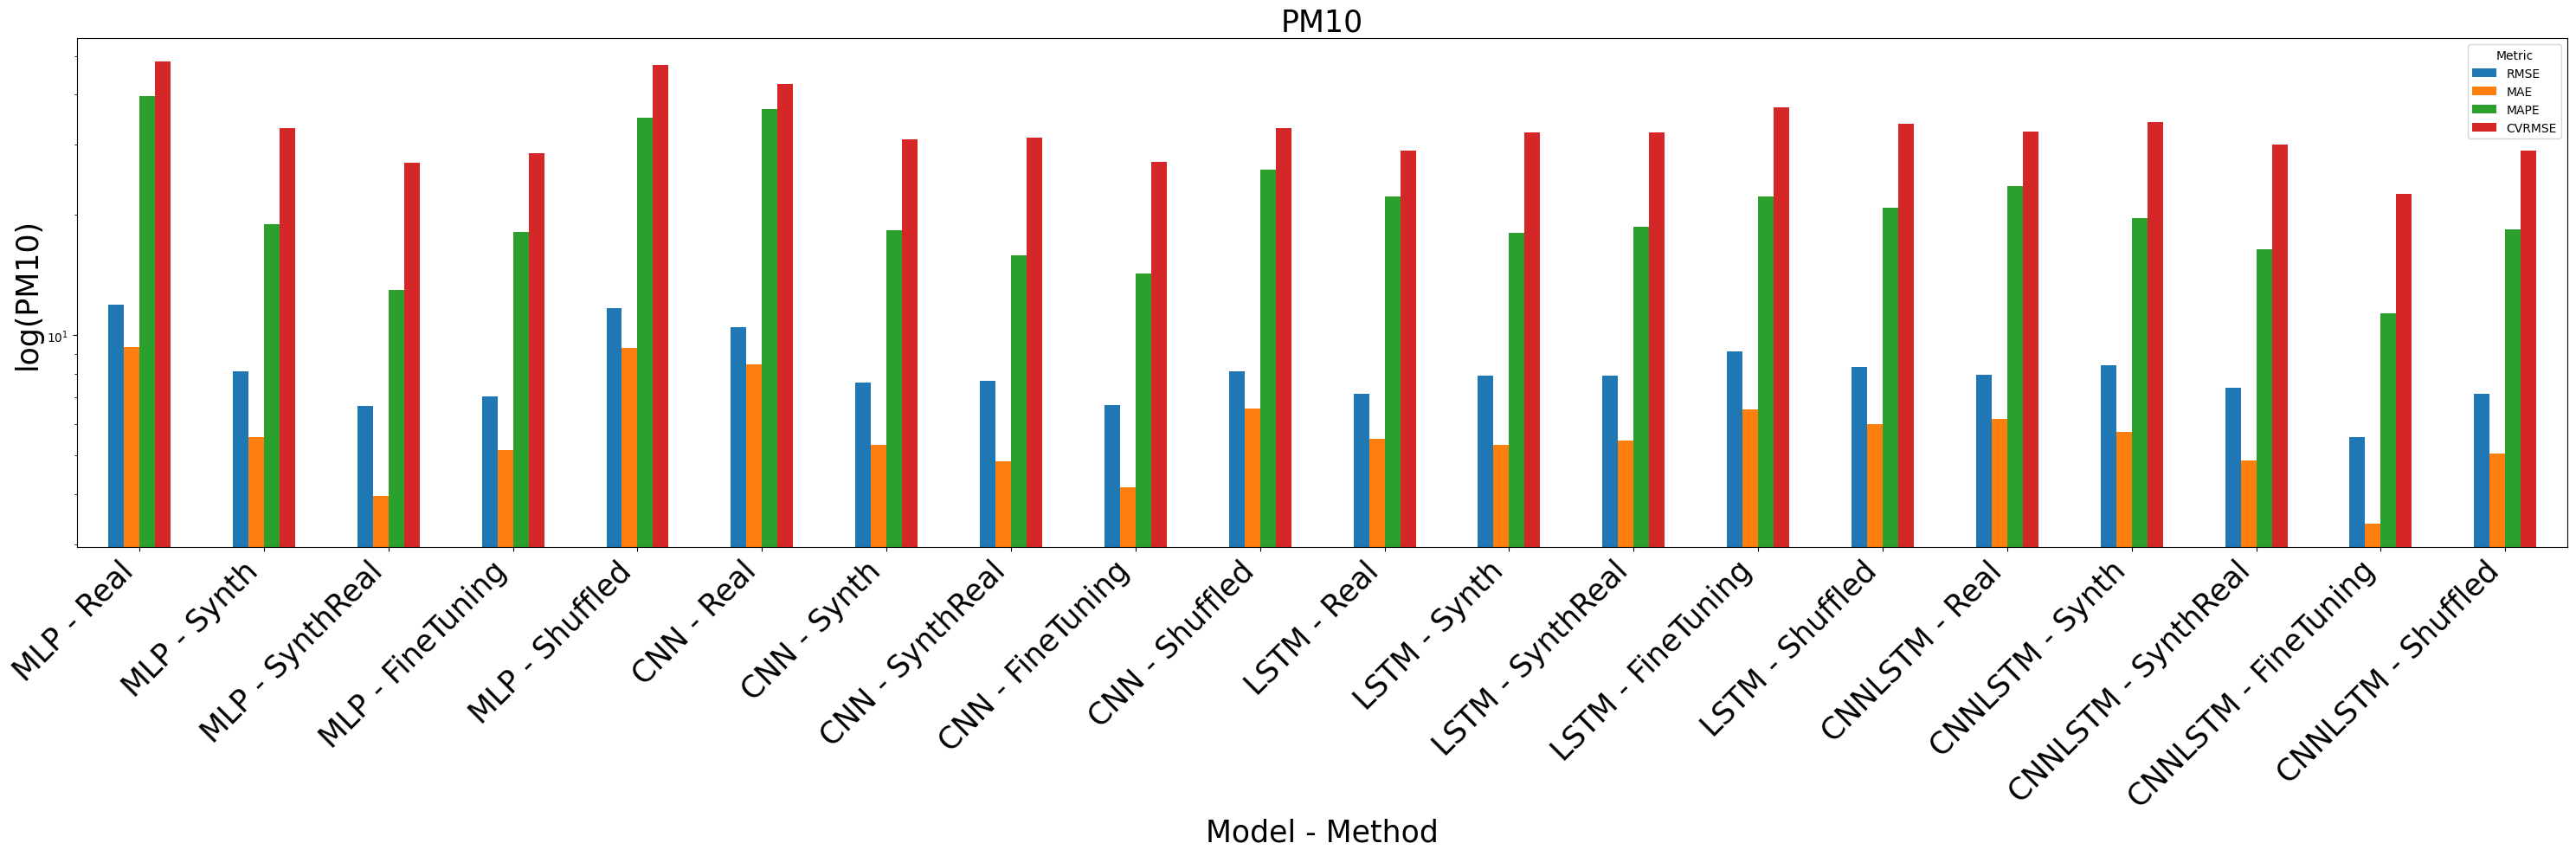

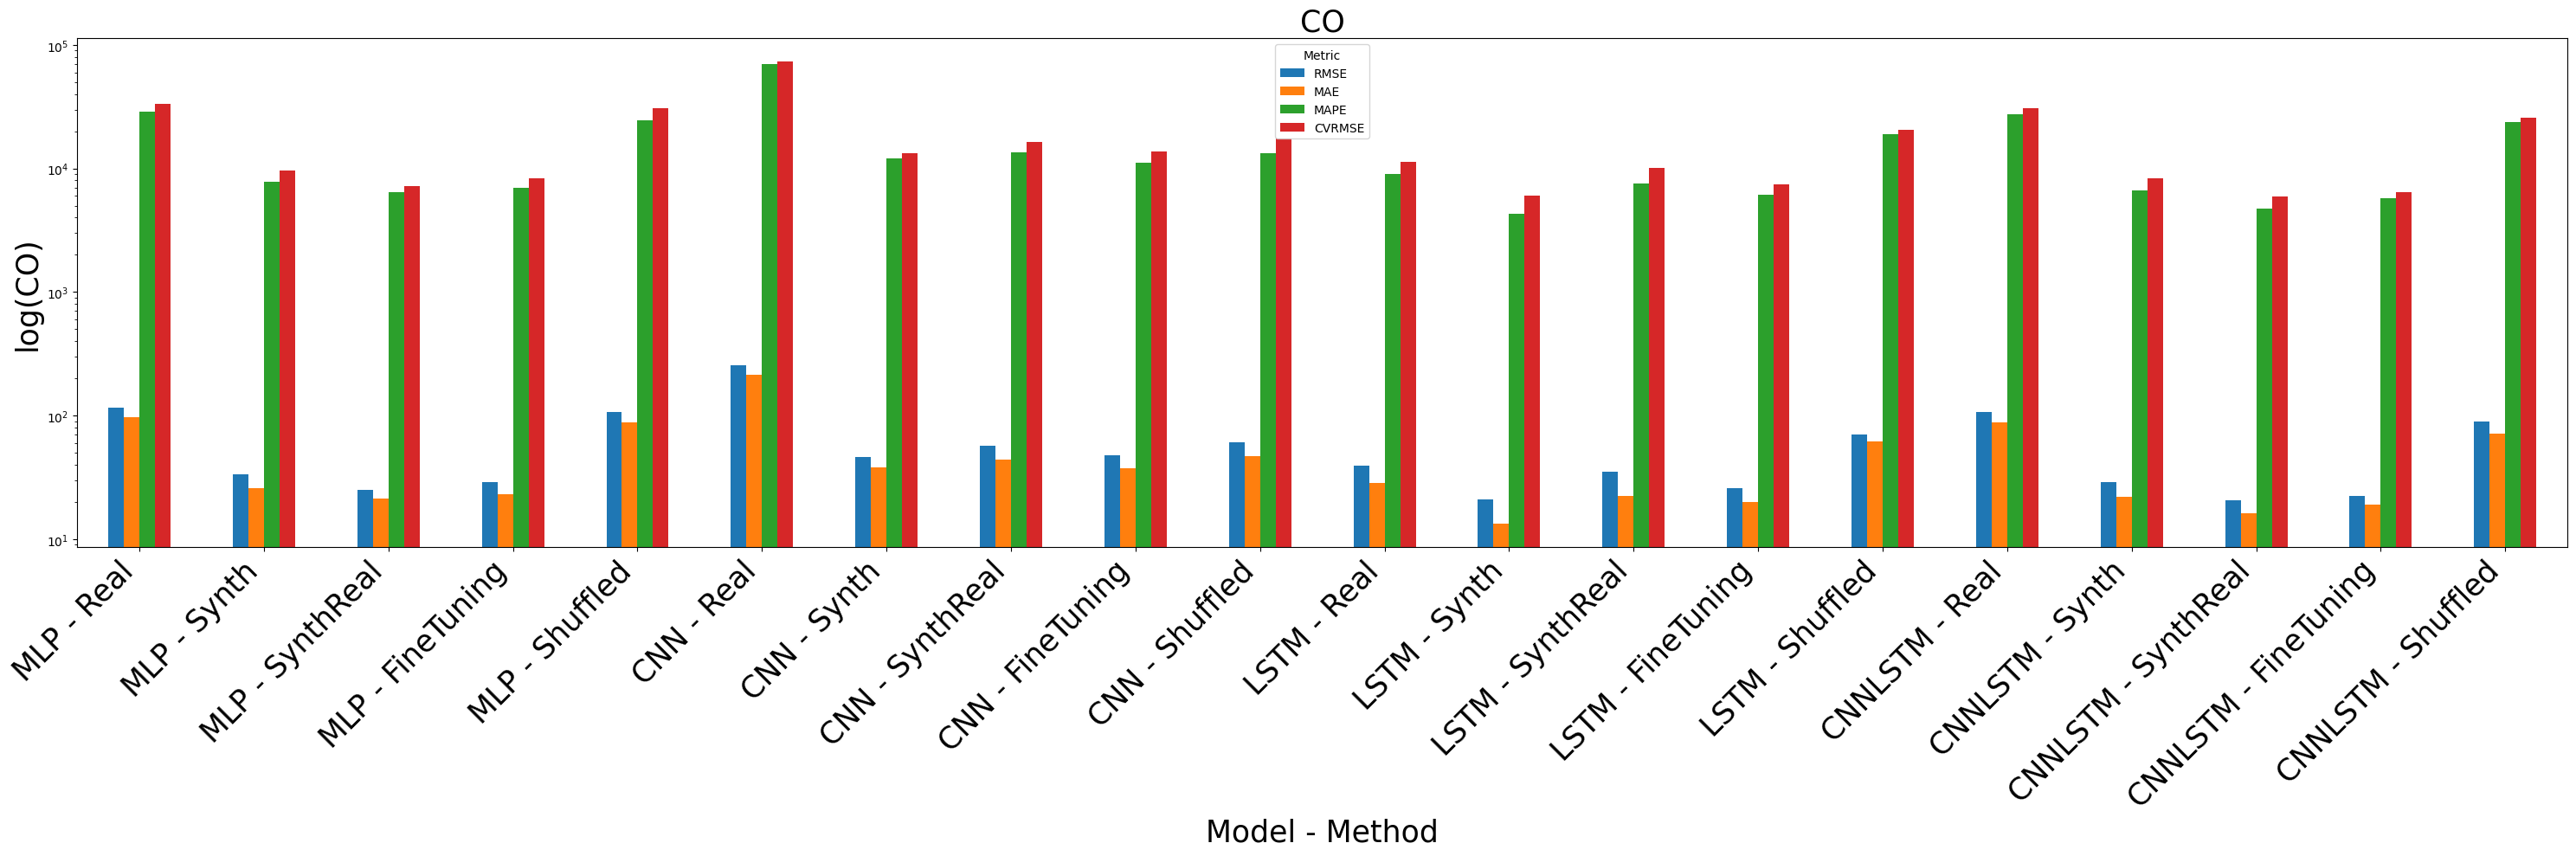

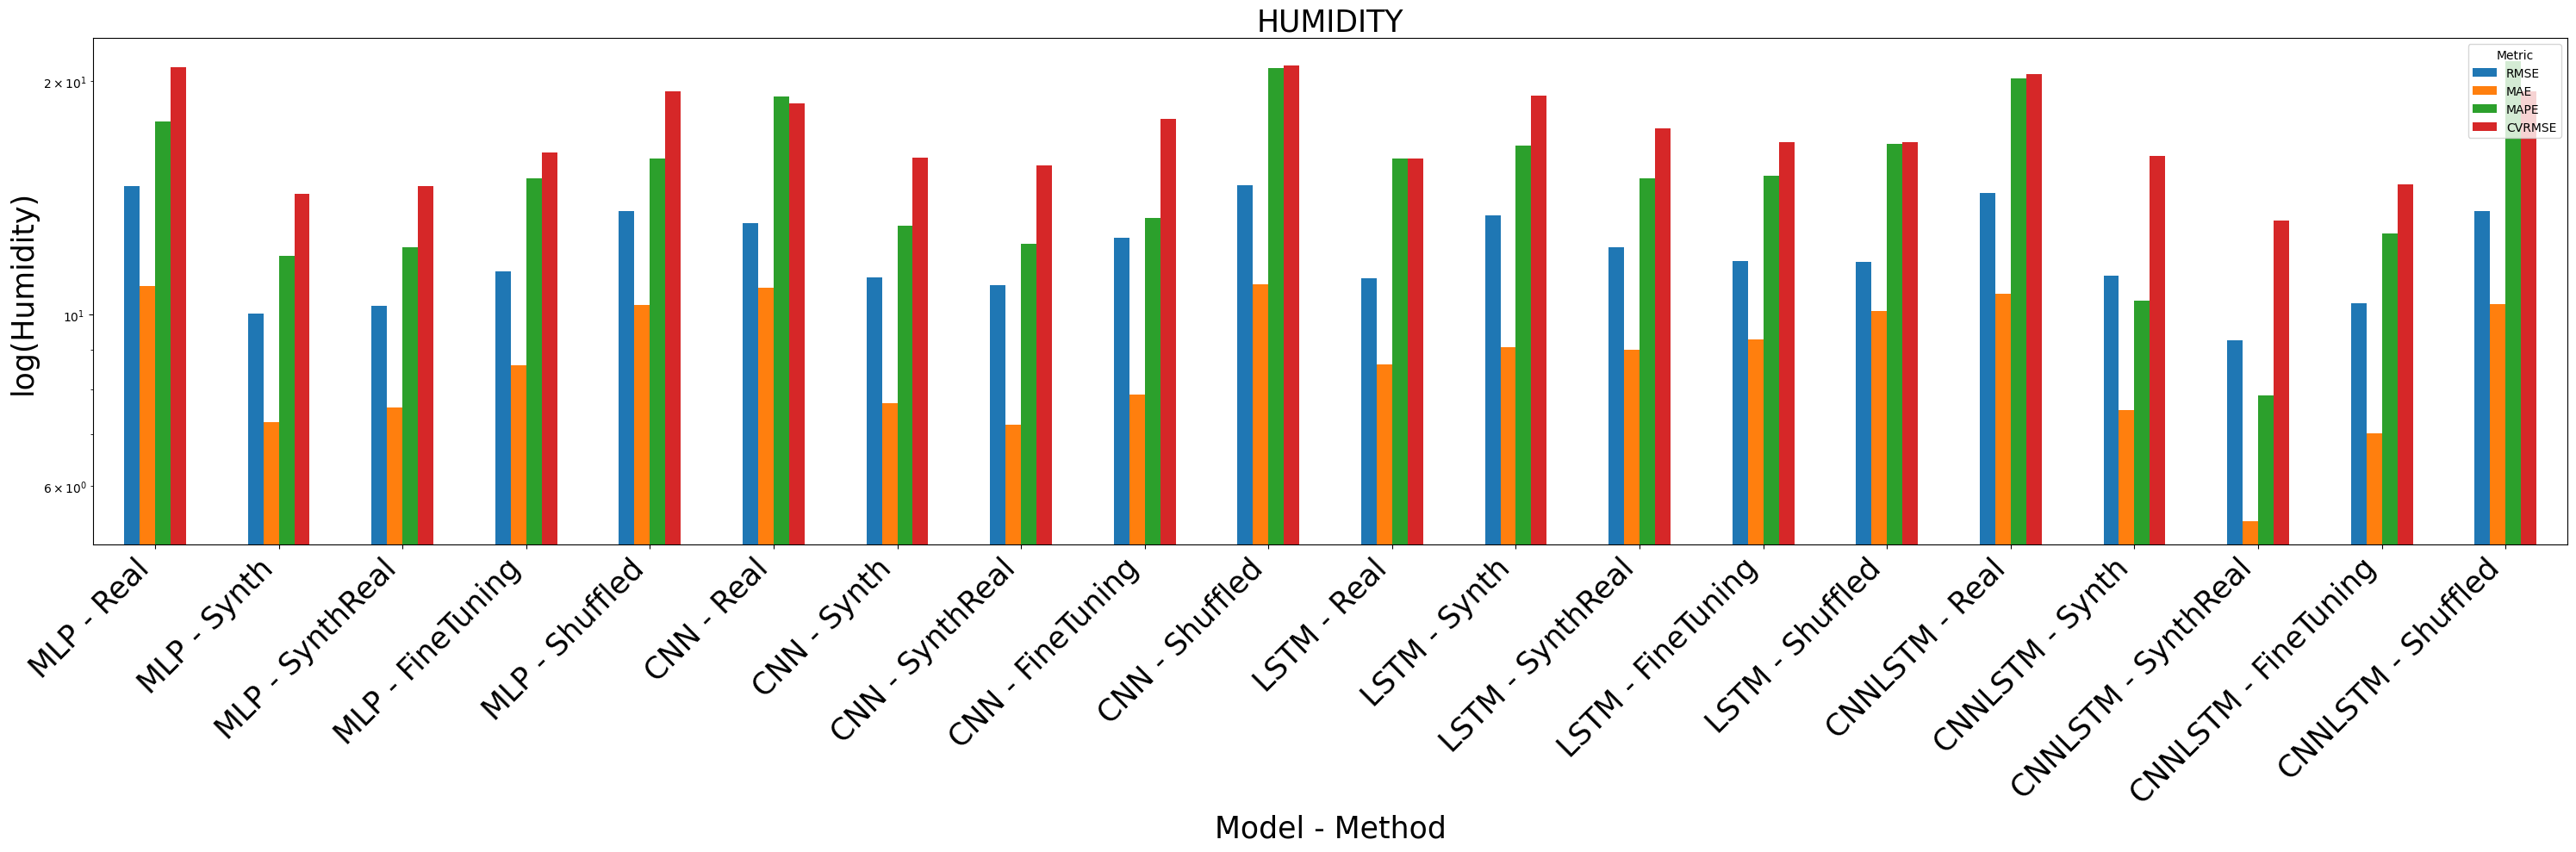

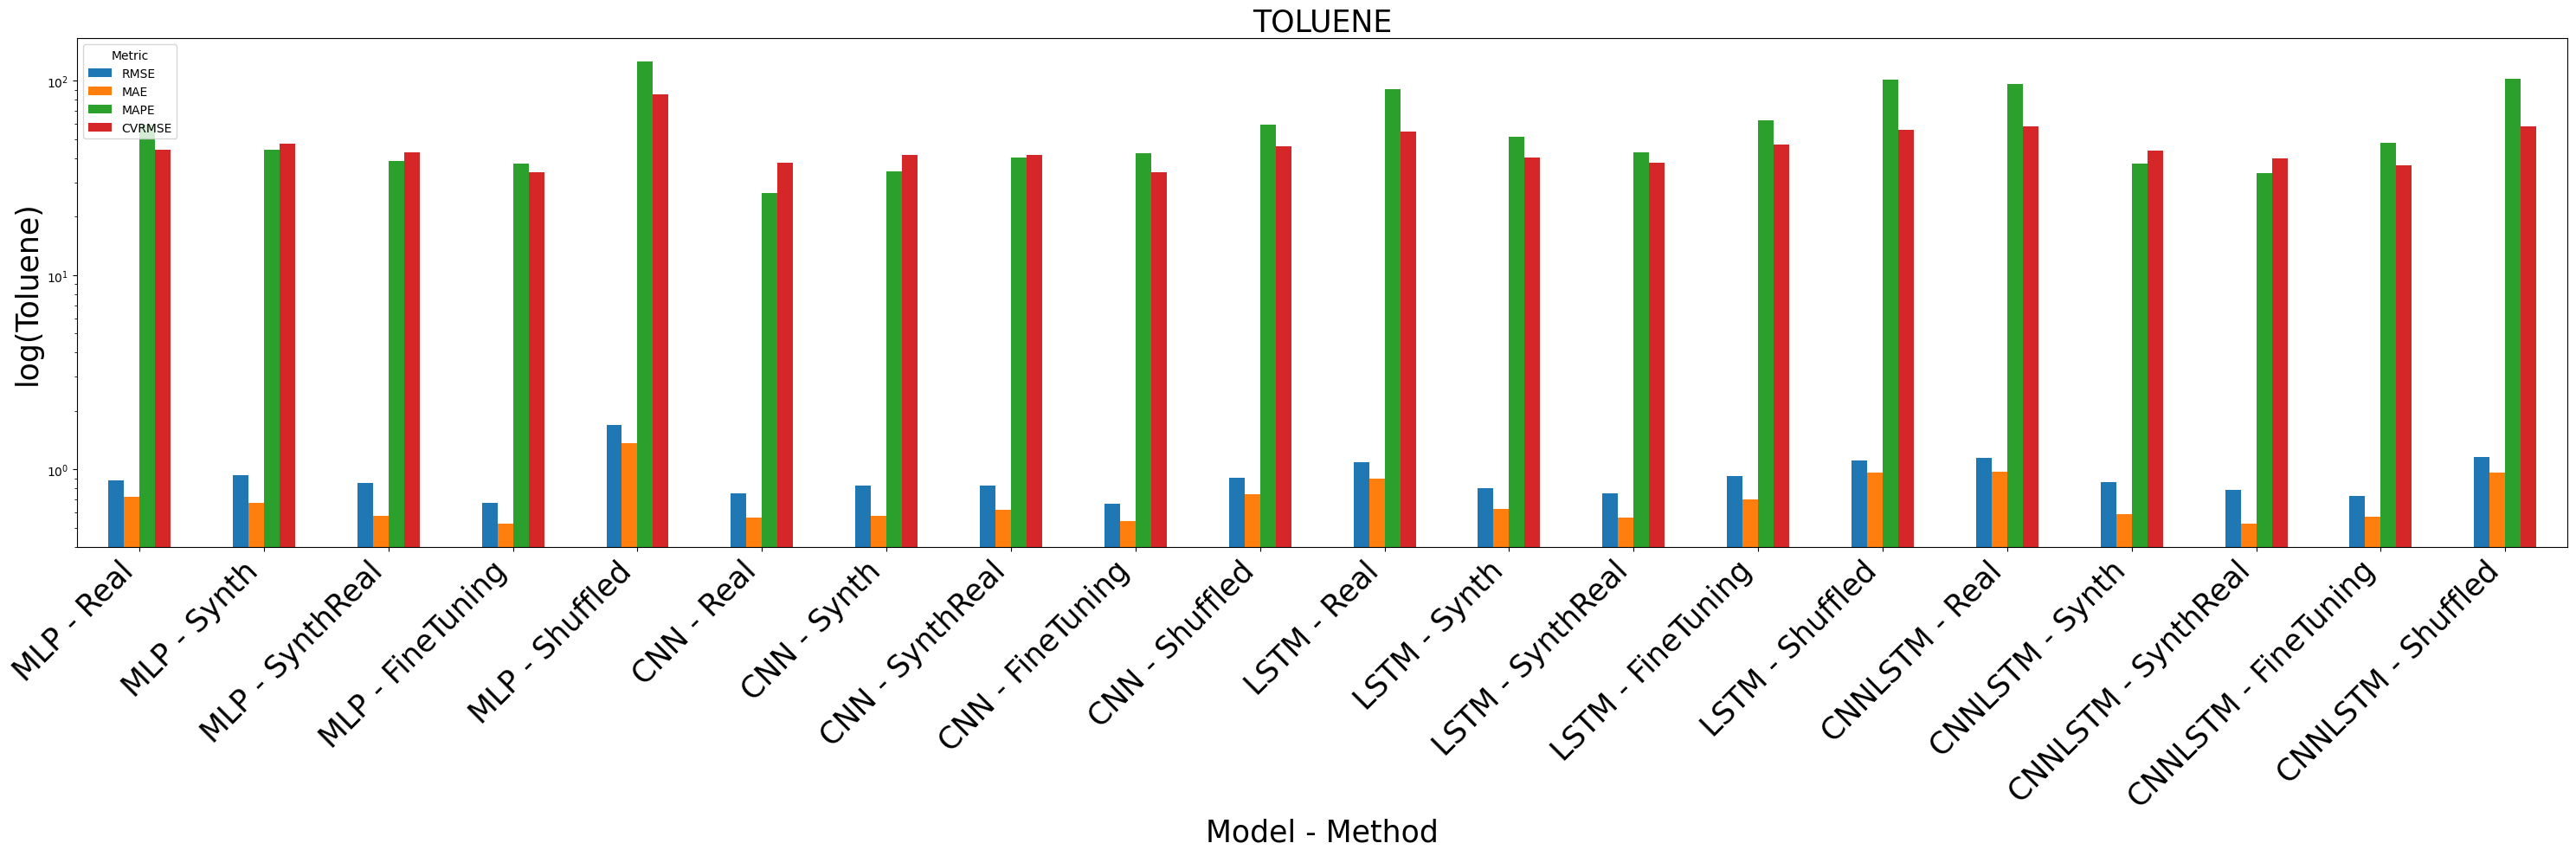

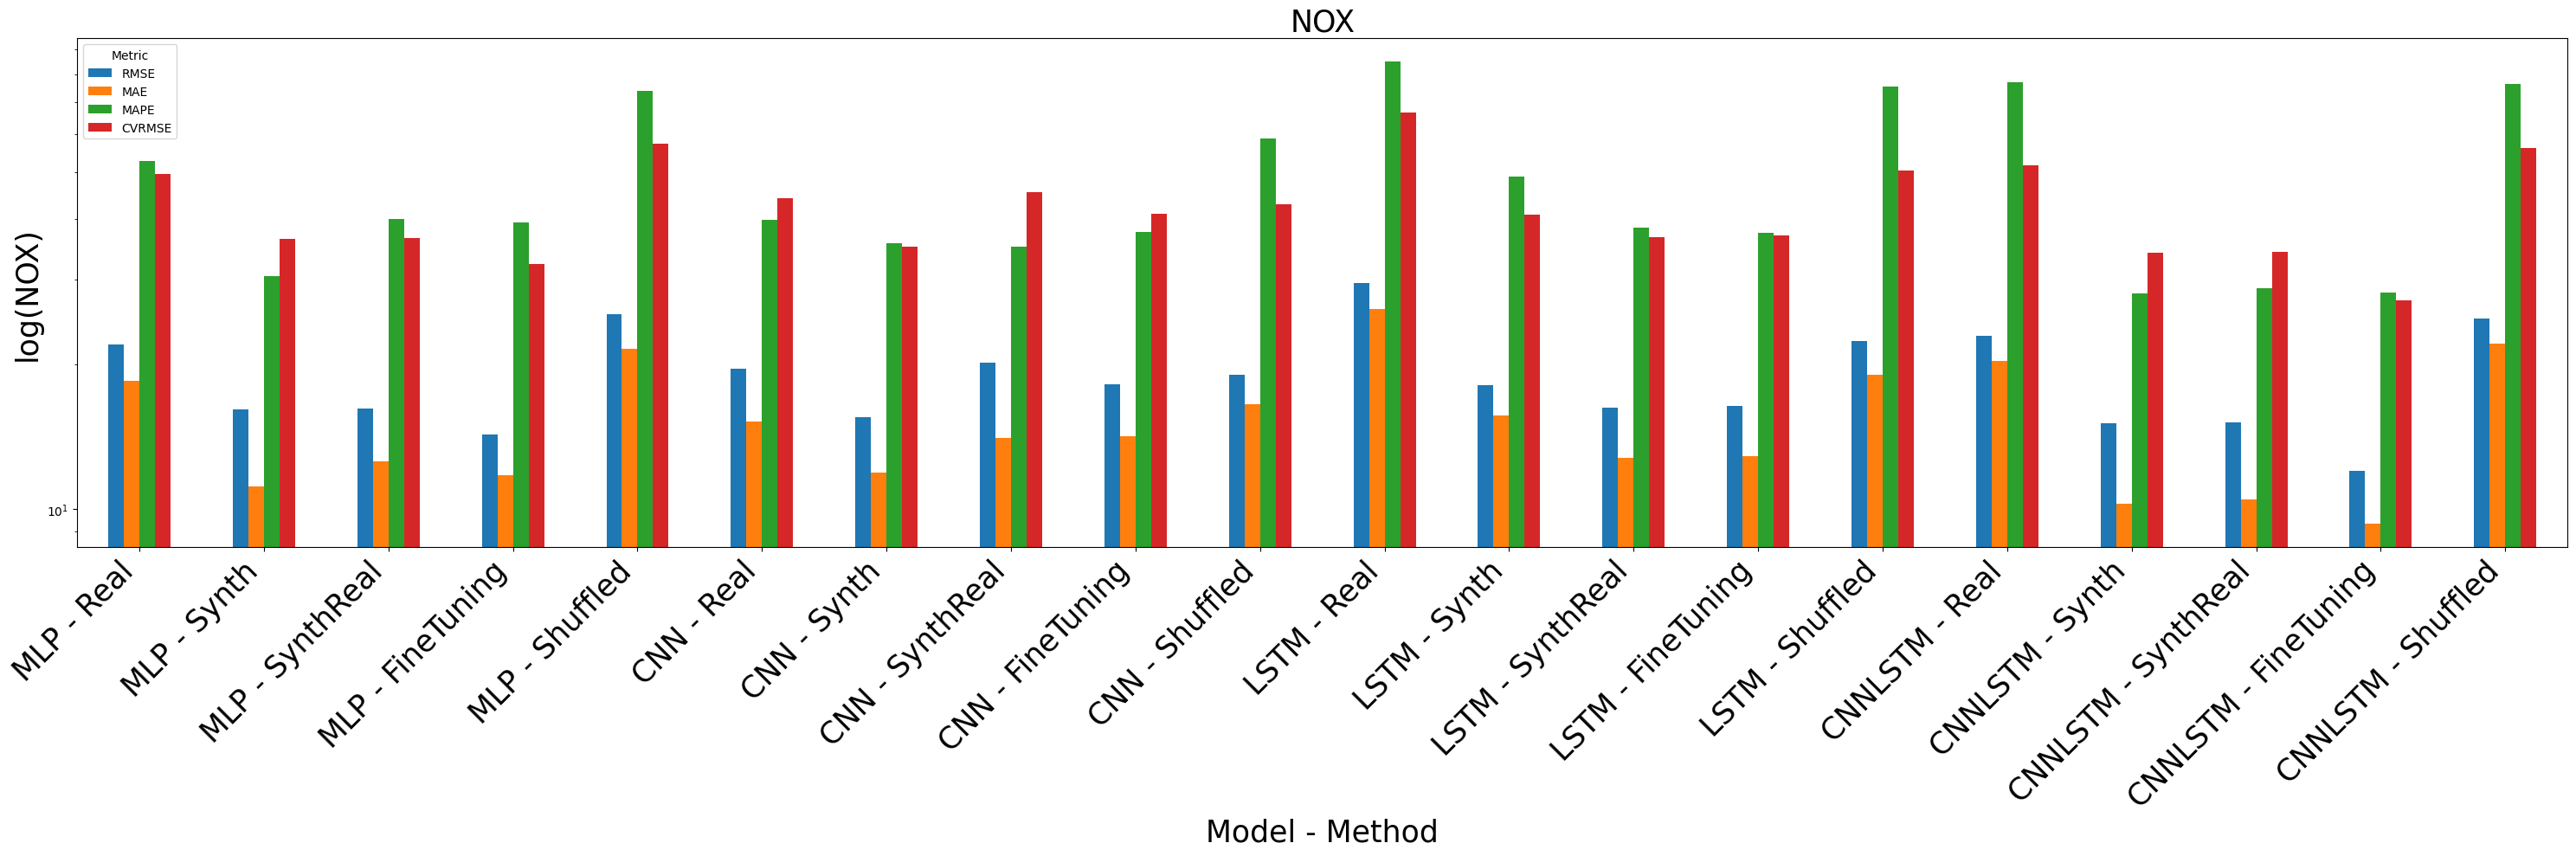

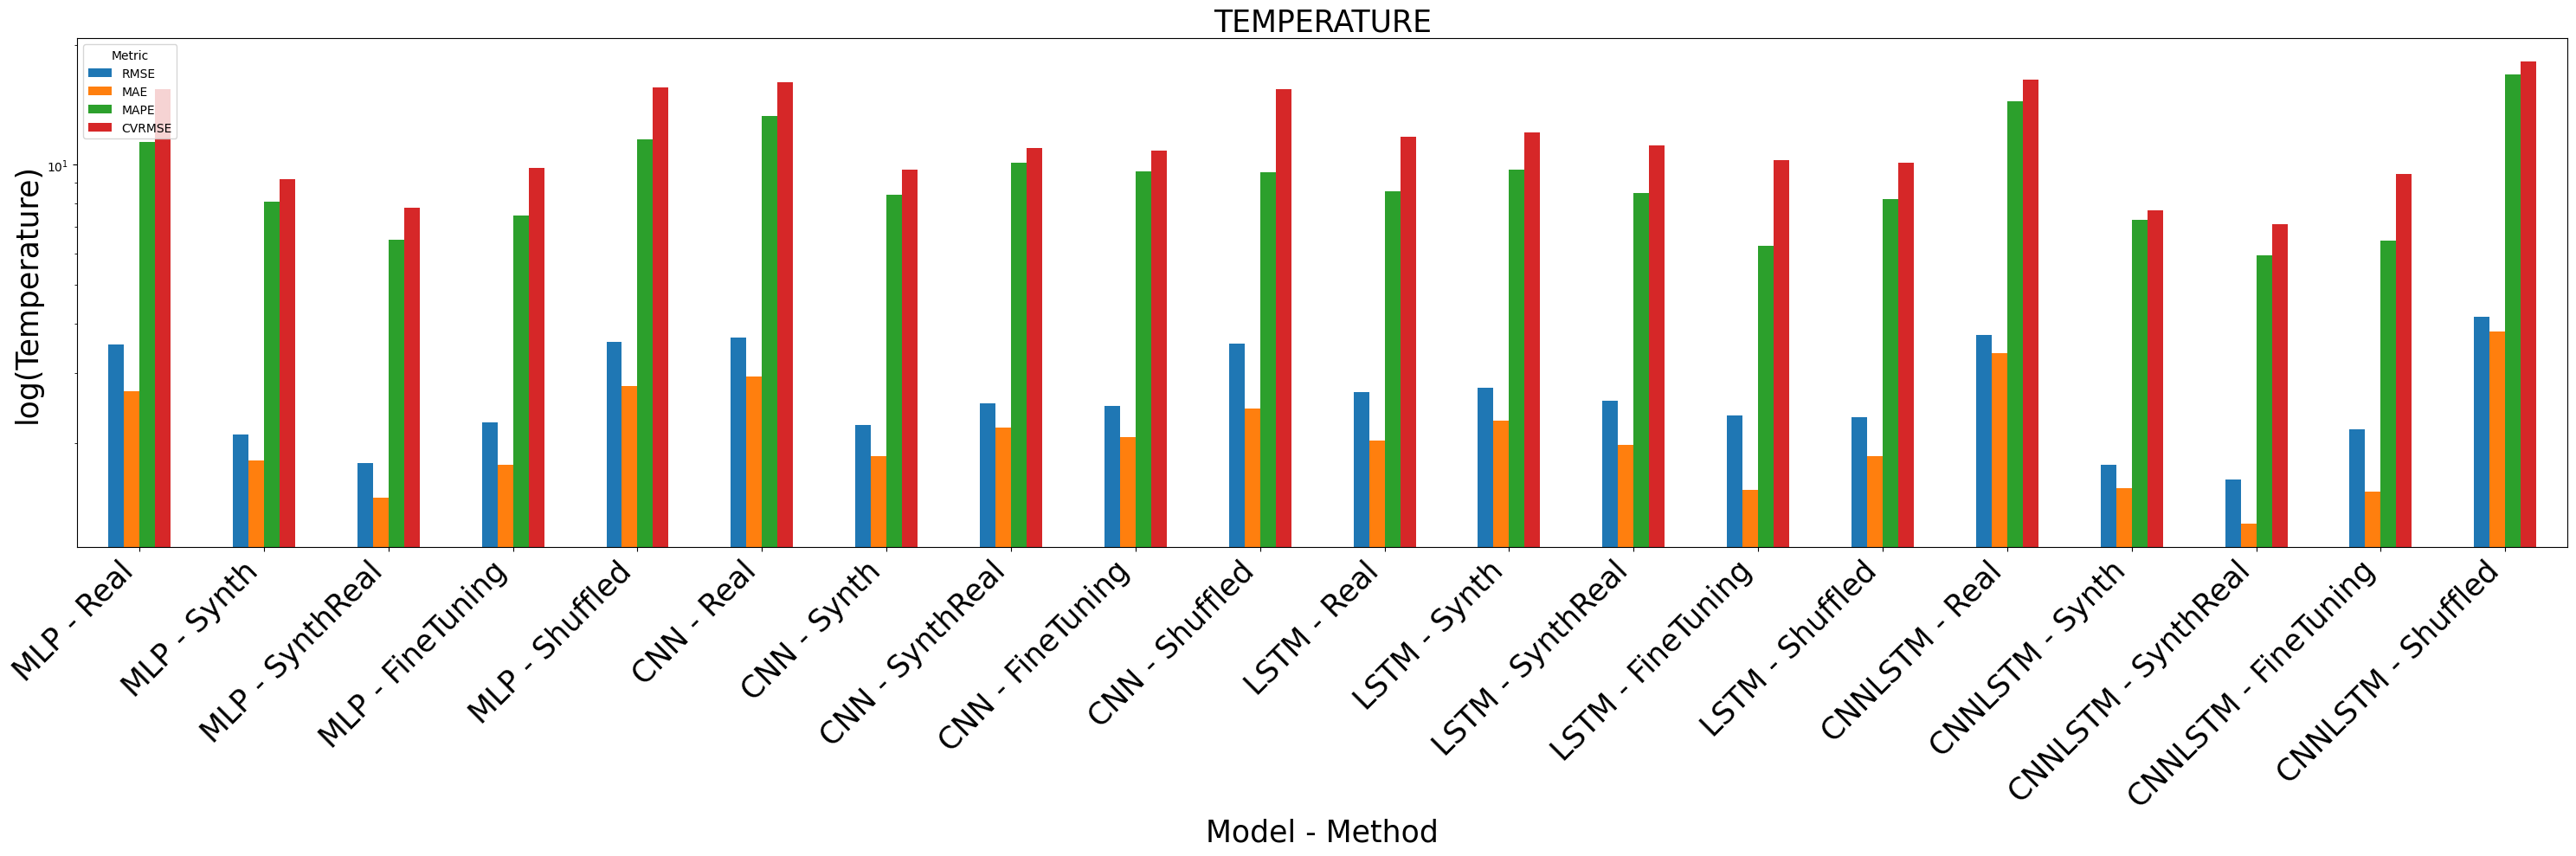

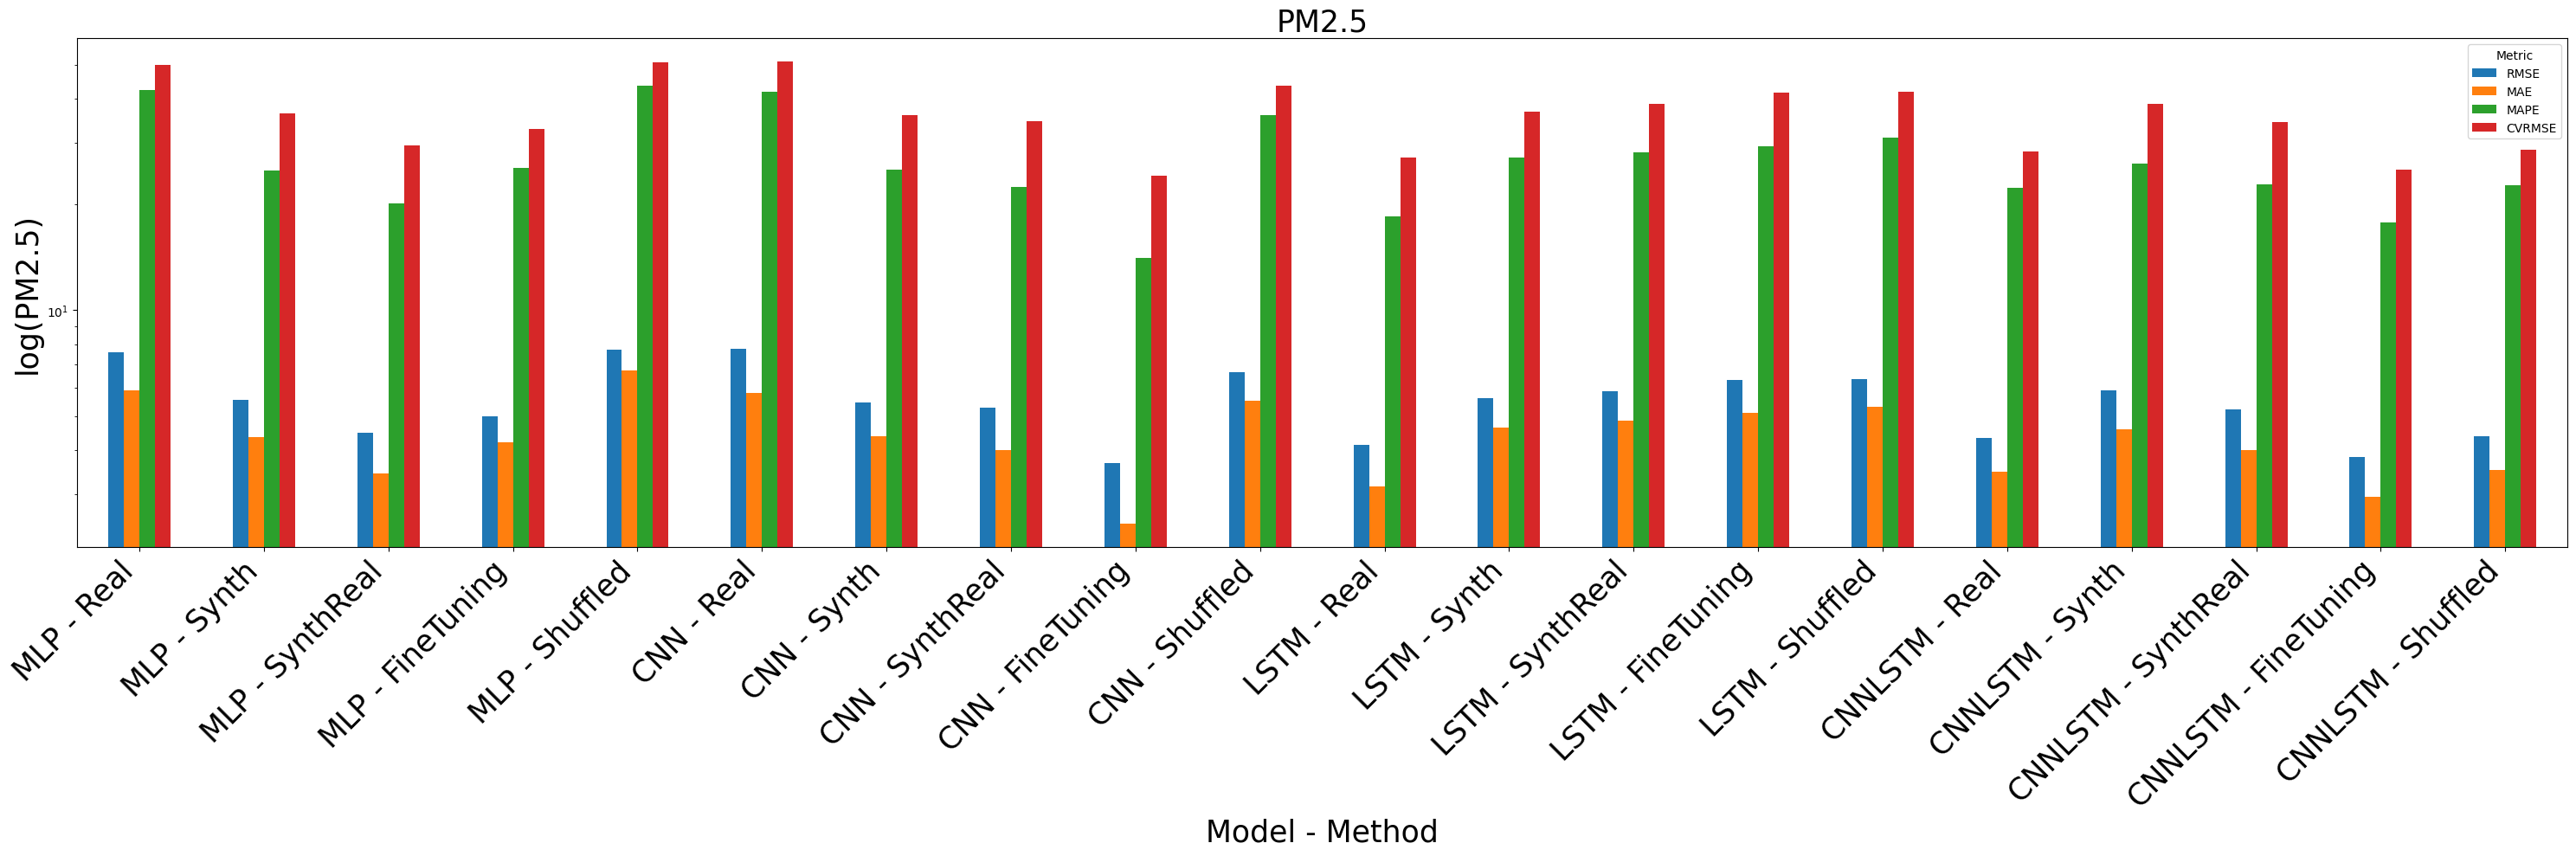

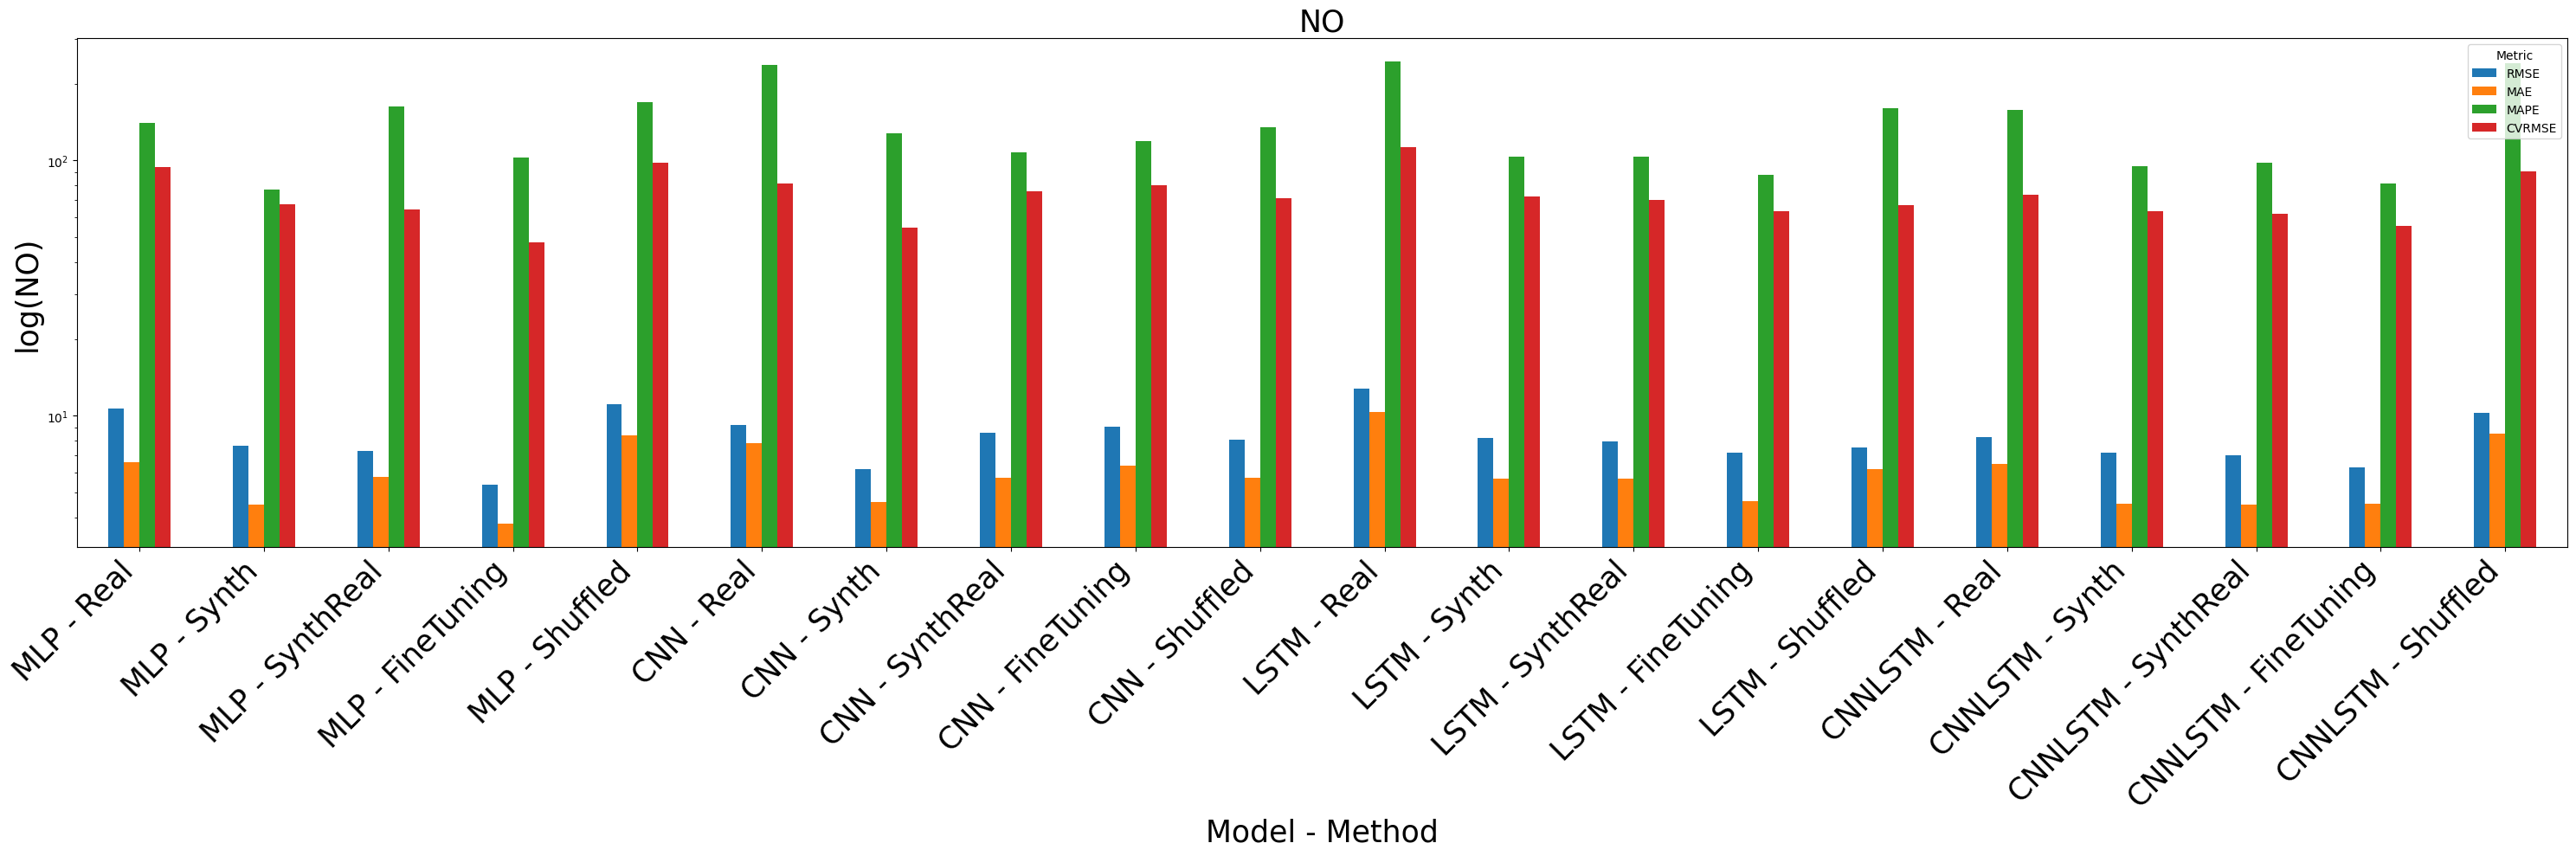

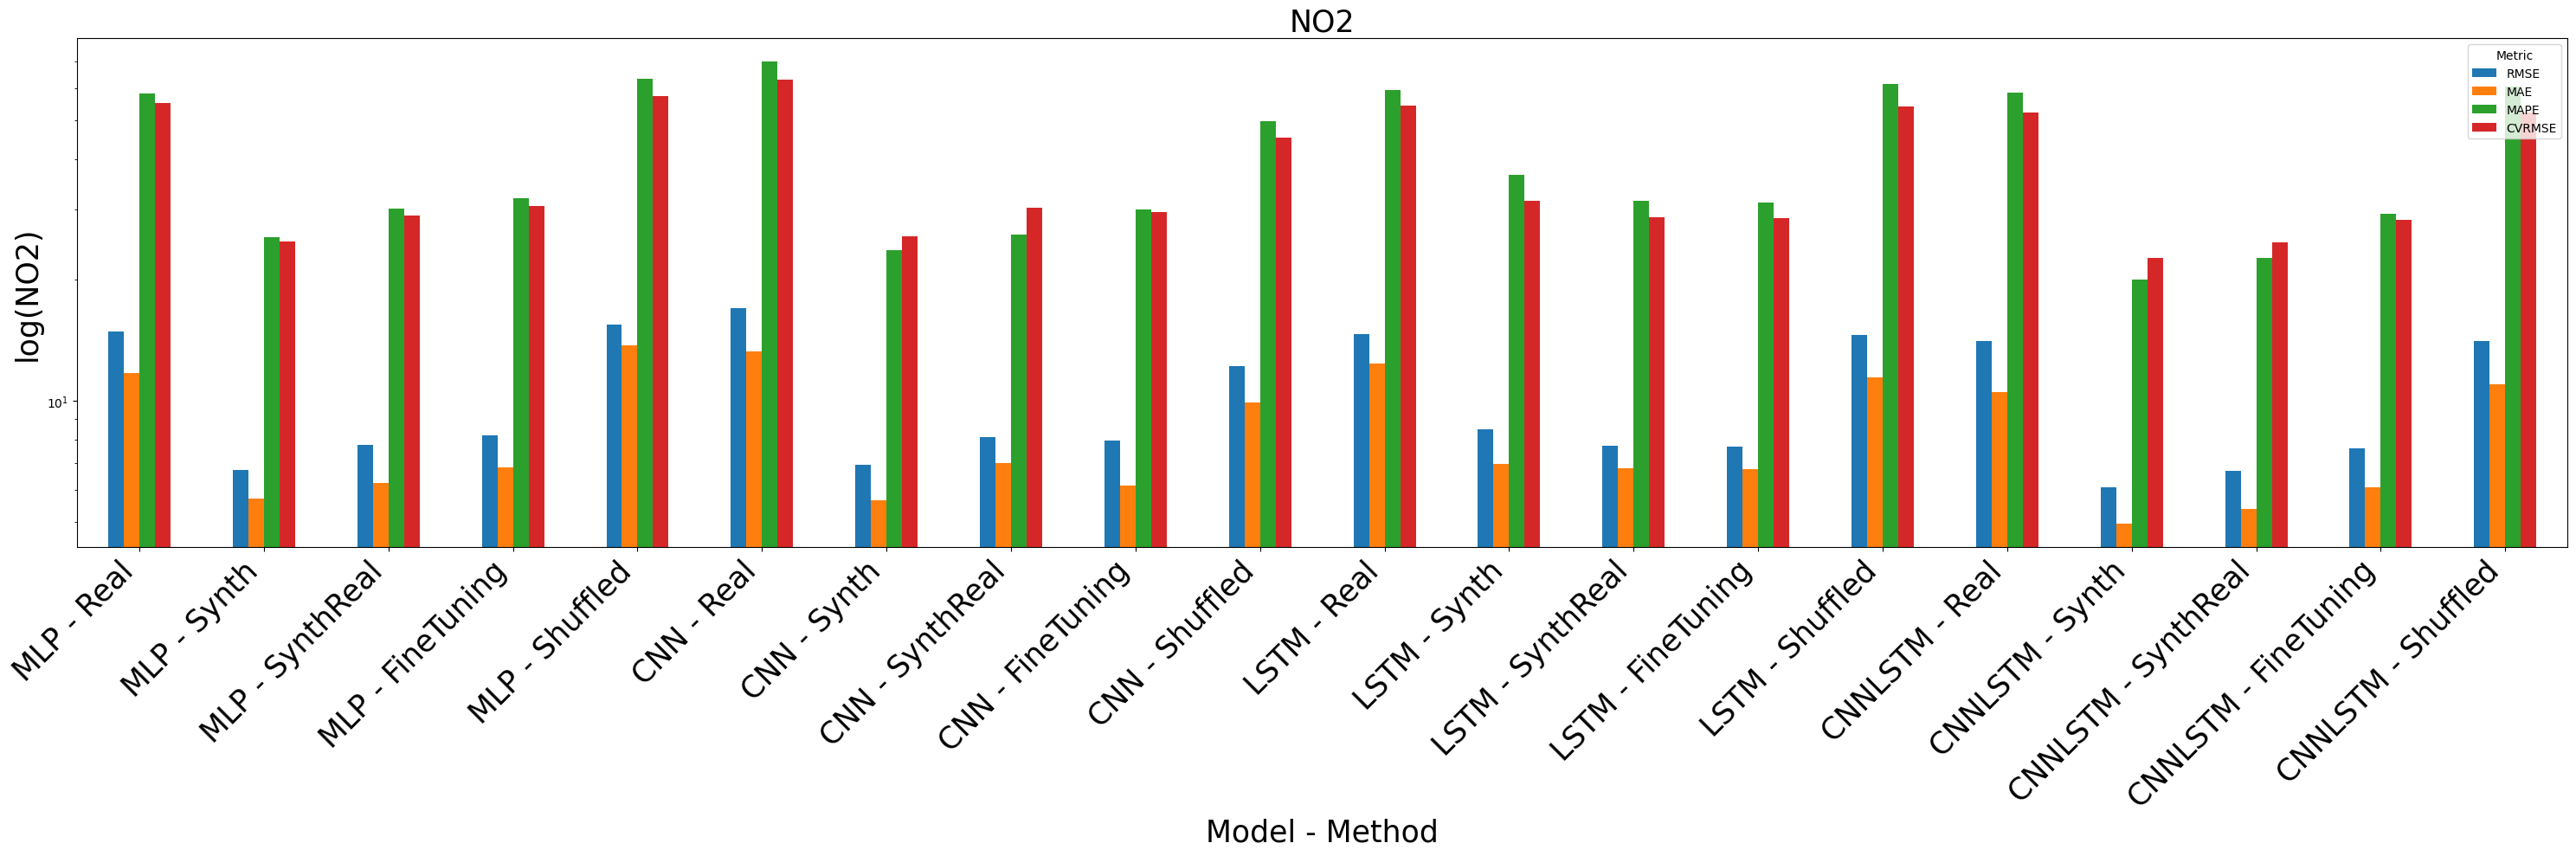

In [13]:
for col in list(set(col[0] for col in selected_combined_csv_cleaned.columns)):
    #selected_combined_csv_cleaned.loc[('BILBAO')][col.plot(kind='bar', title='BILBAO', ylabel=col, logy=True, figsize=(30,10))
    #selected_combined_csv_cleaned.loc[('BILBAO')][col.plot(kind='bar', title='BILBAO', ylabel=col, logy=True, figsize=(30,10))
    
    #selected_combined_csv_cleaned[col].plot(kind='bar', title=col.upper(), ylabel=f'log({col})', logy=True, figsize=(30,10))
    
    # Establecer los ejes
    ax = selected_combined_csv_cleaned[col].plot(kind='bar', logy=True, figsize=(30,10))
    ax.set_title(col.upper(), fontsize=25)
    ax.set_xlabel(f'{selected_combined_csv_cleaned.index.names[0]} - {selected_combined_csv_cleaned.index.names[1]}', fontsize=25)  # Tamaño de fuente para xlabel
    ax.set_ylabel(f'log({col})', fontsize=25)  # Tamaño de fuente para ylabel
    # Obtener las etiquetas del eje x y formatearlas según el índice multinivel
    labels = [f'{i[0]} - {i[1]}' for i in selected_combined_csv_cleaned[col].index]
    # Configurar las etiquetas del eje x
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=25)
    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()
    # Obtener el objeto Figure asociado al objeto Axes
    fig = plt.gcf()  # gcf() devuelve la figura actual
    # Guardar la figura
    fig.savefig(f'figures/{col}.png', dpi=300, bbox_inches='tight')
    # Mostrar la figura
    plt.show()

In [14]:
selected_combined_csv_cleaned_metrics = selected_combined_csv_cleaned.swaplevel(axis=1)
selected_combined_csv_cleaned_metrics = selected_combined_csv_cleaned_metrics.sort_values(by=['Metric', 'Variable'], axis=1)
selected_combined_csv_cleaned_metrics

Metric                  CVRMSE                                        \
Variable               Benzene            CO Ethylbenzene   Humidity   
Model   Method                                                         
MLP     Real        161.872707  33194.559454    88.643256  20.864882   
        Synth        94.046739   9684.318682    61.755292  14.299412   
        SynthReal    86.094692   7200.868969    52.941383  14.645450   
        FineTuning  107.653667   8351.650282    53.826565  16.192419   
        Shuffled    173.585504  30972.194079   103.015910  19.406967   
CNN     Real        155.418987  73473.118555    48.659330  18.725620   
        Synth        77.845143  13372.230642    53.644349  15.931647   
        SynthReal   104.616177  16477.931118    59.489147  15.549185   
        FineTuning  114.164342  13667.760944    58.574509  17.899132   
        Shuffled    120.827729  17424.984247    59.212456  20.960677   
LSTM    Real        166.983696  11309.073923    89.048359  15.891915   
        Synth        95.826963   6020.840499    60.837853  19.141232   
        SynthReal    96.211077  10055.973334    54.914427  17.402094   
        FineTuning   94.530812   7477.001893    65.611254  16.700037   
        Shuffled    140.271183  20391.308139    87.843309  16.693603   
CNNLSTM Real        142.489865  30897.034462    86.786162  20.443305   
        Synth        78.841271   8289.705599    58.453489  15.994308   
        SynthReal    85.680470   5925.261333    55.221396  13.206290   
        FineTuning   93.134064   6451.942981    51.327097  14.728282   
        Shuffled    151.929926  25754.068529    77.836174  19.398915   

Metric                                                                       \
Variable                    NO        NO2        NOX         O3 Orthoxylene   
Model   Method                                                                
MLP     Real         94.211259  55.123965  49.604020  52.541696   58.239610   
        Synth        67.302893  24.956529  36.434327  26.332411   48.703848   
        SynthReal    64.260198  28.855410  36.511706  30.196195   42.769529   
        FineTuning   47.678255  30.484859  32.286280  29.006978   41.362856   
        Shuffled     98.275280  57.416963  57.445512  50.586574   77.588222   
CNN     Real         81.460369  63.113054  44.198287  64.832123   40.047561   
        Synth        54.666940  25.706787  35.120010  29.539377   44.122380   
        SynthReal    75.881622  30.191476  45.445372  39.877584   49.221046   
        FineTuning   79.929196  29.524250  41.046813  40.134315   43.199187   
        Shuffled     71.096404  45.282539  42.914940  43.584274   47.190358   
LSTM    Real        112.627048  54.420622  66.500092  51.547813   66.689701   
        Synth        72.514652  31.525040  40.828487  33.537700   47.491863   
        SynthReal    69.945861  28.605388  36.765352  30.972554   45.134754   
        FineTuning   63.394552  28.487006  36.984373  30.198648   52.985485   
        Shuffled     66.621622  54.057605  50.531583  45.816100   64.952460   
CNNLSTM Real         73.183031  52.292713  51.740792  41.292254   62.512679   
        Synth        63.409977  22.635734  34.068572  24.980310   45.432015   
        SynthReal    61.720511  24.823354  34.190022  29.793257   45.664935   
        FineTuning   55.618797  28.173622  27.188936  28.080745   39.655031   
        Shuffled     90.775650  52.185680  56.292452  34.456084   59.129564   

Metric                         ...       RMSE                         \
Variable                 PM10  ...         O3 Orthoxylene       PM10   
Model   Method                 ...                                     
MLP     Real        48.421704  ...  20.578831    0.719987  11.923845   
        Synth       32.997277  ...  10.313528    0.602101   8.125579   
        SynthReal   27.034859  ...  11.826843    0.528738   6.657334   
        FineTuning  28.579187  ...  11.361066    0.511348   7.037625   
        Shuffled    4

In [15]:
for col in custom_order:
    print('-'*37, col, '-'*37)
    print(selected_combined_csv_cleaned_metrics[col].style.format(decimal='.', thousands=',', precision=2).to_latex())

------------------------------------- RMSE -------------------------------------
\begin{tabular}{llrrrrrrrrrrrrrrrrr}
 & Variable & Benzene & CO & Ethylbenzene & Humidity & NO & NO2 & NOX & O3 & Orthoxylene & PM10 & PM2.5 & Rainfall & SO2 & Temperature & Toluene & WindDirection & WindSpeed \\
Model & Method &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\multirow[c]{5}{*}{MLP} & Real & 0.19 & 114.80 & 0.22 & 14.62 & 10.66 & 14.86 & 21.95 & 20.58 & 0.72 & 11.92 & 7.60 & 0.56 & 2.58 & 3.54 & 0.87 & 80.93 & 1.32 \\
 & Synth & 0.11 & 33.49 & 0.15 & 10.02 & 7.62 & 6.73 & 16.12 & 10.31 & 0.60 & 8.13 & 5.54 & 0.16 & 1.30 & 2.11 & 0.93 & 63.07 & 0.73 \\
 & SynthReal & 0.10 & 24.90 & 0.13 & 10.26 & 7.27 & 7.78 & 16.16 & 11.83 & 0.53 & 6.66 & 4.48 & 0.17 & 3.02 & 1.79 & 0.85 & 60.52 & 0.55 \\
 & FineTuning & 0.13 & 28.88 & 0.13 & 11.35 & 5.40 & 8.22 & 14.29 & 11.36 & 0.51 & 7.04 & 4.99 & 0.18 & 1.52 & 2.26 & 0.67 & 71.76 & 0.74 \\
 & Shuffled & 0.20 & 107.11 & 0.26 & 13.60 & 11.12 & 15.47